# LOADING THE DATASET 

In [2]:
# !pip install lightgbm

In [1]:
import pandas as pd
import numpy as np
data1=pd.read_csv('data_synthetic.csv')
data1.head()

,Customer ID,Age,Gender,Marital Status,Occupation,Income Level,Education Level,Geographic Information,Location,Behavioral Data,...,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Risk Profile,Previous Claims History,Credit Score,Driving Record,Life Events,Segmentation Group
0,84966,23,Female,Married,Entrepreneur,70541,Associate Degree,Mizoram,37534,policy5,...,Email,In-Person Meeting,Afternoon,English,1,3,728,DUI,Job Change,Segment5
1,95568,26,Male,Widowed,Manager,54168,Doctorate,Goa,63304,policy5,...,Mail,In-Person Meeting,Morning,French,1,2,792,Clean,Retirement,Segment5
2,10544,29,Female,Single,Entrepreneur,73899,Associate Degree,Rajasthan,53174,policy5,...,Email,Mail,Evening,German,2,1,719,Accident,Childbirth,Segment3
3,77033,20,Male,Divorced,Entrepreneur,63381,Bachelor's Degree,Sikkim,22803,policy5,...,Text,In-Person Meeting,Anytime,French,3,0,639,DUI,Job Change,Segment3
4,88160,25,Female,Separated,Manager,38794,Bachelor's Degree,West Bengal,92858,policy1,...,Email,Text,Weekends,English,0,3,720,Major Violations,Childbirth,Segment2


# Checking for Null Values


In [5]:
data1.dtypes

Customer ID                            int64
Age                                    int64
Gender                                object
Marital Status                        object
Occupation                            object
Income Level                           int64
Education Level                       object
Geographic Information                object
Location                               int64
Behavioral Data                       object
Purchase History                      object
Policy Start Date                     object
Policy Renewal Date                   object
Claim History                          int64
Interactions with Customer Service    object
Insurance Products Owned              object
Coverage Amount                        int64
Premium Amount                         int64
Deductible                             int64
Policy Type                           object
Customer Preferences                  object
Preferred Communication Channel       object
Preferred 

In [7]:
data1.isnull().sum()

Customer ID                           0
Age                                   0
Gender                                0
Marital Status                        0
Occupation                            0
Income Level                          0
Education Level                       0
Geographic Information                0
Location                              0
Behavioral Data                       0
Purchase History                      0
Policy Start Date                     0
Policy Renewal Date                   0
Claim History                         0
Interactions with Customer Service    0
Insurance Products Owned              0
Coverage Amount                       0
Premium Amount                        0
Deductible                            0
Policy Type                           0
Customer Preferences                  0
Preferred Communication Channel       0
Preferred Contact Time                0
Preferred Language                    0
Risk Profile                          0


# Standardizing the Date Columns

In [10]:
# date_cols=['Policy Start Date', 'Policy Renewal Date', 'Claim History']
# for col in date_cols:
#     data[col]=pd.to_datetime(data[col],errors='coerce',dayfirst='True')
# data['Policy Start Date']

In [12]:
# Print unique values in Policy Start Date to see the formats
print("Unique values in Policy Start Date:")
print(data1['Policy Start Date'].unique())

# Check for any non-date strings or empty values
print("\nRows with potential issues in Policy Start Date:")
print(data1[data1['Policy Start Date'].str.match(r'[^0-9/-]', na=False) | (data1['Policy Start Date'].str.len() == 0)])

Unique values in Policy Start Date:
['08-01-2023' '09-06-2020' '09-03-2023' ... '04-01-2023' '01-06-2019'
 '1/26/2021']

Rows with potential issues in Policy Start Date:
Empty DataFrame
Columns: [Customer ID, Age, Gender, Marital Status, Occupation, Income Level, Education Level, Geographic Information, Location, Behavioral Data, Purchase History, Policy Start Date, Policy Renewal Date, Claim History, Interactions with Customer Service, Insurance Products Owned, Coverage Amount, Premium Amount, Deductible, Policy Type, Customer Preferences, Preferred Communication Channel, Preferred Contact Time, Preferred Language, Risk Profile, Previous Claims History, Credit Score, Driving Record, Life Events, Segmentation Group]
Index: []

[0 rows x 30 columns]


In [14]:
# Function to standardize date formats
def standardize_date(date_str):
    if pd.isna(date_str):  # Handle NaN
        return np.nan
    date_str = str(date_str).strip()  # Convert to string and remove whitespace
    # Try different formats
    for fmt in ['%d-%m-%Y', '%m/%d/%Y', '%d/%m/%Y', '%Y-%m-%d']:
        try:
            return pd.to_datetime(date_str, format=fmt).strftime('%Y-%m-%d')
        except ValueError:
            continue
    return np.nan  # If no format works, mark as NaN

# Apply to all date columns
date_cols = ['Policy Start Date', 'Policy Renewal Date', 'Claim History']

for col in date_cols:
    data1[col] = data1[col].apply(standardize_date)

# Convert to datetime after standardization
for col in date_cols:
    data1[col] = pd.to_datetime(data1[col], errors='coerce')

# Check for any remaining NaT values
print("\nNaT counts after standardization and conversion:")
print(data1[date_cols].isna().sum())

# Display the first few rows of the date columns to verify
print("\nFirst few rows of date columns after conversion:")
print(data1[date_cols].head())

# If there are still NaT values, print the problematic rows
if data1[date_cols].isna().any().any():
    print("\nRows with NaT values:")
    print(data1[data1[date_cols].isna().any(axis=1)])


NaT counts after standardization and conversion:
Policy Start Date          0
Policy Renewal Date        0
Claim History          53503
dtype: int64

First few rows of date columns after conversion:
  Policy Start Date Policy Renewal Date Claim History
0        2023-01-08          2023-03-12           NaT
1        2020-06-09          2023-09-06           NaT
2        2023-03-09          2024-03-11           NaT
3        2018-04-14          2023-04-05           NaT
4        2022-02-12          2023-10-09           NaT

Rows with NaT values:
       Customer ID  Age  Gender Marital Status    Occupation  Income Level  \
0            84966   23  Female        Married  Entrepreneur         70541   
1            95568   26    Male        Widowed       Manager         54168   
2            10544   29  Female         Single  Entrepreneur         73899   
3            77033   20    Male       Divorced  Entrepreneur         63381   
4            88160   25  Female      Separated       Manager   

# Dropping Unecessary Columns

In [17]:
# Drop 'Claim History' column
data1 = data1.drop(columns=['Claim History'])

# Copying the Dataset to Another Variable

In [20]:
data=data1.copy()

# CONVERTING CATEGORICAL COLUMNS TO NUMERICAL COLUMNS

In [23]:
# Corrected mappings (keep only ordinal variables)
ordinal_mappings = {
    'Gender': {'Female': 0, 'Male': 1},  # Binary, fine as is
    'Education Level': {'High School Diploma': 0, "Bachelor's Degree": 1, "Master's Degree": 2, 'Doctorate': 3, 'Associate Degree': 4},  # Check order
    'Driving Record': {'Clean': 0, 'Minor Violations': 1, 'Major Violations': 2, 'Accident': 3, 'DUI': 4}  # Makes sense
}

# Apply ordinal mappings
for col, mapping in ordinal_mappings.items():
    data[col] = data[col].map(mapping)
    print(f"{col} NaN After Mapping:",data[col].isna().sum())

Gender NaN After Mapping: 0
Education Level NaN After Mapping: 0
Driving Record NaN After Mapping: 0


In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label_cols = ['Occupation', 'Behavioral Data', 'Interactions with Customer Service', 
              'Insurance Products Owned', 'Customer Preferences', 'Life Events', 'Segmentation Group', 
              'Marital Status', 'Policy Type']  # Add nominal columns here

for col in label_cols:
    data[col] = le.fit_transform(data[col].astype(str))

In [26]:
# One-hot encoding for truly nominal columns
nominal_cols = ['Preferred Communication Channel', 'Preferred Contact Time', 'Preferred Language', 'Geographic Information']
data= pd.get_dummies(data, columns=nominal_cols, drop_first=True)

In [29]:
data.head()

,Customer ID,Age,Gender,Marital Status,Occupation,Income Level,Education Level,Location,Behavioral Data,Purchase History,...,Geographic Information_Puducherry,Geographic Information_Punjab,Geographic Information_Rajasthan,Geographic Information_Sikkim,Geographic Information_Tamil Nadu,Geographic Information_Telangana,Geographic Information_Tripura,Geographic Information_Uttar Pradesh,Geographic Information_Uttarakhand,Geographic Information_West Bengal
0,84966,23,0,1,3,70541,4,37534,4,04-10-2018,...,False,False,False,False,False,False,False,False,False,False
1,95568,26,1,4,5,54168,3,63304,4,11-06-2018,...,False,False,False,False,False,False,False,False,False,False
2,10544,29,0,3,3,73899,4,53174,4,06-05-2021,...,False,False,True,False,False,False,False,False,False,False
3,77033,20,1,0,3,63381,1,22803,4,09-02-2018,...,False,False,False,True,False,False,False,False,False,False
4,88160,25,0,2,5,38794,1,92858,0,09-10-2018,...,False,False,False,False,False,False,False,False,False,True


In [39]:
data.dtypes

Customer ID                             int64
Age                                     int64
Gender                                  int64
Marital Status                          int32
Occupation                              int32
                                        ...  
Geographic Information_Telangana        int32
Geographic Information_Tripura          int32
Geographic Information_Uttar Pradesh    int32
Geographic Information_Uttarakhand      int32
Geographic Information_West Bengal      int32
Length: 71, dtype: object

# Converting Boolean Values To Binary

In [34]:
import pandas as pd

# Identify boolean columns
bool_cols = data.select_dtypes(include=['bool']).columns

print("Boolean columns to convert:")
print(bool_cols)

# Convert boolean columns to 0 and 1
for col in bool_cols:
    data[col] = data[col].astype(int)

# Verify the data types after conversion
print("\nData types after conversion:")
print(data.dtypes)

Boolean columns to convert:
Index(['Preferred Communication Channel_In-Person Meeting',
       'Preferred Communication Channel_Mail',
       'Preferred Communication Channel_Phone',
       'Preferred Communication Channel_Text',
       'Preferred Contact Time_Anytime', 'Preferred Contact Time_Evening',
       'Preferred Contact Time_Morning', 'Preferred Contact Time_Weekends',
       'Preferred Language_French', 'Preferred Language_German',
       'Preferred Language_Mandarin', 'Preferred Language_Spanish',
       'Geographic Information_Andhra Pradesh',
       'Geographic Information_Arunachal Pradesh',
       'Geographic Information_Assam', 'Geographic Information_Bihar',
       'Geographic Information_Chandigarh',
       'Geographic Information_Chhattisgarh',
       'Geographic Information_Dadra and Nagar Haveli',
       'Geographic Information_Daman and Diu', 'Geographic Information_Delhi',
       'Geographic Information_Goa', 'Geographic Information_Gujarat',
       'Geographic I

# EDA

Text(0.5, 1.0, 'Distribution of Risk Profile')

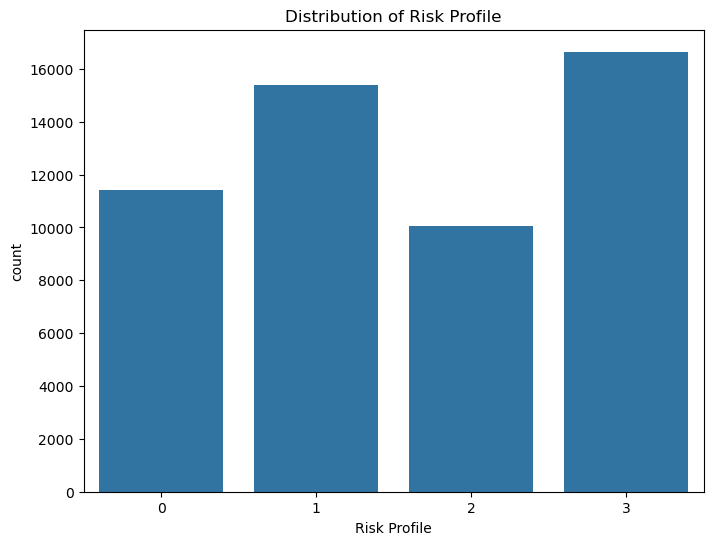

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

#Plot Distribution of Risk Profile
plt.figure(figsize=(8,6))
sns.countplot(x='Risk Profile', data=data)
plt.title('Distribution of Risk Profile')


# Corelation Matrix For Finding Linear Relationships(Numerical Cols)-Pearson Corelation

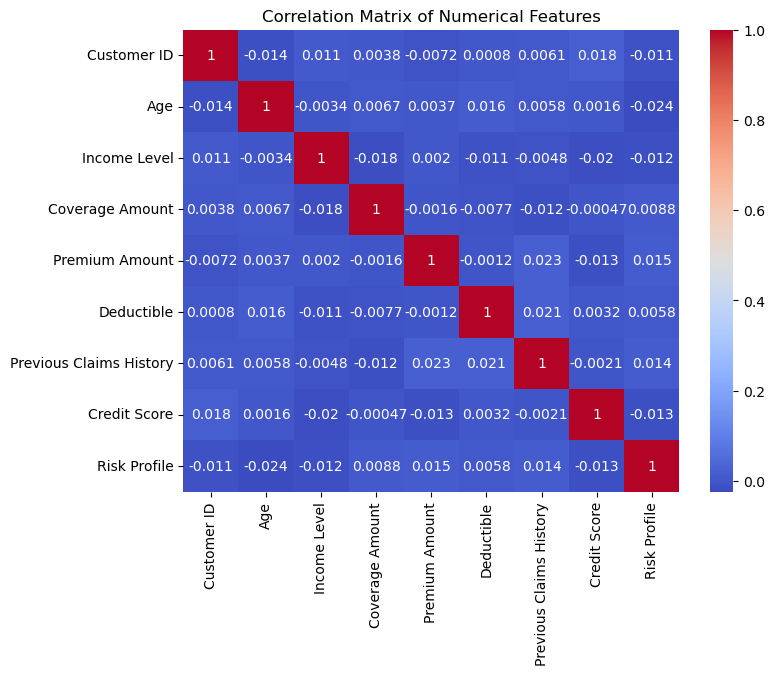

In [44]:
# Correlation matrix for numerical features
numerical_cols = ['Customer ID',
    'Age',
    'Income Level',
    'Coverage Amount',
    'Premium Amount',
    'Deductible',
    'Previous Claims History',
    'Credit Score',
    'Risk Profile'           
    ]
plt.figure(figsize=(8, 6))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Spearman Corelation Matrix-(Non-Linear Relationships)

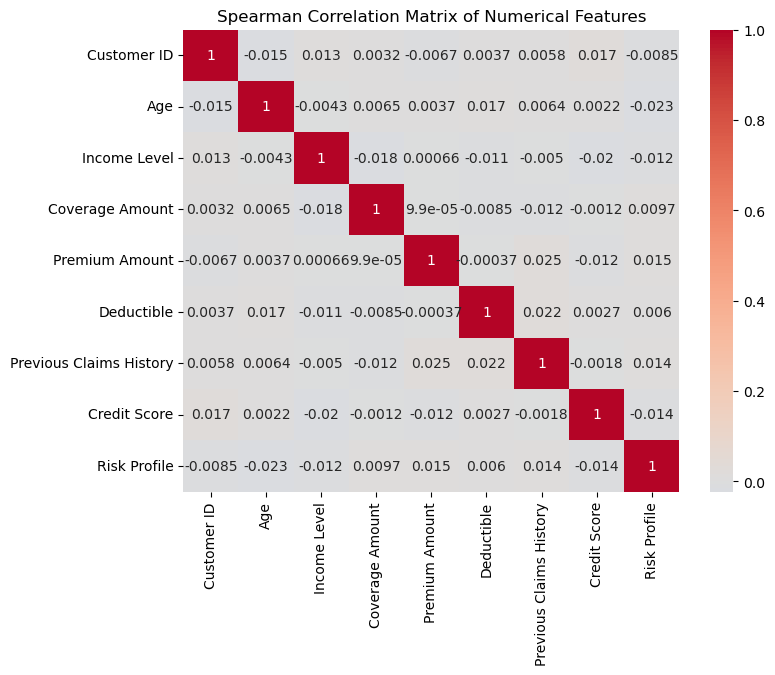

In [47]:
spearman_matrix=data[numerical_cols].corr(method='spearman')
plt.figure(figsize=(8,6))
sns.heatmap(spearman_matrix,annot=True,cmap='coolwarm',center=0)
plt.title('Spearman Correlation Matrix of Numerical Features')
plt.show()

# BOX PLOT OF Key Features VS Risk Profile


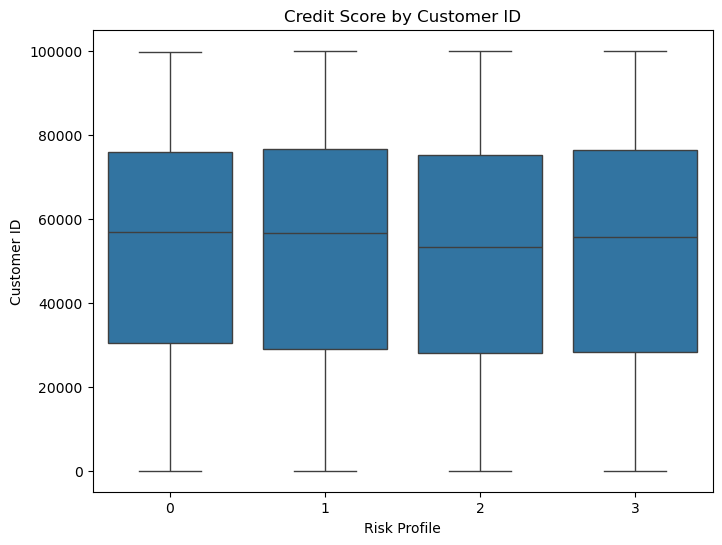

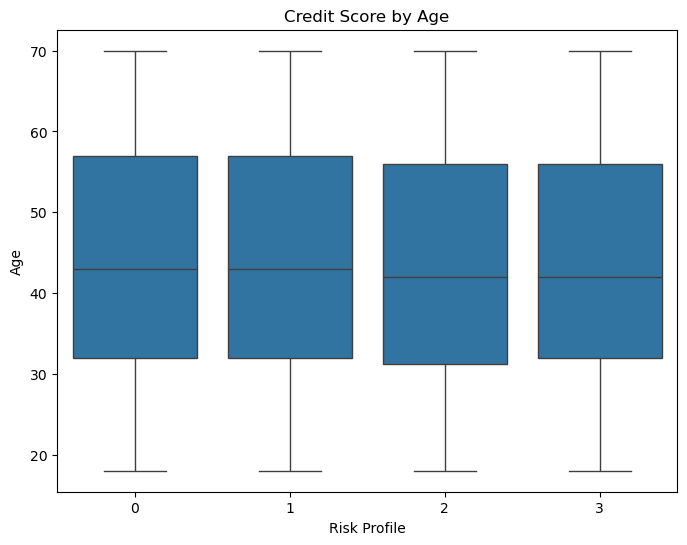

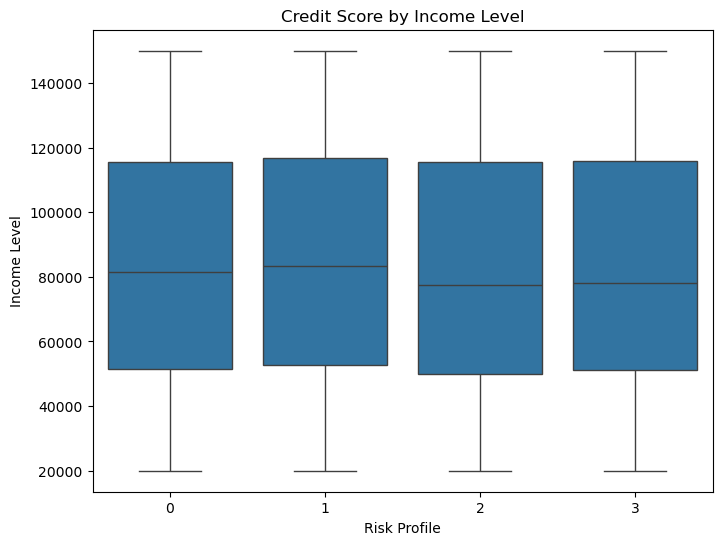

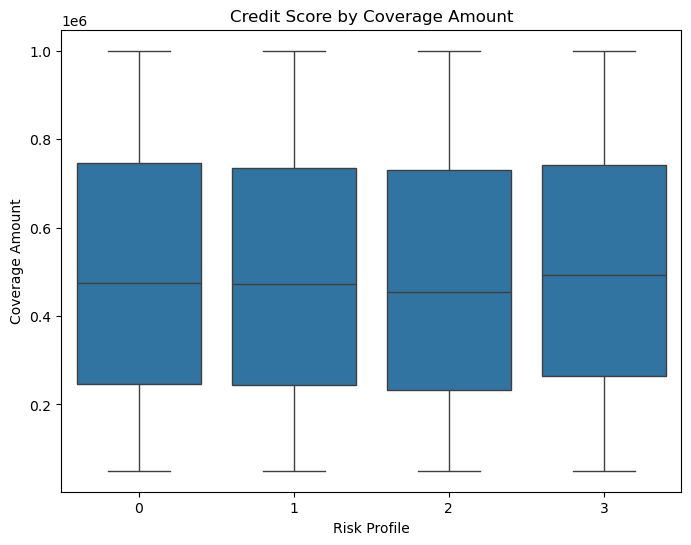

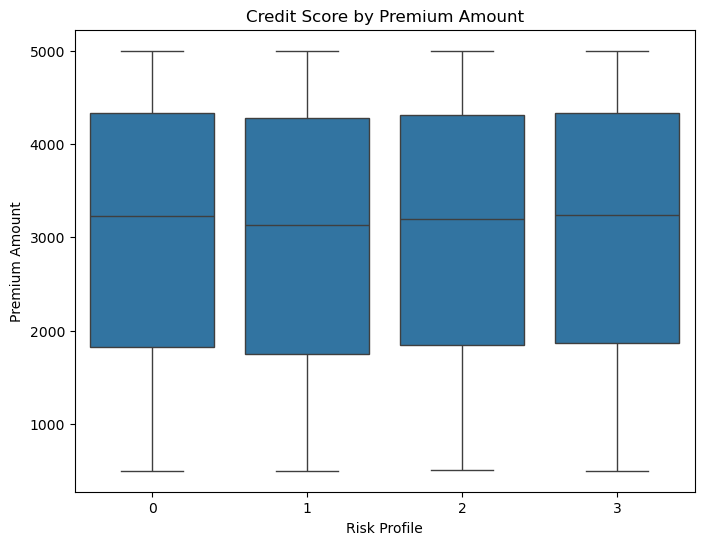

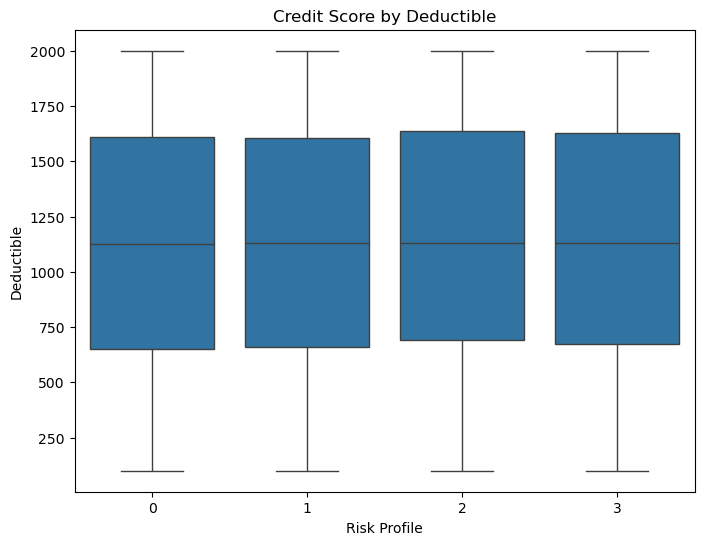

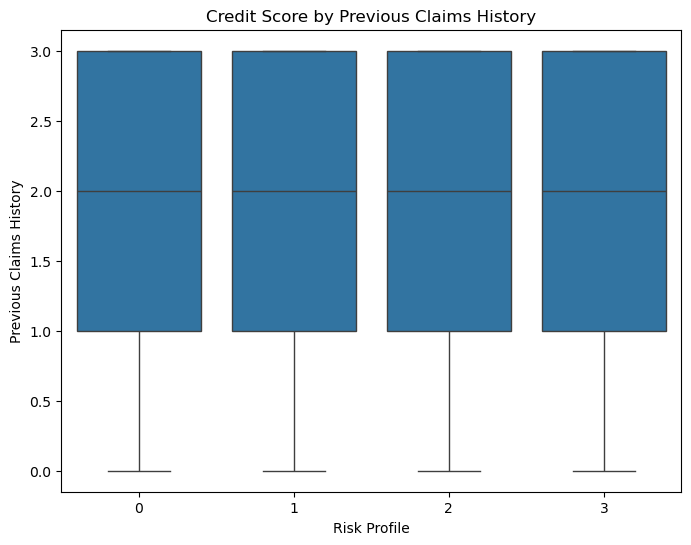

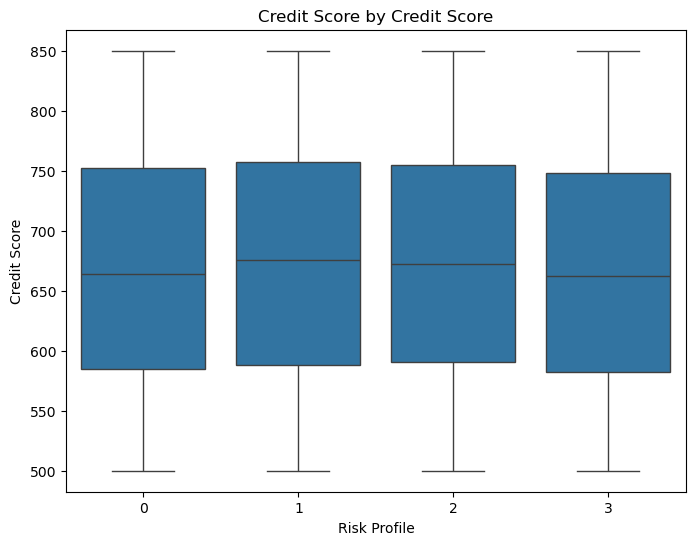

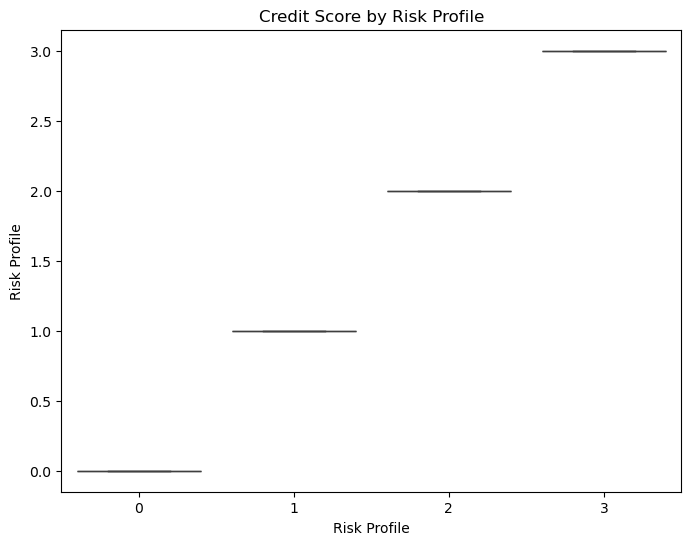

In [50]:
key_features=['Customer ID',
    'Age',
    'Income Level',
    'Coverage Amount',
    'Premium Amount',
    'Deductible',
    'Previous Claims History',
    'Credit Score',
    'Risk Profile']
for col in key_features:
    plt.figure(figsize=(8,6))
    sns.boxplot(x='Risk Profile', y=col, data=data)
    plt.title(f'Credit Score by {col}')
    plt.show()
    

# Corelation Matrix Categoricak Cols -Pearson Corelation

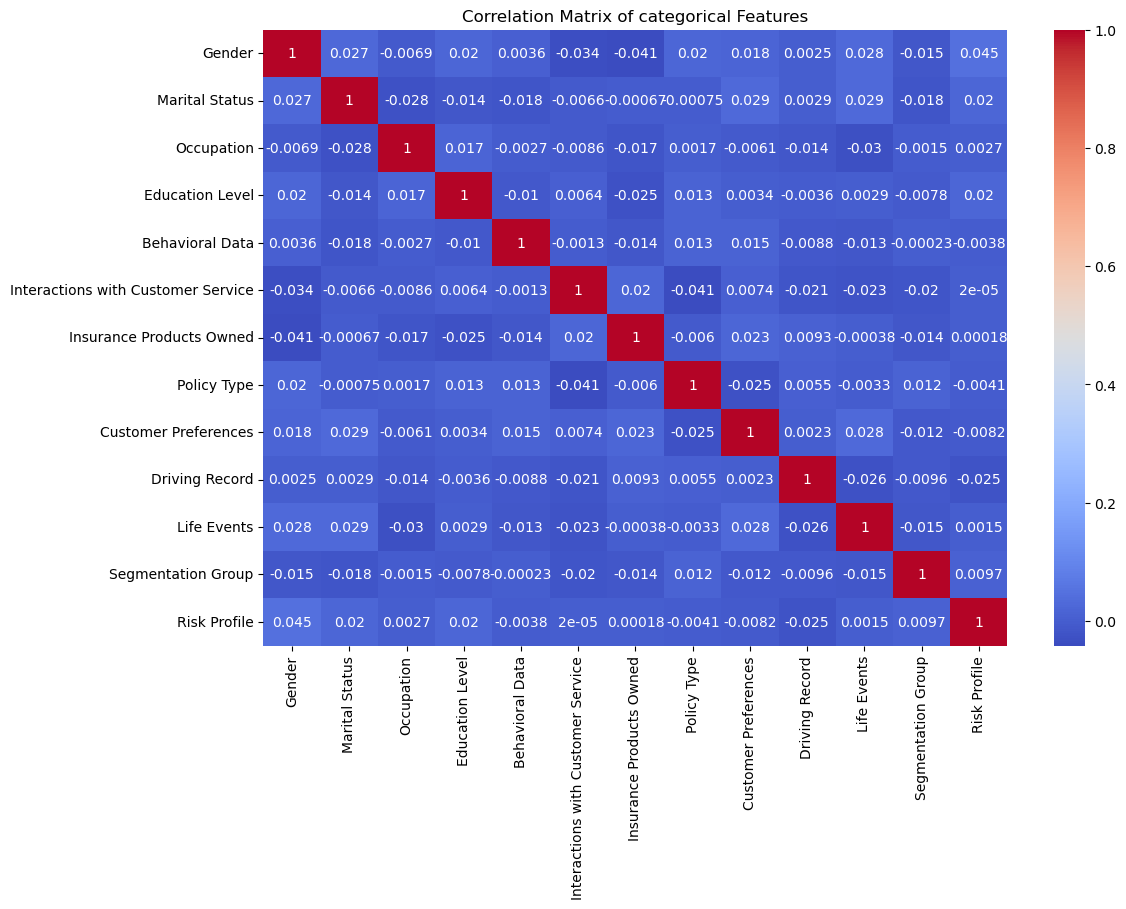

In [53]:
categorical_cols = [
    'Gender',
    'Marital Status',
    'Occupation',
    'Education Level',
    'Behavioral Data',
    'Interactions with Customer Service',
    'Insurance Products Owned',
    'Policy Type',
    'Customer Preferences',
    'Driving Record',
    'Life Events',
    'Segmentation Group',
     'Risk Profile'
]
plt.figure(figsize=(12, 8))
sns.heatmap(data[categorical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of categorical Features')
plt.show()





# Spearman Corelation(Non-Linear)

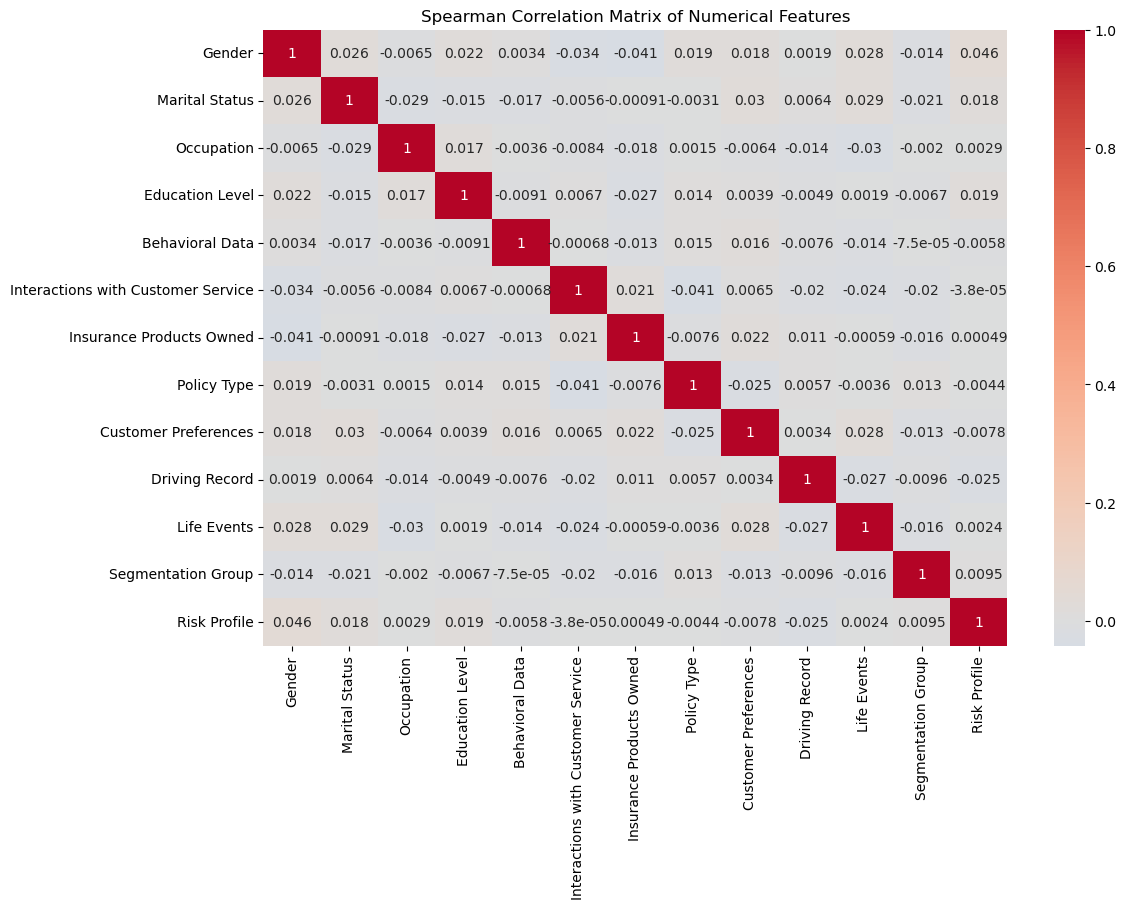

In [56]:
spearman_matrix=data[categorical_cols].corr(method='spearman')
plt.figure(figsize=(12,8))
sns.heatmap(spearman_matrix,annot=True,cmap='coolwarm',center=0)
plt.title('Spearman Correlation Matrix of Numerical Features')
plt.show()

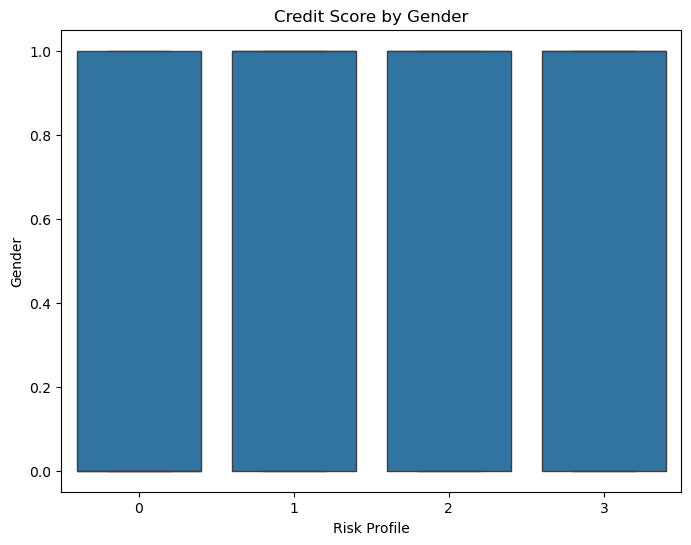

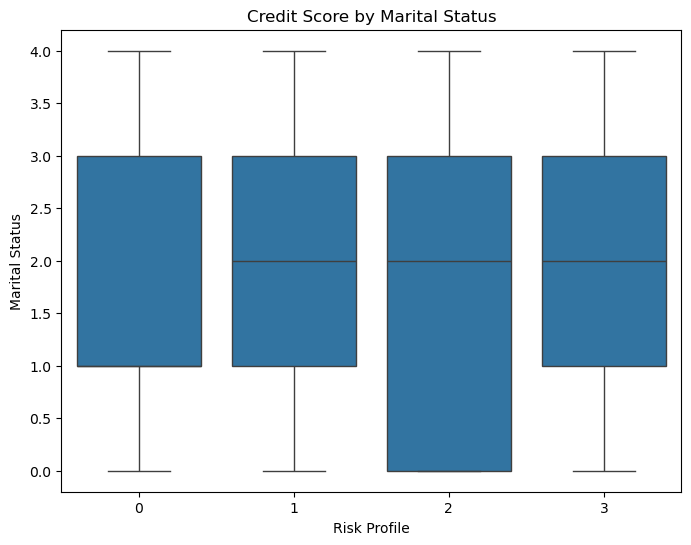

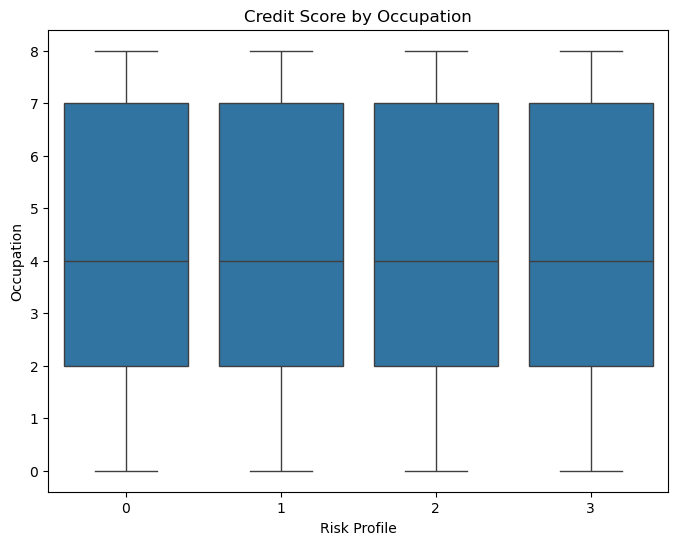

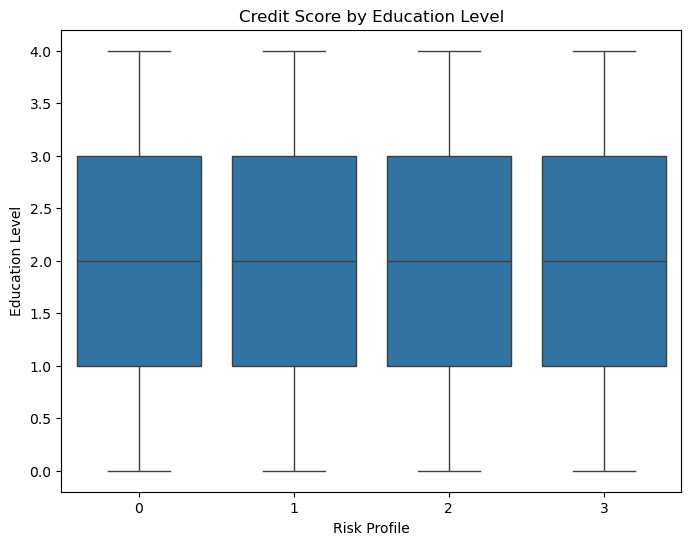

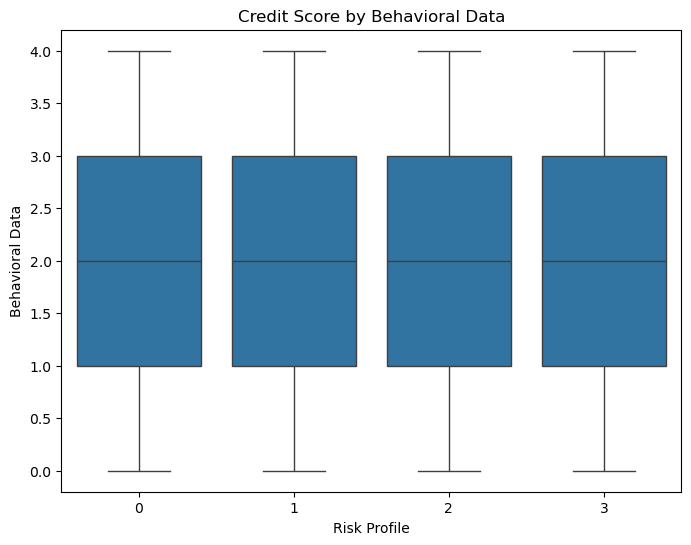

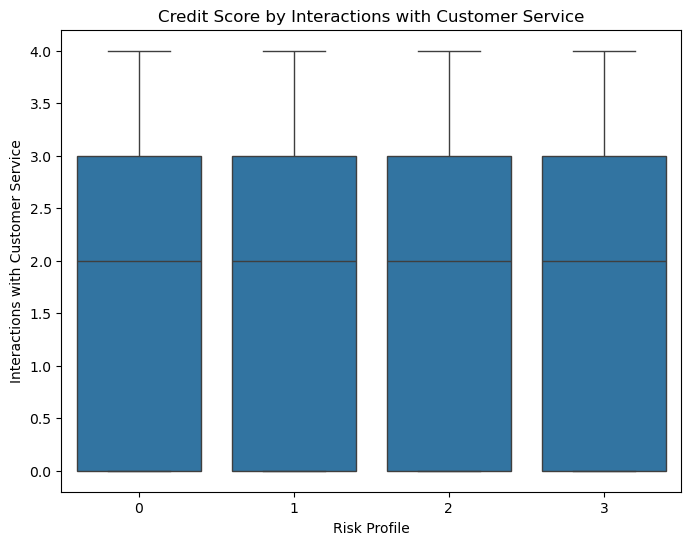

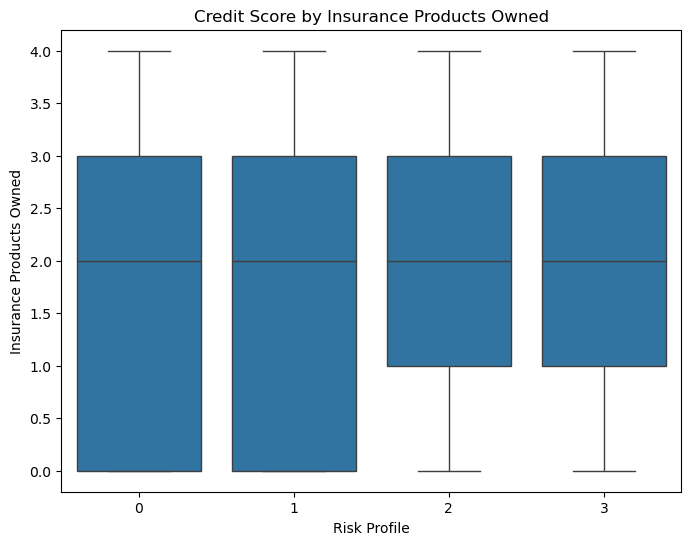

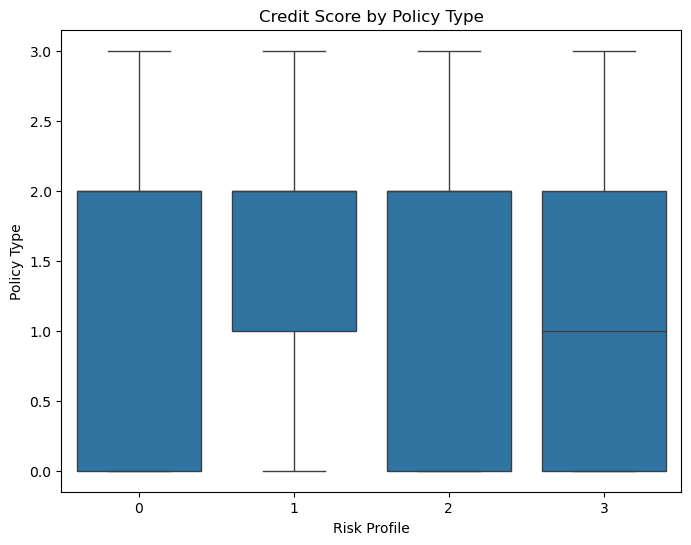

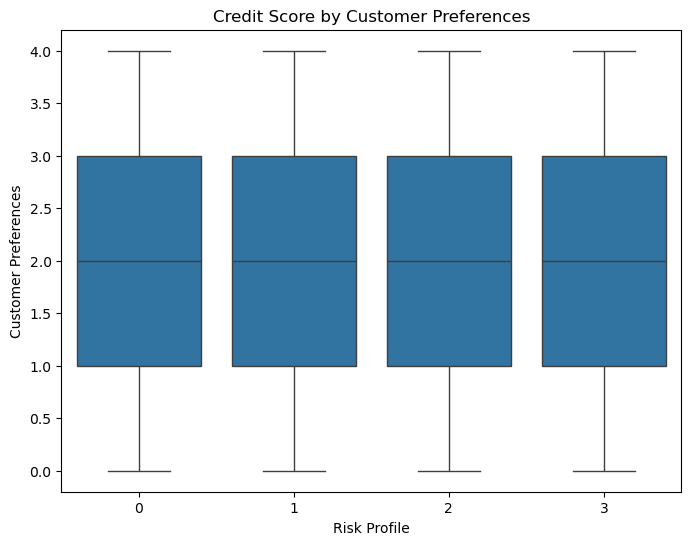

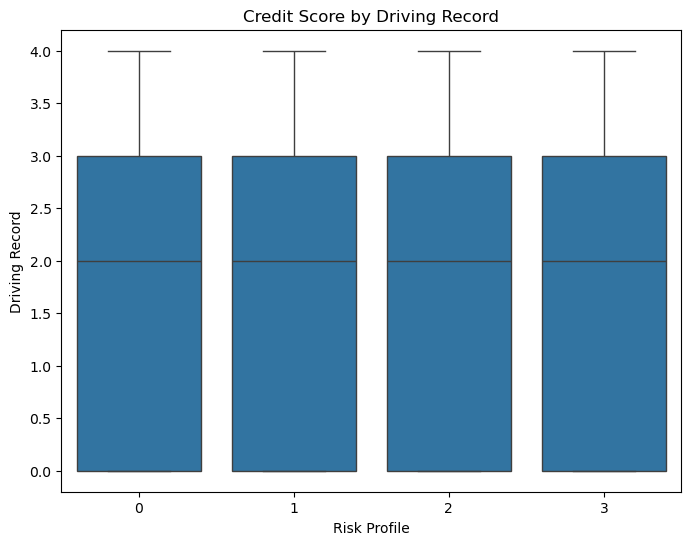

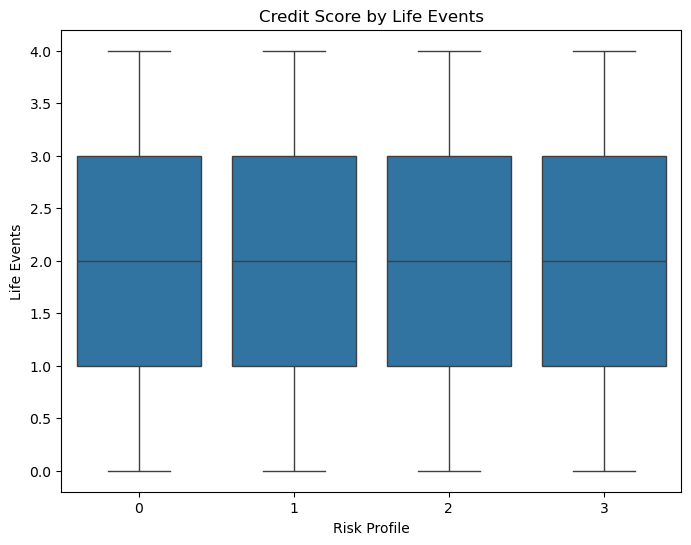

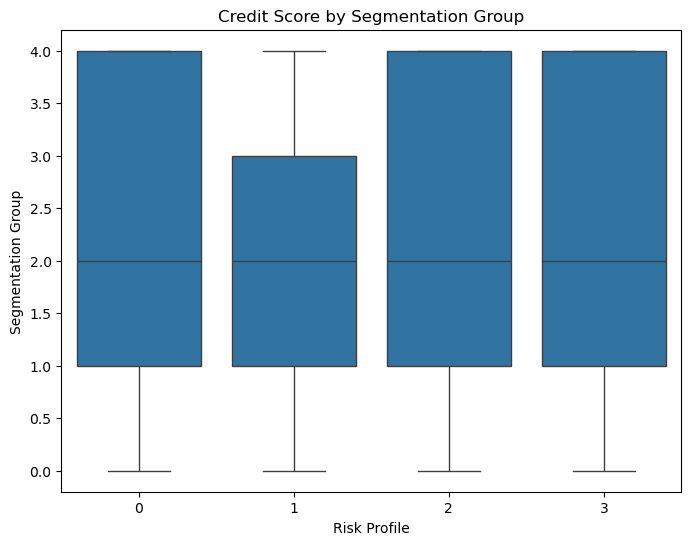

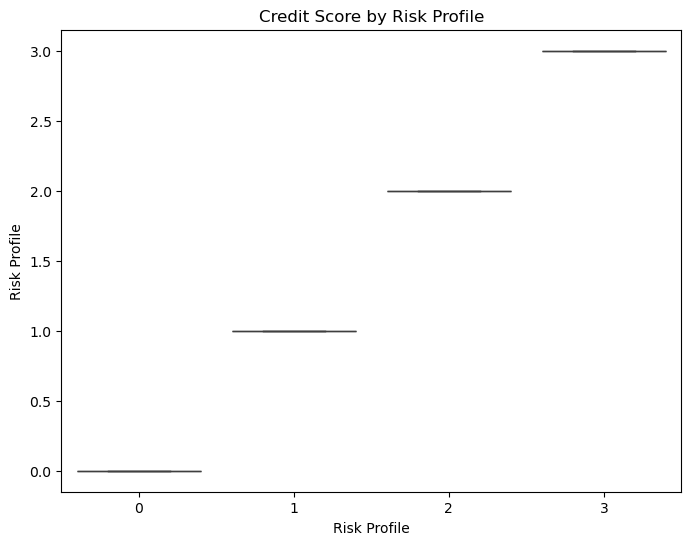

In [58]:
for col in categorical_cols:
    plt.figure(figsize=(8,6))
    sns.boxplot(x='Risk Profile', y=col, data=data)
    plt.title(f'Credit Score by {col}')
    plt.show()

In [59]:
# Feature Engineering
# 1. Combined Risk Behavior
data['Combined_Risk_Behavior'] = data['Driving Record'] * (data['Previous Claims History'] + 1)

# 2. Financial Stability Index (normalized)
max_income = data['Income Level'].max()
data['Financial_Stability_Index'] = (data['Credit Score'] / 850) * (data['Income Level'] / max_income)
data['Financial_Risk_Score'] = 1 - data['Financial_Stability_Index']  # Higher value = higher risk

# 3. Policy Risk Ratio
data['Policy_Risk_Ratio'] = data['Premium Amount'] / (data['Deductible'] + 1)

# 4. Education Segment Interaction
data['Education_Segment_Interaction'] = data['Education Level'] * data['Segmentation Group']

# 5. Engagement Score
data['Engagement_Score'] = data['Customer Preferences'] + data['Interactions with Customer Service']

# Verify new features
print("\nNew Features Added:")
print(data[['Combined_Risk_Behavior', 'Financial_Risk_Score', 'Policy_Risk_Ratio', 
            'Education_Segment_Interaction', 'Engagement_Score']].head())




New Features Added:
   Combined_Risk_Behavior  Financial_Risk_Score  Policy_Risk_Ratio  \
0                      16              0.597222           1.712773   
1                       0              0.663519           1.359613   
2                       6              0.583265           2.735896   
3                       4              0.682347           2.388339   
4                       8              0.780927           9.522388   

   Education_Segment_Interaction  Engagement_Score  
0                             16                 4  
1                             12                 2  
2                              8                 1  
3                              2                 4  
4                              1                 0  


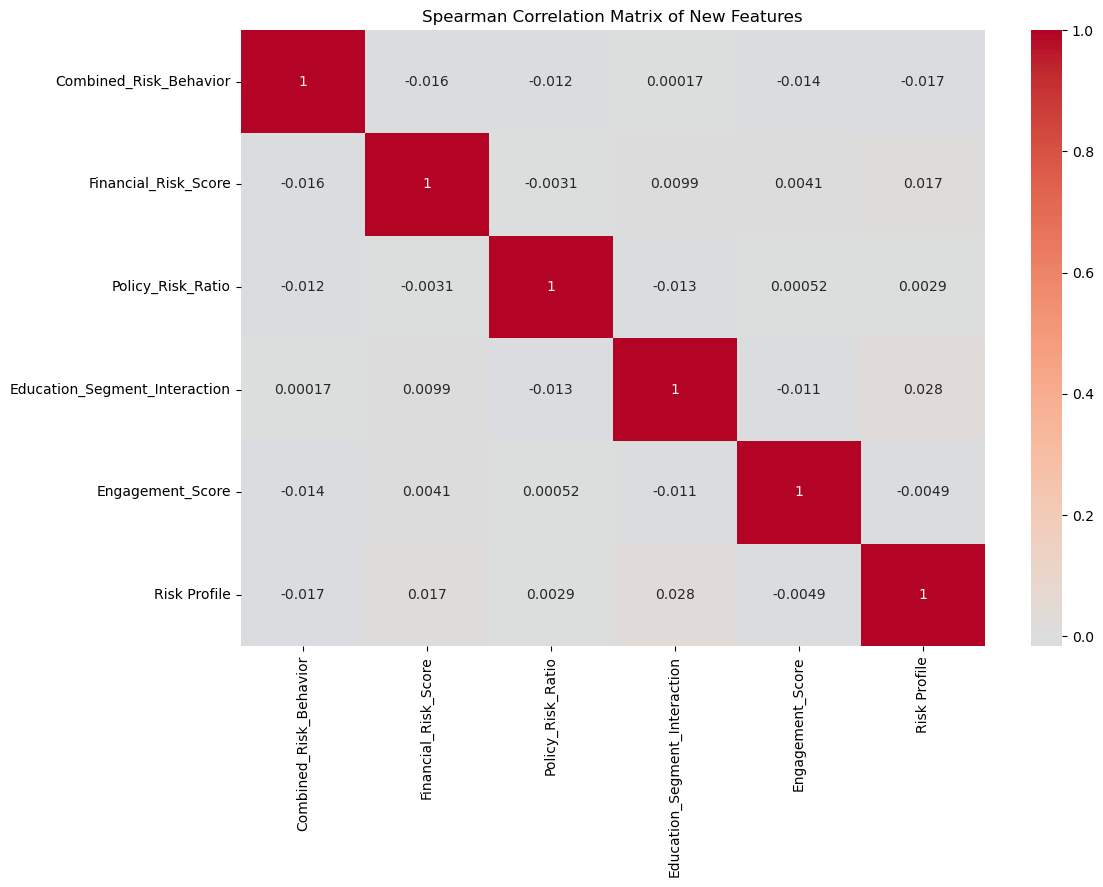


Spearman Correlations with Risk Profile (New Features):
Risk Profile                     1.000000
Education_Segment_Interaction    0.028046
Financial_Risk_Score             0.016654
Combined_Risk_Behavior          -0.016520
Engagement_Score                -0.004900
Policy_Risk_Ratio                0.002853
Name: Risk Profile, dtype: float64


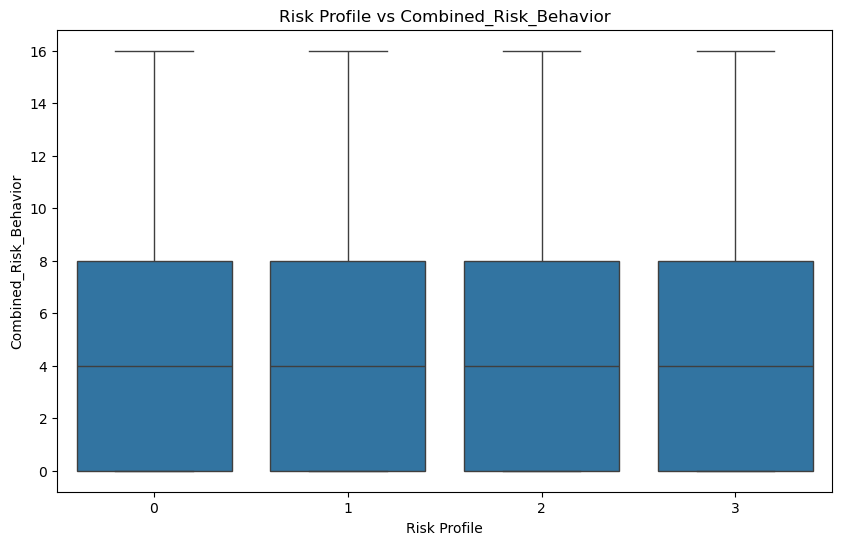

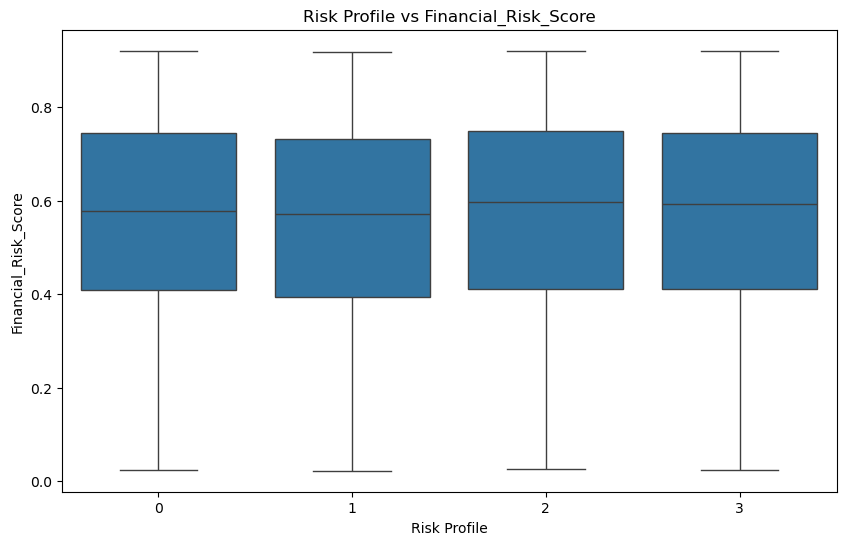

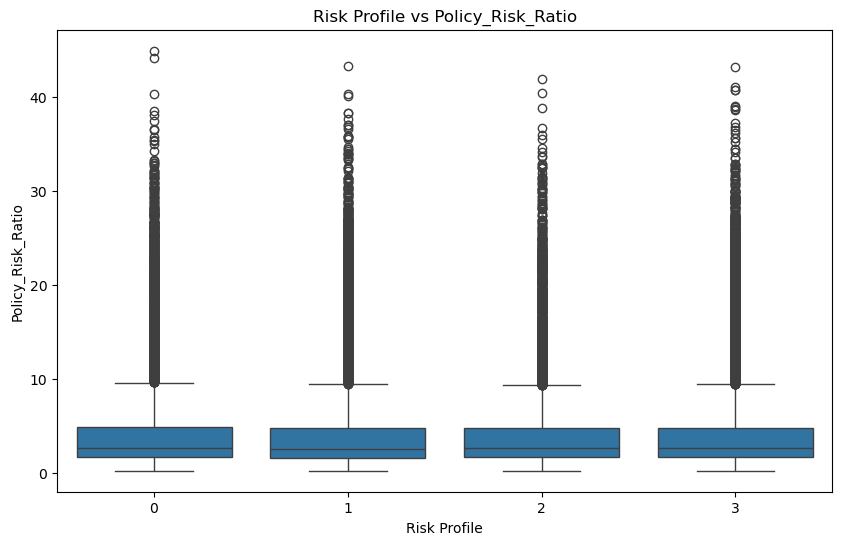

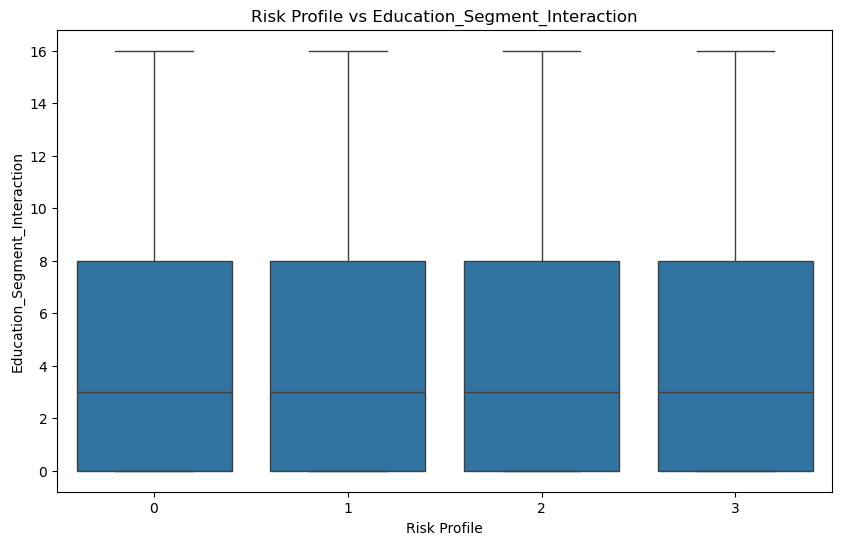

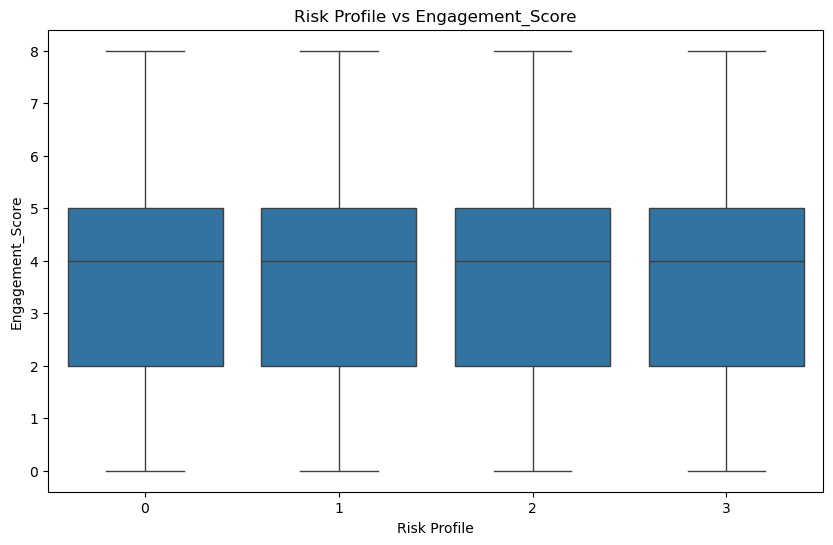

In [62]:
# --- Analyze New Features ---
# Spearman correlation for new features
new_features = ['Combined_Risk_Behavior', 'Financial_Risk_Score', 'Policy_Risk_Ratio', 
                'Education_Segment_Interaction', 'Engagement_Score']
plt.figure(figsize=(12, 8))
sns.heatmap(data[new_features + ['Risk Profile']].corr(method='spearman'), 
            annot=True, cmap='coolwarm', center=0)
plt.title('Spearman Correlation Matrix of New Features')
plt.show()

print("\nSpearman Correlations with Risk Profile (New Features):")
print(data[new_features + ['Risk Profile']].corr(method='spearman')['Risk Profile'].sort_values(key=abs, ascending=False))

# Box plots for new features
for col in new_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Risk Profile', y=col, data=data)
    plt.title(f'Risk Profile vs {col}')
    plt.show()

# Dropping Non Informative-Columns

In [65]:
# Drop non-informative columns
data = data.drop(columns=['Customer ID', 'Purchase History'])

# Saving the Data to a New CSV File

In [68]:
# Save the preprocessed data to a new CSV
data.to_csv('preprocessed_data.csv', index=False)
print("Preprocessed Data Saved. Shape:", data.shape)

Preprocessed Data Saved. Shape: (53503, 75)


# FEATURE ENGINEERING(RULE DRIVEN TARGET VARIABLE)

In [71]:
import pandas as pd
import numpy as np

# Load the preprocessed data
data = pd.read_csv('preprocessed_data.csv')
print("Loaded Shape:", data.shape)
print("Columns:", data.columns.tolist())

# Add Risk_Behavior_Score as a new feature
data['Risk_Behavior_Score'] = data['Driving Record'] + data['Previous Claims History']

# Define new Risk Profile based on business logic rules with Risk_Behavior_Score
conditions = [
    # Low Risk (1)
    (data['Previous Claims History'] <= data['Previous Claims History'].quantile(0.33)) &
    (data['Credit Score'] >= data['Credit Score'].quantile(0.67)) &
    (data['Income Level'] >= data['Income Level'].quantile(0.67)) &
    (data['Coverage Amount'] <= data['Coverage Amount'].quantile(0.33)) &
    (data['Deductible'] >= data['Deductible'].quantile(0.67)) &
    (data['Age'].between(30, 55)) &
    (data['Risk_Behavior_Score'] <= data['Risk_Behavior_Score'].quantile(0.33)),
    
    # Medium Risk (2)
    (data['Previous Claims History'].between(data['Previous Claims History'].quantile(0.33), data['Previous Claims History'].quantile(0.67))) &
    (data['Credit Score'].between(data['Credit Score'].quantile(0.33), data['Credit Score'].quantile(0.67))) &
    (data['Income Level'].between(data['Income Level'].quantile(0.33), data['Income Level'].quantile(0.67))) &
    (data['Coverage Amount'].between(data['Coverage Amount'].quantile(0.33), data['Coverage Amount'].quantile(0.67))) &
    (data['Deductible'].between(data['Deductible'].quantile(0.33), data['Deductible'].quantile(0.67))) &
    (data['Risk_Behavior_Score'] <= data['Risk_Behavior_Score'].quantile(0.85)),
    
    # High Risk (3)
    (
        (data['Previous Claims History'] > data['Previous Claims History'].quantile(0.67)) &
        (data['Credit Score'] < data['Credit Score'].quantile(0.33)) &
        (data['Income Level'] < data['Income Level'].quantile(0.33))
    ) | (
        (data['Coverage Amount'] > data['Coverage Amount'].quantile(0.67)) &
        (data['Deductible'] < data['Deductible'].quantile(0.33)) &
        ((data['Age'] < 25) | (data['Age'] > data['Age'].quantile(0.85))) &
        (data['Risk_Behavior_Score'] > data['Risk_Behavior_Score'].quantile(0.67))
    )
]

choices = [1, 2, 3]  # Low, Medium, High risk
data['Risk_Profile_New'] = np.select(conditions, choices, default=2)  # Default to Medium if no condition met

# Check the distribution of the new target
print("\nClass Distribution of Risk_Profile_New:")
print(data['Risk_Profile_New'].value_counts(normalize=True))  # Normalized to see percentages

# Save the updated data with the new target and new feature
data.to_csv('preprocessed_data_with_new_target_and_feature.csv', index=False)
print("Updated Data Saved. Shape:", data.shape)

Loaded Shape: (53503, 75)
Columns: ['Age', 'Gender', 'Marital Status', 'Occupation', 'Income Level', 'Education Level', 'Location', 'Behavioral Data', 'Policy Start Date', 'Policy Renewal Date', 'Interactions with Customer Service', 'Insurance Products Owned', 'Coverage Amount', 'Premium Amount', 'Deductible', 'Policy Type', 'Customer Preferences', 'Risk Profile', 'Previous Claims History', 'Credit Score', 'Driving Record', 'Life Events', 'Segmentation Group', 'Preferred Communication Channel_In-Person Meeting', 'Preferred Communication Channel_Mail', 'Preferred Communication Channel_Phone', 'Preferred Communication Channel_Text', 'Preferred Contact Time_Anytime', 'Preferred Contact Time_Evening', 'Preferred Contact Time_Morning', 'Preferred Contact Time_Weekends', 'Preferred Language_French', 'Preferred Language_German', 'Preferred Language_Mandarin', 'Preferred Language_Spanish', 'Geographic Information_Andhra Pradesh', 'Geographic Information_Arunachal Pradesh', 'Geographic Informat

# SMOTE METHORD TO IMPLEMENT EVEN TARGET VARIABLE DISTRIBUTION

In [84]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Load the updated data with the new target
data = pd.read_csv('preprocessed_data_with_new_target.csv')
print("Loaded Shape:", data.shape)
# print("Columns:", data.columns.tolist())

# Check the current distribution
print("\nClass Distribution of Risk_Profile_New (Before Balancing):")
print(data['Risk_Profile_New'].value_counts(normalize=True))

# Save the unbalanced data to a new CSV
data_bal = data.copy()
data_bal.to_csv('unbalanced_data.csv', index=False)
print("Unbalanced Data Saved. Shape:", data_bal.shape)

# Check the distribution again (still unbalanced, as expected)
print("\nClass Distribution of Risk_Profile_New (Unbalanced, Saved as unbalanced_data.csv):")
print(data_bal['Risk_Profile_New'].value_counts(normalize=True))

Loaded Shape: (53503, 74)

Class Distribution of Risk_Profile_New (Before Balancing):
Risk_Profile_New
3    0.907781
2    0.089303
1    0.002916
Name: proportion, dtype: float64
Unbalanced Data Saved. Shape: (53503, 74)

Class Distribution of Risk_Profile_New (Unbalanced, Saved as unbalanced_data.csv):
Risk_Profile_New
3    0.907781
2    0.089303
1    0.002916
Name: proportion, dtype: float64


# Save the Balanced Data

In [88]:
# Save the balanced data
data_bal.to_csv('balanced_data.csv', index=False)
print("Balanced Data Saved. Shape:", data_bal.shape)

Balanced Data Saved. Shape: (53503, 74)


# BASE MODEL TRAINING

Balanced Data Shape: (53503, 74)

Class Distribution (Before Processing):
Risk_Profile_New
3    0.907781
2    0.089303
1    0.002916
Name: proportion, dtype: float64

Balanced Class Distribution (Training Set After SMOTE):
Risk_Profile_New
3    0.333333
2    0.333333
1    0.333333
Name: proportion, dtype: float64

Accuracy on Validation Set (Threshold 0.6): 0.9872159090909091

Classification Report (Validation Set, Threshold 0.6):
              precision    recall  f1-score   support

           1       1.00      0.90      0.95        39
           2       0.88      0.99      0.93      1194
           3       1.00      0.99      0.99     12143

    accuracy                           0.99     13376
   macro avg       0.96      0.96      0.96     13376
weighted avg       0.99      0.99      0.99     13376


Confusion Matrix (Validation Set, Threshold 0.6):
[[   35     4     0]
 [    0  1183    11]
 [    0   156 11987]]

Accuracy on Test Set (Threshold 0.6): 0.9872906698564593

Classifica

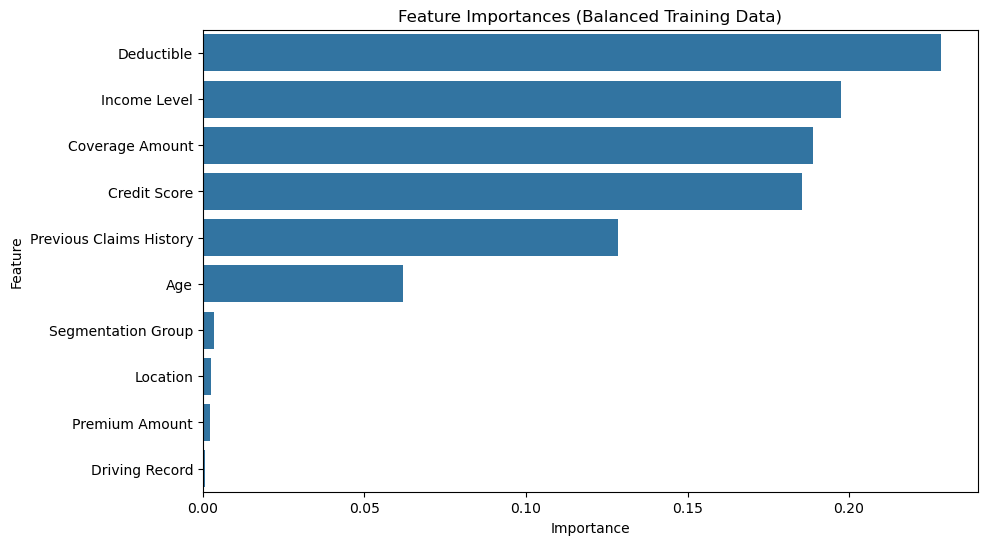

In [139]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data (assuming balanced_data.csv is unbalanced per your output)
data_bal = pd.read_csv('balanced_data.csv')
print("Balanced Data Shape:", data_bal.shape)

# Drop old Risk_Profile if it exists
data_bal = data_bal.drop(columns=['Risk_Profile'], errors='ignore')

# Select top 10 features and new target
selected_features = ['Age', 'Income Level', 'Coverage Amount', 'Premium Amount', 
                    'Deductible', 'Credit Score', 'Previous Claims History', 
                    'Driving Record', 'Segmentation Group', 'Location']
X_bal = data_bal[selected_features]
y_bal = data_bal['Risk_Profile_New']

# Identify numerical and categorical columns
numerical_cols = ['Age', 'Income Level', 'Coverage Amount', 'Premium Amount', 
                  'Deductible', 'Credit Score', 'Previous Claims History', 'Location']
categorical_cols = ['Driving Record', 'Segmentation Group']  # Already encoded

# Check class distribution (should be unbalanced if it matches your earlier output)
print("\nClass Distribution (Before Processing):")
print(y_bal.value_counts(normalize=True))

# New split: Train (50%), Validation (25%), Test (25%)
X_train, X_temp, y_train, y_temp = train_test_split(X_bal, y_bal, train_size=0.5, random_state=42, stratify=y_bal)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Scale only numerical columns
scaler = MinMaxScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_val[numerical_cols] = scaler.transform(X_val[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Apply SMOTE only to training set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE (training only)
print("\nBalanced Class Distribution (Training Set After SMOTE):")
print(pd.Series(y_train_res).value_counts(normalize=True))

# Train Random Forest with current regularization
rf_model = RandomForestClassifier(
    n_estimators=76,
    max_depth=None,
    min_samples_split=57,
    min_samples_leaf=6,
    random_state=42
)
rf_model.fit(X_train_res, y_train_res)

# Get probability predictions and apply 0.6 threshold for class 3
threshold = 0.6
y_prob_val = rf_model.predict_proba(X_val)
y_pred_val = np.where(y_prob_val[:, 2] > threshold, 3, 
                      np.where(y_prob_val[:, 1] > y_prob_val[:, 0], 2, 1))
y_prob_test = rf_model.predict_proba(X_test)
y_pred_test = np.where(y_prob_test[:, 2] > threshold, 3, 
                       np.where(y_prob_test[:, 1] > y_prob_test[:, 0], 2, 1))

# Evaluate on validation set with 0.6 threshold
accuracy_val = accuracy_score(y_val, y_pred_val)
print(f"\nAccuracy on Validation Set (Threshold {threshold}):", accuracy_val)
print(f"\nClassification Report (Validation Set, Threshold {threshold}):")
print(classification_report(y_val, y_pred_val))
print(f"\nConfusion Matrix (Validation Set, Threshold {threshold}):")
print(confusion_matrix(y_val, y_pred_val))

# Evaluate on test set with 0.6 threshold
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"\nAccuracy on Test Set (Threshold {threshold}):", accuracy_test)
print(f"\nClassification Report (Test Set, Threshold {threshold}):")
print(classification_report(y_test, y_pred_test))
print(f"\nConfusion Matrix (Test Set, Threshold {threshold}):")
print(confusion_matrix(y_test, y_pred_test))

# Cross-validation to check generalization (on balanced training data, default predictions)
cv_scores = cross_val_score(rf_model, X_train_res, y_train_res, cv=5)
print("\nCross-Validation Scores (Training Data):", cv_scores)
print("Average CV Score (Training Data):", cv_scores.mean())
print("CV Score Std (Training Data):", cv_scores.std())

# Feature Importance
feature_importance = pd.DataFrame({'Feature': X_bal.columns, 'Importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importances (Balanced Training Data)')
plt.show()

Balanced Data Shape: (53503, 74)

Class Distribution (Before Processing):
Risk_Profile_New
3    0.907781
2    0.089303
1    0.002916
Name: proportion, dtype: float64

Balanced Class Distribution (Training Set After SMOTE):
Risk_Profile_New
3    0.333333
2    0.333333
1    0.333333
Name: proportion, dtype: float64

Threshold: 0.5 - Validation Set
Accuracy: 0.9877
Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.90      0.95        39
           2       0.89      0.99      0.93      1194
           3       1.00      0.99      0.99     12143

    accuracy                           0.99     13376
   macro avg       0.96      0.96      0.96     13376
weighted avg       0.99      0.99      0.99     13376

Confusion Matrix:
[[   35     4     0]
 [    0  1177    17]
 [    0   143 12000]]

Threshold: 0.5 - Test Set
Accuracy: 0.9875
Classification Report:
              precision    recall  f1-score   support

           1       1.00    

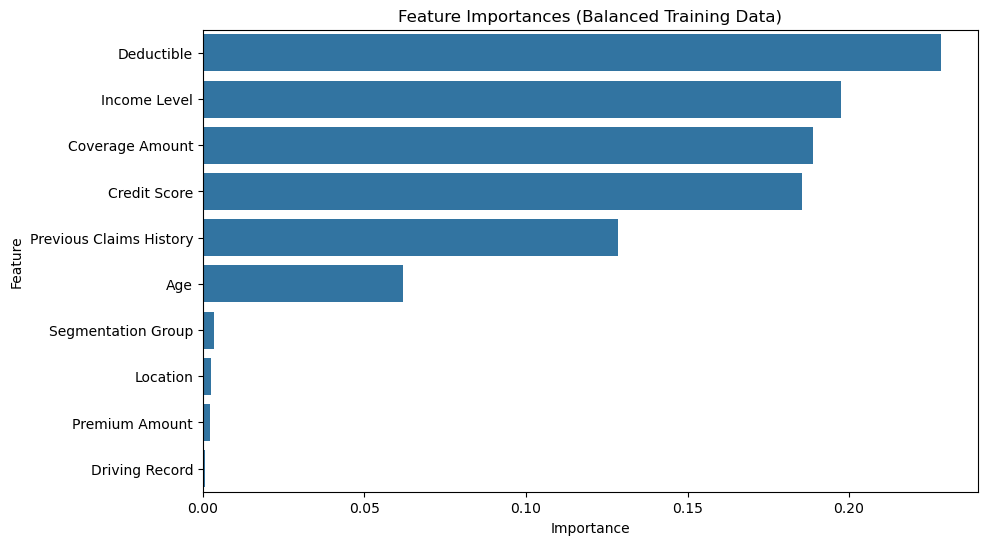

In [93]:
# import pandas as pd
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# from sklearn.preprocessing import MinMaxScaler
# from imblearn.over_sampling import SMOTE
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np

# # Load the data (assuming balanced_data.csv is unbalanced per your output)
# data_bal = pd.read_csv('balanced_data.csv')
# print("Balanced Data Shape:", data_bal.shape)

# # Drop old Risk_Profile if it exists
# data_bal = data_bal.drop(columns=['Risk_Profile'], errors='ignore')

# # Select top 10 features and new target
# selected_features = ['Age', 'Income Level', 'Coverage Amount', 'Premium Amount', 
#                     'Deductible', 'Credit Score', 'Previous Claims History', 
#                     'Driving Record', 'Segmentation Group', 'Location']
# X_bal = data_bal[selected_features]
# y_bal = data_bal['Risk_Profile_New']

# # Identify numerical and categorical columns
# numerical_cols = ['Age', 'Income Level', 'Coverage Amount', 'Premium Amount', 
#                   'Deductible', 'Credit Score', 'Previous Claims History', 'Location']
# categorical_cols = ['Driving Record', 'Segmentation Group']  # Already encoded

# # Check class distribution
# print("\nClass Distribution (Before Processing):")
# print(y_bal.value_counts(normalize=True))

# # Split: Train (50%), Validation (25%), Test (25%)
# X_train, X_temp, y_train, y_temp = train_test_split(X_bal, y_bal, train_size=0.5, random_state=42, stratify=y_bal)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# # Scale only numerical columns
# scaler = MinMaxScaler()
# X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
# X_val[numerical_cols] = scaler.transform(X_val[numerical_cols])
# X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# # Apply SMOTE only to training set
# smote = SMOTE(random_state=42)
# X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# # Check class distribution after SMOTE
# print("\nBalanced Class Distribution (Training Set After SMOTE):")
# print(pd.Series(y_train_res).value_counts(normalize=True))

# # Train Random Forest with current regularization
# rf_model = RandomForestClassifier(
#     n_estimators=76,
#     max_depth=None,
#     min_samples_split=57,
#     min_samples_leaf=6,
#     random_state=42
# )
# rf_model.fit(X_train_res, y_train_res)

# # Get probability predictions for validation and test sets
# y_prob_val = rf_model.predict_proba(X_val)
# y_prob_test = rf_model.predict_proba(X_test)

# # Test different thresholds for class 3 (high risk) prediction
# thresholds = [0.5, 0.6, 0.7]
# for t in thresholds:
#     # Predict with threshold (class 3 if prob > t, else check class 2 or 1)
#     y_pred_val_t = np.where(y_prob_val[:, 2] > t, 3, 
#                             np.where(y_prob_val[:, 1] > y_prob_val[:, 0], 2, 1))
#     y_pred_test_t = np.where(y_prob_test[:, 2] > t, 3, 
#                              np.where(y_prob_test[:, 1] > y_prob_test[:, 0], 2, 1))

#     # Evaluate on validation set
#     print(f"\nThreshold: {t} - Validation Set")
#     print(f"Accuracy: {accuracy_score(y_val, y_pred_val_t):.4f}")
#     print("Classification Report:")
#     print(classification_report(y_val, y_pred_val_t))
#     print("Confusion Matrix:")
#     print(confusion_matrix(y_val, y_pred_val_t))

#     # Evaluate on test set
#     print(f"\nThreshold: {t} - Test Set")
#     print(f"Accuracy: {accuracy_score(y_test, y_pred_test_t):.4f}")
#     print("Classification Report:")
#     print(classification_report(y_test, y_pred_test_t))
#     print("Confusion Matrix:")
#     print(confusion_matrix(y_test, y_pred_test_t))

# # Feature Importance (using default predictions for plot)
# feature_importance = pd.DataFrame({'Feature': X_bal.columns, 'Importance': rf_model.feature_importances_})
# feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
# print("\nFeature Importance:")
# print(feature_importance)

# # Plot feature importance
# plt.figure(figsize=(10, 6))
# sns.barplot(x='Importance', y='Feature', data=feature_importance)
# plt.title('Feature Importances (Balanced Training Data)')
# plt.show()

In [141]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

# Assuming rf_model, X_train_res, y_train_res, X_test, y_test are defined from your training cell
# Ensure X_test has no Flood_Risk—drop it if present
if 'Flood_Risk' in X_test.columns:
    X_test = X_test.drop(columns=['Flood_Risk'])

# Manual batch updates
n_updates = 5
remaining_test = X_test.copy()
remaining_labels = y_test.copy()
threshold = 0.6  # Goldilocks

for i in range(n_updates):
    if len(remaining_test) > 0:
        # Get a batch of the new data 
        X_batch, _, y_batch, _ = train_test_split(remaining_test, remaining_labels, 
                                                  train_size=min(30, len(remaining_test)), 
                                                  random_state=i, stratify=remaining_labels)
        # Combine with existing training data 
        X_combined = pd.concat([pd.DataFrame(X_train_res), X_batch])
        y_combined = pd.concat([pd.Series(y_train_res), y_batch])
        # Retrain the model
        rf_model.fit(X_combined, y_combined)
        # Remove the used batch from test set 
        remaining_test = remaining_test.drop(X_batch.index)
        remaining_labels = remaining_labels.drop(y_batch.index)
        # Evaluate after update
        y_prob_update = rf_model.predict_proba(X_test)
        y_pred_update = np.where(y_prob_update[:, 2] > threshold, 3, 
                                 np.where(y_prob_update[:, 1] > y_prob_update[:, 0], 2, 1))
        print(f"\nUpdate {i+1} Accuracy (Threshold {threshold}): {accuracy_score(y_test, y_pred_update):.4f}")
        print(f"Classification Report after Update {i+1}:")
        print(classification_report(y_test, y_pred_update))

# Final evaluation
y_prob_final = rf_model.predict_proba(X_test)
y_pred_final = np.where(y_prob_final[:, 2] > threshold, 3, 
                        np.where(y_prob_final[:, 1] > y_prob_final[:, 0], 2, 1))
print(f"\nFinal Accuracy after All Updates (Threshold {threshold}): {accuracy_score(y_test, y_pred_final):.4f}")
print(f"Final Classification Report (Threshold {threshold}):")
print(classification_report(y_test, y_pred_final))



Update 1 Accuracy (Threshold 0.6): 0.9875
Classification Report after Update 1:
              precision    recall  f1-score   support

           1       1.00      0.82      0.90        39
           2       0.88      0.99      0.93      1195
           3       1.00      0.99      0.99     12142

    accuracy                           0.99     13376
   macro avg       0.96      0.93      0.94     13376
weighted avg       0.99      0.99      0.99     13376


Update 2 Accuracy (Threshold 0.6): 0.9873
Classification Report after Update 2:
              precision    recall  f1-score   support

           1       1.00      0.82      0.90        39
           2       0.88      0.99      0.93      1195
           3       1.00      0.99      0.99     12142

    accuracy                           0.99     13376
   macro avg       0.96      0.93      0.94     13376
weighted avg       0.99      0.99      0.99     13376


Update 3 Accuracy (Threshold 0.6): 0.9880
Classification Report after Updat

In [143]:
import joblib

# Save the trained Random Forest model to a file
model_filename = 'random_forest_risk_model.joblib'
joblib.dump(rf_model, model_filename)

print(f"Model saved to {model_filename}")


scaler_filename = 'scaler.joblib'
joblib.dump(scaler, scaler_filename)
print(f"Scaler saved to {scaler_filename}")

Model saved to random_forest_risk_model.joblib
Scaler saved to scaler.joblib


# SAMPLE INPUT TESTING FOR LOW MEDIUM AND HIGH RISK

In [145]:
import joblib
import pandas as pd
import numpy as np

# Load the saved model
model_filename = 'random_forest_risk_model.joblib'
loaded_rf_model = joblib.load(model_filename)
print("Model loaded successfully!")

# Load the saved scaler
scaler_filename = 'scaler.joblib'
scaler = joblib.load(scaler_filename)
print("Scaler loaded successfully!")

# Test with your sample inputs
sample_inputs = pd.DataFrame({
    'Age': [40, 42, 22],
    'Income Level': [125000, 100000, 30000],
    'Coverage Amount': [150000, 250000, 500000],
    'Premium Amount': [500, 1000, 2000],
    'Deductible': [1800, 1500, 200],
    'Credit Score': [780, 740, 600],
    'Previous Claims History': [0, 1, 4],
    'Driving Record': [0, 3, 4],  # 0=Clean, 3=Accident, 4=DUI
    'Segmentation Group': [0, 2, 4],
    'Location': [0, 1, 2]
}, index=['Low Risk', 'Medium Risk', 'High Risk'])

# Identify numerical columns (same as training)
numerical_cols = ['Age', 'Income Level', 'Coverage Amount', 'Premium Amount', 
                  'Deductible', 'Credit Score', 'Previous Claims History', 'Location']

# Scale numerical columns in sample inputs
sample_inputs[numerical_cols] = scaler.transform(sample_inputs[numerical_cols])

# Predict with the loaded model (using 0.6 threshold)
threshold = 0.6
y_prob = loaded_rf_model.predict_proba(sample_inputs)
y_pred = np.where(y_prob[:, 2] > threshold, 3, 
                  np.where(y_prob[:, 1] > y_prob[:, 0], 2, 1))

# Map predictions
risk_labels = {1: 'Low Risk (1)', 2: 'Medium Risk (2)', 3: 'High Risk (3)'}
predicted_risks = [risk_labels[pred] for pred in y_pred]

# Display results
print("\nSample Inputs (Scaled) and Predictions with Loaded Model:")
print(sample_inputs)
print("\nPredicted Risk Profiles:")
for idx, pred in zip(sample_inputs.index, predicted_risks):
    print(f"{idx}: {pred}")
print("\nPrediction Probabilities (Low, Medium, High):")
for idx, prob in zip(sample_inputs.index, y_prob):
    print(f"{idx}: {prob}")

Model loaded successfully!
Scaler loaded successfully!

Sample Inputs (Scaled) and Predictions with Loaded Model:
                  Age  Income Level  Coverage Amount  Premium Amount  \
Low Risk     0.423077      0.807697         0.105262        0.000000   
Medium Risk  0.461538      0.615386         0.210525        0.111111   
High Risk    0.076923      0.076917         0.473684        0.333333   

             Deductible  Credit Score  Previous Claims History  \
Low Risk       0.894737      0.800000                 0.000000   
Medium Risk    0.736842      0.685714                 0.333333   
High Risk      0.052632      0.285714                 1.333333   

             Driving Record  Segmentation Group  Location  
Low Risk                  0                   0 -0.111112  
Medium Risk               3                   2 -0.111101  
High Risk                 4                   4 -0.111090  

Predicted Risk Profiles:
Low Risk: Low Risk (1)
Medium Risk: Medium Risk (2)
High Risk: Hig

# ONLINE LEARNING

In [106]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from river import ensemble, tree
import joblib

# Load the data
data_bal = pd.read_csv('balanced_data.csv')
print("Balanced Data Shape:", data_bal.shape)

# Drop old Risk_Profile if it exists
data_bal = data_bal.drop(columns=['Risk_Profile'], errors='ignore')

# Select initial features and target
selected_features = ['Age', 'Income Level', 'Coverage Amount', 'Premium Amount', 
                     'Deductible', 'Credit Score', 'Previous Claims History', 
                     'Driving Record', 'Segmentation Group', 'Location']
X_bal = data_bal[selected_features]
y_bal = data_bal['Risk_Profile_New']

# Numerical columns for scaling
numerical_cols = ['Age', 'Income Level', 'Coverage Amount', 'Premium Amount', 
                  'Deductible', 'Credit Score', 'Previous Claims History', 'Location']
categorical_cols = ['Driving Record', 'Segmentation Group']

# Split: Train (80%), Test (20%)—online learning uses tr5ain as initial stream
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.2, random_state=42, stratify=y_bal)

# Scale numerical columns
scaler = MinMaxScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Apply SMOTE to training set for initial batch
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Shuffle SMOTE’d data (sandbox style)
idx = np.random.permutation(len(X_train_res))
X_train_res = X_train_res.iloc[idx]
y_train_res = y_train_res.iloc[idx]

# Convert to River format
X_train_dict = [dict(zip(X_train_res.columns, x)) for x in X_train_res.values]
y_train_list = y_train_res.values
X_test_dict = [dict(zip(X_test.columns, x)) for x in X_test.values]
y_test_list = y_test.values

# Initialize SRPClassifier (sandbox-inspired)
base_model = tree.HoeffdingTreeClassifier(max_depth=5, grace_period=100)  # Slower adaptation
srp_model = ensemble.SRPClassifier(n_models=200, model=base_model, seed=42)

# Initial batch training
for x, y in zip(X_train_dict, y_train_list):
    srp_model.learn_one(x, y)

# Initial prediction on test set
y_pred_initial = [srp_model.predict_one(x) for x in X_test_dict]
print(f"\nInitial River SRP Accuracy: {accuracy_score(y_test_list, y_pred_initial):.4f}")
print("Initial River SRP Classification Report:")
print(classification_report(y_test_list, y_pred_initial))

# Adaptive updates with test set batches (sandbox logic)
n_updates = 3
remaining_test = X_test.copy()
remaining_labels = y_test.copy()

for i in range(n_updates):
    if len(remaining_test) > 0:
        X_batch, _, y_batch, _ = train_test_split(remaining_test, remaining_labels, 
                                                  train_size=min(50, len(remaining_test)), 
                                                  random_state=i, stratify=remaining_labels)
        for x, y in zip(X_batch.to_dict('records'), y_batch.values):
            srp_model.learn_one(x, y)
        remaining_test = remaining_test.drop(X_batch.index)
        remaining_labels = remaining_labels.drop(y_batch.index)
        
        y_pred_update = [srp_model.predict_one(x) for x in X_test_dict]
        print(f"\nUpdate {i+1} Accuracy: {accuracy_score(y_test_list, y_pred_update):.4f}")
        print(f"Classification Report after Update {i+1}:")
        print(classification_report(y_test_list, y_pred_update))

# Add new feature (Flood_Risk) to remaining test set
np.random.seed(42)
X_test['Flood_Risk'] = np.random.randint(0, 3, size=len(X_test))  # 0=Low, 1=Med, 2=High
X_test_dict = [dict(zip(X_test.columns, x)) for x in X_test.values]

# Online learning with new feature
for x, y in zip(X_test_dict, y_test_list):
    srp_model.learn_one(x, y)

# Final evaluation with new feature
y_pred_final = [srp_model.predict_one(x) for x in X_test_dict]
print(f"\nFinal River SRP Accuracy (With Flood_Risk): {accuracy_score(y_test_list, y_pred_final):.4f}")
print("Final River SRP Classification Report:")
print(classification_report(y_test_list, y_pred_final))

# Save the scaler
joblib.dump(scaler, 'scaler.joblib')
print("Scaler saved to scaler.joblib")

Balanced Data Shape: (53503, 74)

Initial River SRP Accuracy: 0.9522
Initial River SRP Classification Report:
              precision    recall  f1-score   support

           1       0.56      0.97      0.71        31
           2       0.66      0.98      0.79       956
           3       1.00      0.95      0.97      9714

    accuracy                           0.95     10701
   macro avg       0.74      0.97      0.82     10701
weighted avg       0.97      0.95      0.96     10701


Update 1 Accuracy: 0.9522
Classification Report after Update 1:
              precision    recall  f1-score   support

           1       0.56      0.97      0.71        31
           2       0.66      0.98      0.79       956
           3       1.00      0.95      0.97      9714

    accuracy                           0.95     10701
   macro avg       0.74      0.97      0.82     10701
weighted avg       0.97      0.95      0.96     10701


Update 2 Accuracy: 0.9522
Classification Report after Update 2

E:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# HYPERPARAMETER TUNING AND MODEL EVALUATION(K-FOLD CROSS VALIDATION)

In [53]:
# import pandas as pd
# import numpy as np
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import RandomizedSearchCV,cross_val_score
# from scipy.stats import randint

# # Load the balanced data
# data_bal = pd.read_csv('balanced_data.csv')
# print("Balanced Data Shape:", data_bal.shape)


# # Select features and target
# selected_features = ['Age', 'Income Level', 'Coverage Amount', 'Premium Amount', 
#                      'Deductible', 'Credit Score', 'Previous Claims History', 
#                      'Driving Record', 'Segmentation Group', 'Location']
# X = data[selected_features]
# y = data['Risk_Profile_New']
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

# param_dist={
#     'n_estimators':randint(50,200),
#     'max_depth':[4,6,8,10,None],
#     'min_samples_split':randint(50,200),
#     'min_samples_leaf':randint(4,16)
# }

# random_search=RandomizedSearchCV(
#     RandomForestClassifier(random_state=42),
#     param_distributions=param_dist,
#     n_iter=100, # number of parameter settings sampled
#     cv=5,
#     random_state=42,
#     n_jobs=1,
#     verbose=2,
#     scoring='accuracy'
# )

# random_search.fit(X_train,y_train) # Fit the model on the training fit 
# # Best parameters and cross-validation score
# print("Best Parameters:", random_search.best_params_)
# print("Best Cross-Validation Score (on training data):", random_search.best_score_)

# # Get the best model
# best_rf_model = random_search.best_estimator_

# # Evaluate the best model using cross-validation on the training set
# cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='accuracy')
# print("\nCross-Validation Scores on Training Set:", cv_scores)
# print("Average CV Score on Training Set:", cv_scores.mean())
# print("CV Score Std on Training Set:", cv_scores.std())

# # Final evaluation on the test set (unseen data)
# y_pred_test = best_rf_model.predict(X_test)
# print("\nTest Set Accuracy:", accuracy_score(y_test, y_pred_test))
# print("Test Set Classification Report:\n", classification_report(y_test, y_pred_test))

# # Optional: Check feature importance
# feature_importance = pd.DataFrame({'Feature': selected_features, 'Importance': best_rf_model.feature_importances_})
# feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
# print("\nFeature Importance:\n", feature_importance)


Balanced Data Shape: (145707, 74)
Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=10, min_samples_leaf=14, min_samples_split=121, n_estimators=70; total time=   2.2s
[CV] END max_depth=10, min_samples_leaf=14, min_samples_split=121, n_estimators=70; total time=   2.2s
[CV] END max_depth=10, min_samples_leaf=14, min_samples_split=121, n_estimators=70; total time=   2.3s
[CV] END max_depth=10, min_samples_leaf=14, min_samples_split=121, n_estimators=70; total time=   2.1s
[CV] END max_depth=10, min_samples_leaf=14, min_samples_split=121, n_estimators=70; total time=   2.2s
[CV] END max_depth=6, min_samples_leaf=6, min_samples_split=124, n_estimators=137; total time=   3.4s
[CV] END max_depth=6, min_samples_leaf=6, min_samples_split=124, n_estimators=137; total time=   3.3s
[CV] END max_depth=6, min_samples_leaf=6, min_samples_split=124, n_estimators=137; total time=   3.3s
[CV] END max_depth=6, min_samples_leaf=6, min_samples_split=124, n_estimators=137;

# CUSTOMER CLUSTERING-RISK PROFILE(HYBRID APPROACH)

Balanced Data Shape: (53503, 74)

Class Distribution (Before Processing):
Risk_Profile_New
3    0.907781
2    0.089303
1    0.002916
Name: proportion, dtype: float64

Balanced Class Distribution (Training Set After SMOTE):
Risk_Profile_New
3    0.333333
2    0.333333
1    0.333333
Name: proportion, dtype: float64

Accuracy on Validation Set (Threshold 0.4): 0.9870663875598086

Classification Report (Validation Set, Threshold 0.4):
              precision    recall  f1-score   support

           1       1.00      0.90      0.95        39
           2       0.89      0.98      0.93      1194
           3       1.00      0.99      0.99     12143

    accuracy                           0.99     13376
   macro avg       0.96      0.95      0.96     13376
weighted avg       0.99      0.99      0.99     13376


Confusion Matrix (Validation Set, Threshold 0.4):
[[   35     4     0]
 [    0  1165    29]
 [    0   140 12003]]

Accuracy on Test Set (Threshold 0.4): 0.9861692583732058

Classifica

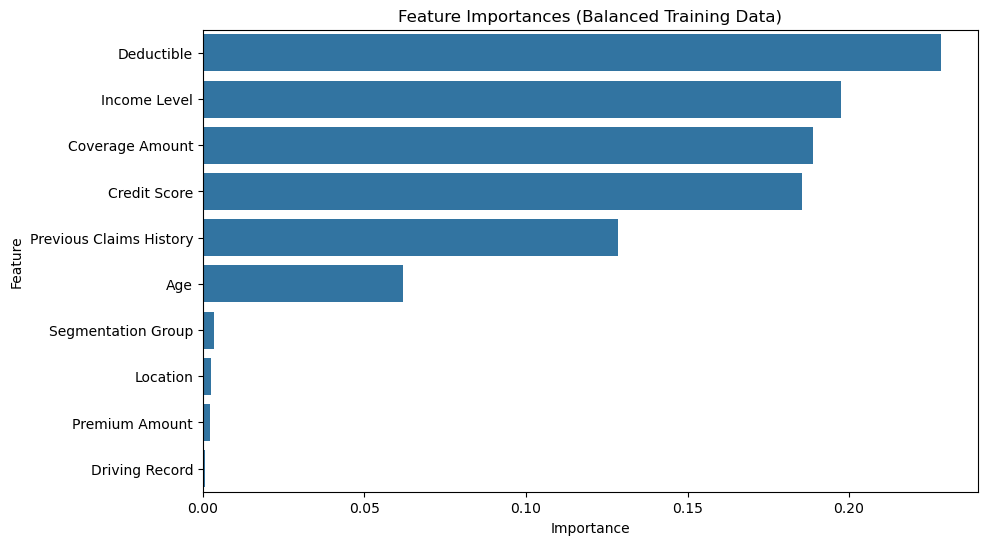


Model and scaler saved successfully!
Balanced Data Shape for Clustering: (6934, 74)
Balanced Class Distribution: Risk_Profile_New
2    0.689068
3    0.288434
1    0.022498
Name: proportion, dtype: float64


ValueError: Length of values (6934) does not match length of index (53503)

In [161]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib

# Load the data
data_bal = pd.read_csv('balanced_data.csv')
print("Balanced Data Shape:", data_bal.shape)

# Drop old Risk_Profile if it exists
data_bal = data_bal.drop(columns=['Risk_Profile'], errors='ignore')

# Select features and target
selected_features = ['Age', 'Income Level', 'Coverage Amount', 'Premium Amount', 
                     'Deductible', 'Credit Score', 'Previous Claims History', 
                     'Driving Record', 'Segmentation Group', 'Location']
X_bal = data_bal[selected_features]
y_bal = data_bal['Risk_Profile_New']

# Identify numerical and categorical columns
numerical_cols = ['Age', 'Income Level', 'Coverage Amount', 'Premium Amount', 
                  'Deductible', 'Credit Score', 'Previous Claims History', 'Location']
categorical_cols = ['Driving Record', 'Segmentation Group']  # Already encoded

# Check class distribution
print("\nClass Distribution (Before Processing):")
print(y_bal.value_counts(normalize=True))

# Split: Train (50%), Validation (25%), Test (25%)
X_train, X_temp, y_train, y_temp = train_test_split(X_bal, y_bal, train_size=0.5, random_state=42, stratify=y_bal)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Scale only numerical columns
scaler = MinMaxScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_val[numerical_cols] = scaler.transform(X_val[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Apply SMOTE only to training set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print("\nBalanced Class Distribution (Training Set After SMOTE):")
print(pd.Series(y_train_res).value_counts(normalize=True))

# Train Random Forest with current regularization
rf_model = RandomForestClassifier(
    n_estimators=76,
    max_depth=None,
    min_samples_split=57,
    min_samples_leaf=6,
    random_state=42
)
rf_model.fit(X_train_res, y_train_res)

# Get probability predictions and apply 0.4 threshold for class 3
threshold = 0.4  # Lowered to favor low risk
y_prob_val = rf_model.predict_proba(X_val)
y_pred_val = np.where(y_prob_val[:, 2] > threshold, 3, 
                      np.where(y_prob_val[:, 1] > y_prob_val[:, 0], 2, 1))
y_prob_test = rf_model.predict_proba(X_test)
y_pred_test = np.where(y_prob_test[:, 2] > threshold, 3, 
                       np.where(y_prob_test[:, 1] > y_prob_test[:, 0], 2, 1))

# Evaluate on validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
print(f"\nAccuracy on Validation Set (Threshold {threshold}):", accuracy_val)
print(f"\nClassification Report (Validation Set, Threshold {threshold}):")
print(classification_report(y_val, y_pred_val))
print(f"\nConfusion Matrix (Validation Set, Threshold {threshold}):")
print(confusion_matrix(y_val, y_pred_val))

# Evaluate on test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"\nAccuracy on Test Set (Threshold {threshold}):", accuracy_test)
print(f"\nClassification Report (Test Set, Threshold {threshold}):")
print(classification_report(y_test, y_pred_test))
print(f"\nConfusion Matrix (Test Set, Threshold {threshold}):")
print(confusion_matrix(y_test, y_pred_test))

# Cross-validation to check generalization
cv_scores = cross_val_score(rf_model, X_train_res, y_train_res, cv=5)
print("\nCross-Validation Scores (Training Data):", cv_scores)
print("Average CV Score (Training Data):", cv_scores.mean())
print("CV Score Std (Training Data):", cv_scores.std())

# Feature Importance
feature_importance = pd.DataFrame({'Feature': X_bal.columns, 'Importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importances (Balanced Training Data)')
plt.show()

# Save the trained Random Forest model and scaler
joblib.dump(rf_model, 'random_forest_risk_model.joblib')
joblib.dump(scaler, 'scaler.joblib')
print("\nModel and scaler saved successfully!")

# Prepare data for clustering (use selected_features directly)
clustering_features = selected_features
X_clustering = data_bal[clustering_features].copy()
numerical_cols_clustering = numerical_cols
scaler_clustering = StandardScaler()
X_clustering_scaled = scaler_clustering.fit_transform(X_clustering[numerical_cols_clustering])

# Balance data by subsampling high risk
high_risk = data_bal[data_bal['Risk_Profile_New'] == 3].sample(n=2000, random_state=42)
medium_risk = data_bal[data_bal['Risk_Profile_New'] == 2]
low_risk = data_bal[data_bal['Risk_Profile_New'] == 1]
balanced_data = pd.concat([high_risk, medium_risk, low_risk])
print("Balanced Data Shape for Clustering:", balanced_data.shape)
print("Balanced Class Distribution:", balanced_data['Risk_Profile_New'].value_counts(normalize=True))

# Run K-means clustering with 10 clusters
kmeans = KMeans(n_clusters=10, random_state=42)
data_bal['Cluster'] = kmeans.fit_predict(X_clustering_scaled[balanced_data.index])  # Fit on balanced subset

# Save K-means model, scaler, and updated dataset
joblib.dump(kmeans, 'kmeans_model.joblib')
joblib.dump(scaler_clustering, 'scaler_clustering.joblib')
data_bal.to_csv('data_with_new_clusters.csv', index=False)
print("K-means model, scaler, and updated dataset saved successfully!")

# Bar Graph with Marketing Insights and New Input
def plot_risk_distribution_with_input(data_bal, new_input, rf_model, scaler_rf, rf_features, kmeans_model, scaler_clustering):
    # Calculate risk distribution by cluster
    cluster_risk_dist = pd.crosstab(data_bal['Cluster'], data_bal['Risk_Profile_New'], normalize='index')
    cluster_risk_dist.columns = ['Low Risk', 'Medium Risk', 'High Risk']
    colors = ['grey', 'orange', 'red']

    # Predict risk for new input with 0.4 threshold
    new_input_scaled = new_input.copy()
    numerical_cols_rf = ['Age', 'Income Level', 'Coverage Amount', 'Premium Amount', 
                         'Deductible', 'Credit Score', 'Previous Claims History', 'Location']
    new_input_for_rf = pd.DataFrame(columns=rf_features)
    for col in rf_features:
        if col in new_input.columns:
            new_input_for_rf[col] = new_input[col]
        else:
            new_input_for_rf[col] = 0
    new_input_scaled[numerical_cols_rf] = scaler_rf.transform(new_input_for_rf[numerical_cols_rf])
    y_prob = rf_model.predict_proba(new_input_scaled[rf_features])
    threshold = 0.4
    pred = np.where(y_prob[:, 2] > threshold, 3, np.where(y_prob[:, 1] > y_prob[:, 0], 2, 1))[0]
    pred_prob = y_prob[0]
    print(f"\nPredicted Risk for New Input: {pred} (Probability: {pred_prob[pred-1]:.2f})")

    # Predict cluster for new input using K-means
    new_input_clustering = new_input.copy()
    new_input_clustering_full = pd.DataFrame(columns=clustering_features)
    for col in clustering_features:
        if col in new_input_clustering.columns:
            new_input_clustering_full[col] = new_input_clustering[col]
        else:
            new_input_clustering_full[col] = 0
    new_input_clustering_scaled = scaler_clustering.transform(new_input_clustering_full[numerical_cols_clustering])
    current_cluster = kmeans_model.predict(new_input_clustering_scaled)[0]

    # Create bar graph
    fig, ax = plt.subplots(figsize=(14, 10))
    cluster_risk_dist.plot(kind='bar', stacked=True, color=colors, ax=ax, edgecolor='white')
    ax.set_title('Risk Distribution by Cluster with New Input', fontsize=14)
    ax.set_xlabel('Cluster', fontsize=12)
    ax.set_ylabel('Proportion', fontsize=12)
    ax.legend(title='Risk Profile', fontsize=10)

    # Add star for new input
    current_risk_prop = cluster_risk_dist.loc[current_cluster, 'Low Risk' if pred == 1 else 'Medium Risk' if pred == 2 else 'High Risk']
    star_y = sum(cluster_risk_dist.loc[current_cluster].iloc[:pred-1]) + current_risk_prop / 2
    ax.plot(current_cluster, star_y, marker='*', color='black', markersize=15, label='New Input')

    # Add marketing insight annotation
    ax.annotate('50-year-olds with high driving risk (e.g., DUI) often Medium/High Risk\nTarget with safety plans or premium coverage',
                xy=(2, 0.5), xytext=(0, 0.7),
                arrowprops=dict(facecolor='black', shrink=0.05),
                bbox=dict(boxstyle="round,pad=0.5", fc="lightgrey", alpha=0.5),
                fontsize=10, ha='left')

    plt.xticks(range(len(cluster_risk_dist.index)), [f'C{i}' for i in range(len(cluster_risk_dist.index))], rotation=45, ha='right', fontsize=10)
    plt.tight_layout()
    plt.show()

# Example low-risk input (refined)
new_input = pd.DataFrame({
    'Age': [50],                  # Older, potentially stable
    'Income Level': [80000],      # Moderate income
    'Coverage Amount': [150000],  # Moderate coverage
    'Premium Amount': [1000],     # Reasonable premium
    'Deductible': [2000],         # High deductible, low-risk trait
    'Credit Score': [850],        # Max credit score
    'Previous Claims History': [0],  # No claims
    'Driving Record': [0],        # Clean record
    'Segmentation Group': [1],    # Middle segment
    'Location': [0]               # Arbitrary location
}, index=[0])

# Load K-means model and scaler
kmeans_model = joblib.load('kmeans_model.joblib')
scaler_clustering = joblib.load('scaler_clustering.joblib')

plot_risk_distribution_with_input(data_bal, new_input, rf_model, scaler_rf, rf_features, kmeans_model, scaler_clustering)

# Optional: Save the plot
# plt.savefig('risk_distribution_by_cluster.png', bbox_inches='tight')

Balanced Data Shape: (53503, 74)
Balanced Data Shape for Clustering: (9934, 75)
Balanced Class Distribution: Risk_Profile_New
3    0.503322
2    0.480974
1    0.015704
Name: proportion, dtype: float64


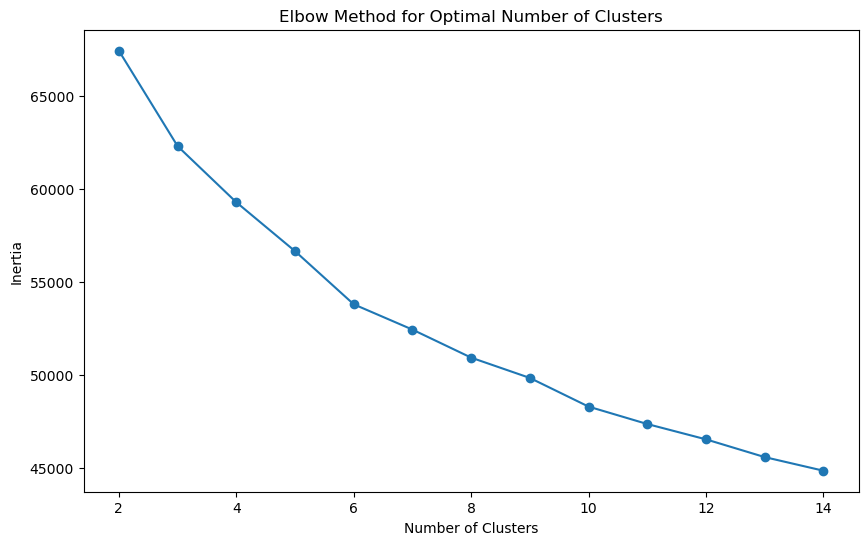

K-means model, scaler, and updated dataset saved successfully!

Predicted Risk for New Input: 2 (Probability: 0.72)


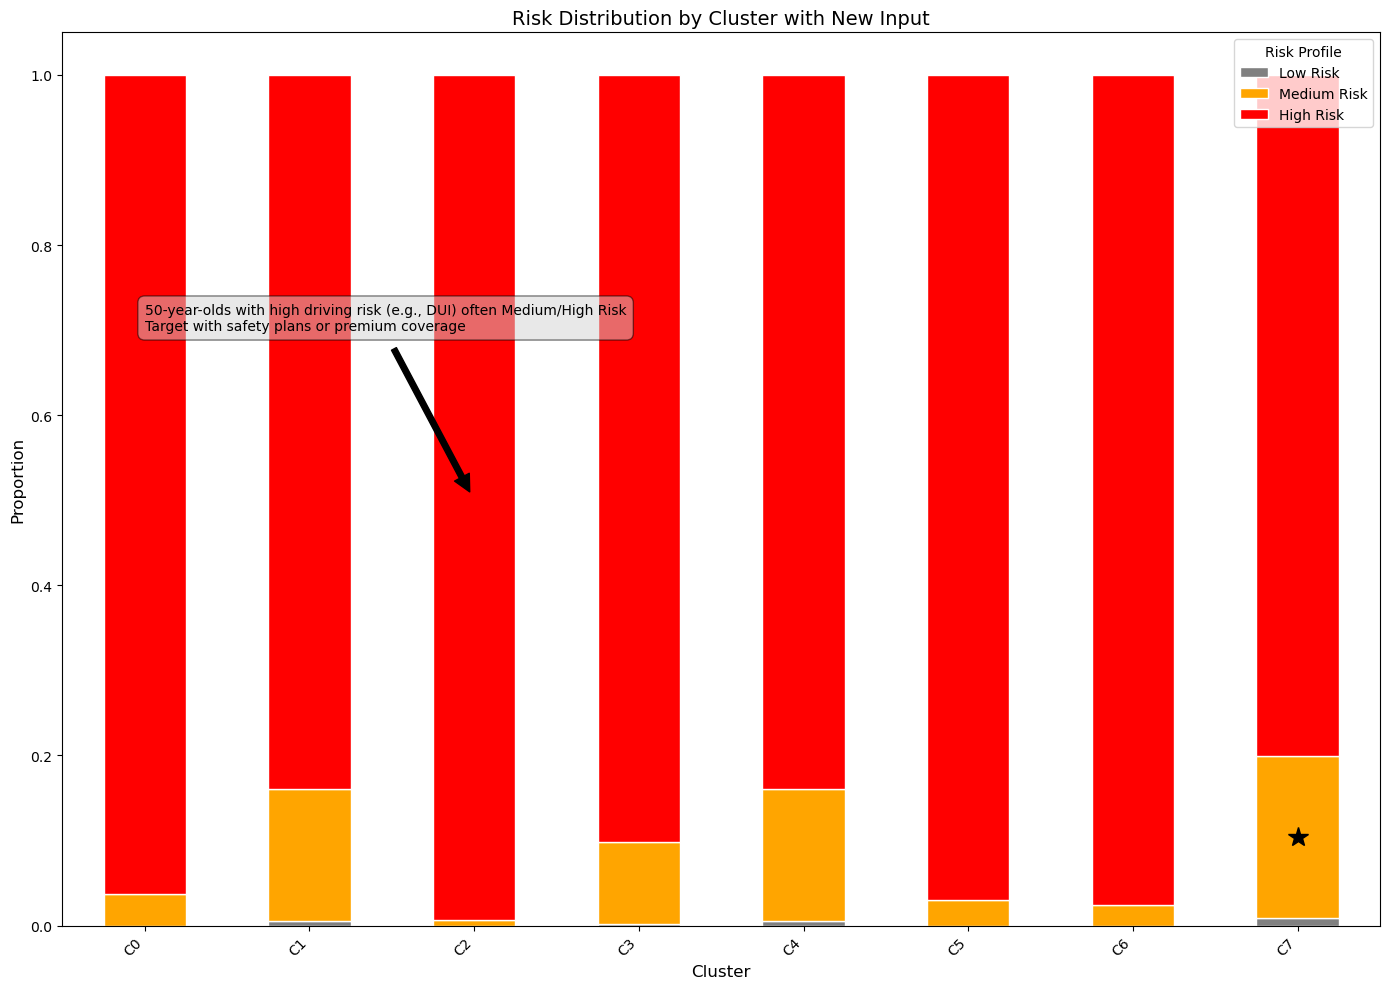

In [159]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib

# Load the data
data_bal = pd.read_csv('balanced_data.csv')
print("Balanced Data Shape:", data_bal.shape)

# Select features (matching your Random Forest selected_features)
selected_features = ['Age', 'Income Level', 'Coverage Amount', 'Premium Amount', 
                     'Deductible', 'Credit Score', 'Previous Claims History', 
                     'Driving Record', 'Segmentation Group', 'Location']

# Feature engineering: Calculate enhanced Risk_Score with Age and Income
data_bal['Risk_Score'] = (data_bal['Previous Claims History'] * 0.3 +  # Slightly reduced
                          data_bal['Driving Record'] * 0.3 +           # Slightly reduced
                          (850 - data_bal['Credit Score']) / 550 * 0.2 +  # Reduced
                          (data_bal['Previous Claims History'] * data_bal['Driving Record']) * 0.1 +  # Interaction
                          np.where(data_bal['Age'] > 40, -0.1, 0.1) +    # Reward older age
                          np.where(data_bal['Income Level'] > 80000, -0.1, 0.1))  # Reward higher income

# Prepare data for clustering
clustering_features = selected_features + ['Risk_Score']
X_clustering = data_bal[clustering_features].copy()
numerical_cols_clustering = ['Age', 'Income Level', 'Coverage Amount', 'Premium Amount', 
                             'Deductible', 'Credit Score', 'Previous Claims History', 'Location', 'Risk_Score']
scaler_clustering = StandardScaler()
X_clustering_scaled = scaler_clustering.fit_transform(X_clustering[numerical_cols_clustering])

# Balance data by subsampling high risk
high_risk = data_bal[data_bal['Risk_Profile_New'] == 3].sample(n=5000, random_state=42)
medium_risk = data_bal[data_bal['Risk_Profile_New'] == 2]
low_risk = data_bal[data_bal['Risk_Profile_New'] == 1]
balanced_data = pd.concat([high_risk, medium_risk, low_risk])
print("Balanced Data Shape for Clustering:", balanced_data.shape)
print("Balanced Class Distribution:", balanced_data['Risk_Profile_New'].value_counts(normalize=True))

# Run K-means clustering with elbow method to find optimal clusters
inertia = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_clustering_scaled[balanced_data.index])  # Fit on balanced subset
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(range(2, 15), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Choose optimal k (e.g., 8 based on elbow, adjust if needed)
optimal_k = 8  # Adjust based on elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data_bal['Cluster'] = kmeans.fit_predict(X_clustering_scaled)

# Save K-means model, scaler, and updated dataset
joblib.dump(kmeans, 'kmeans_model.joblib')
joblib.dump(scaler_clustering, 'scaler_clustering.joblib')
data_bal.to_csv('data_with_new_clusters.csv', index=False)
print("K-means model, scaler, and updated dataset saved successfully!")

# Load pre-trained Random Forest model and scaler
rf_model = joblib.load('random_forest_risk_model.joblib')
scaler_rf = joblib.load('scaler.joblib')
rf_features = selected_features

# Bar Graph with Marketing Insights and New Input
def plot_risk_distribution_with_input(data_bal, new_input, rf_model, scaler_rf, rf_features, kmeans_model, scaler_clustering):
    # Calculate risk distribution by cluster
    cluster_risk_dist = pd.crosstab(data_bal['Cluster'], data_bal['Risk_Profile_New'], normalize='index')
    cluster_risk_dist.columns = ['Low Risk', 'Medium Risk', 'High Risk']
    colors = ['grey', 'orange', 'red']

    # Predict risk for new input
    new_input_scaled = new_input.copy()
    numerical_cols_rf = ['Age', 'Income Level', 'Coverage Amount', 'Premium Amount', 
                         'Deductible', 'Credit Score', 'Previous Claims History', 'Location']
    new_input_for_rf = pd.DataFrame(columns=rf_features)
    for col in rf_features:
        if col in new_input.columns:
            new_input_for_rf[col] = new_input[col]
        else:
            new_input_for_rf[col] = 0
    new_input_scaled[numerical_cols_rf] = scaler_rf.transform(new_input_for_rf[numerical_cols_rf])
    pred = rf_model.predict(new_input_scaled[rf_features])
    pred_prob = rf_model.predict_proba(new_input_scaled[rf_features])
    print(f"\nPredicted Risk for New Input: {pred[0]} (Probability: {pred_prob[0][pred[0]-1]:.2f})")

    # Predict cluster for new input using K-means
    new_input_clustering = new_input.copy()
    risk_score = (new_input['Previous Claims History'].iloc[0] * 0.3 + 
                  new_input['Driving Record'].iloc[0] * 0.3 + 
                  (850 - new_input['Credit Score'].iloc[0]) / 550 * 0.2 + 
                  (new_input['Previous Claims History'].iloc[0] * new_input['Driving Record'].iloc[0]) * 0.1 + 
                  (np.where(new_input['Age'].iloc[0] > 40, -0.1, 0.1)) + 
                  (np.where(new_input['Income Level'].iloc[0] > 80000, -0.1, 0.1)))
    new_input_clustering['Risk_Score'] = risk_score
    new_input_clustering_full = pd.DataFrame(columns=clustering_features)
    for col in clustering_features:
        if col in new_input_clustering.columns:
            new_input_clustering_full[col] = new_input_clustering[col]
        else:
            new_input_clustering_full[col] = 0
    new_input_clustering_scaled = scaler_clustering.transform(new_input_clustering_full[numerical_cols_clustering])
    current_cluster = kmeans_model.predict(new_input_clustering_scaled)[0]

    # Create bar graph
    fig, ax = plt.subplots(figsize=(14, 10))
    cluster_risk_dist.plot(kind='bar', stacked=True, color=colors, ax=ax, edgecolor='white')
    ax.set_title('Risk Distribution by Cluster with New Input', fontsize=14)
    ax.set_xlabel('Cluster', fontsize=12)
    ax.set_ylabel('Proportion', fontsize=12)
    ax.legend(title='Risk Profile', fontsize=10)

    # Add star for new input
    current_risk_prop = cluster_risk_dist.loc[current_cluster, 'Low Risk' if pred[0] == 1 else 'Medium Risk' if pred[0] == 2 else 'High Risk']
    star_y = sum(cluster_risk_dist.loc[current_cluster].iloc[:pred[0]-1]) + current_risk_prop / 2
    ax.plot(current_cluster, star_y, marker='*', color='black', markersize=15, label='New Input')

    # Add marketing insight annotation
    ax.annotate('50-year-olds with high driving risk (e.g., DUI) often Medium/High Risk\nTarget with safety plans or premium coverage',
                xy=(2, 0.5), xytext=(0, 0.7),
                arrowprops=dict(facecolor='black', shrink=0.05),
                bbox=dict(boxstyle="round,pad=0.5", fc="lightgrey", alpha=0.5),
                fontsize=10, ha='left')

    plt.xticks(range(len(cluster_risk_dist.index)), [f'C{i}' for i in range(len(cluster_risk_dist.index))], rotation=45, ha='right', fontsize=10)
    plt.tight_layout()
    plt.show()

# Example low-risk input (refined)
new_input = pd.DataFrame({
    'Age': [50],                  # Older, potentially stable
    'Income Level': [80000],      # Moderate income
    'Coverage Amount': [150000],  # Moderate coverage
    'Premium Amount': [1000],     # Reasonable premium
    'Deductible': [2000],         # High deductible, low-risk trait
    'Credit Score': [850],        # Max credit score
    'Previous Claims History': [0],  # No claims
    'Driving Record': [0],        # Clean record
    'Segmentation Group': [1],    # Middle segment
    'Location': [0]               # Arbitrary location
}, index=[0])

# Load K-means model and scaler
kmeans_model = joblib.load('kmeans_model.joblib')
scaler_clustering = joblib.load('scaler_clustering.joblib')

plot_risk_distribution_with_input(data_bal, new_input, rf_model, scaler_rf, rf_features, kmeans_model, scaler_clustering)

# Optional: Save the plot
# plt.savefig('risk_distribution_by_cluster.png', bbox_inches='tight')

Data shape: (145707, 74)
Initial missing values per column:
 Age                              0
Gender                           0
Marital Status                   0
Occupation                       0
Income Level                     0
                                ..
Financial_Risk_Score             0
Policy_Risk_Ratio                0
Education_Segment_Interaction    0
Engagement_Score                 0
Risk_Profile_New                 0
Length: 74, dtype: int64
Previous Claims History dtype: int64
Previous Claims History unique values: [3 2 1 0]
Driving Record dtype: int64
Driving Record unique values: [4 0 3 2 1]
Credit Score dtype: int64
Credit Score unique values: [728 792 719 639 720 811 836 755 797 626 603 619 646 656 678 523 654 653
 704 724 799 738 548 750 832 602 816 768 668 682 766 828 714 549 723 550
 562 804 712 611 772 539 826 634 711 730 721 569 579 581 642 519 570 807
 544 593 625 649 641 722 775 515 683 692 618 623 652 757 659 657 568 726
 662 620 635 547 794 605 59

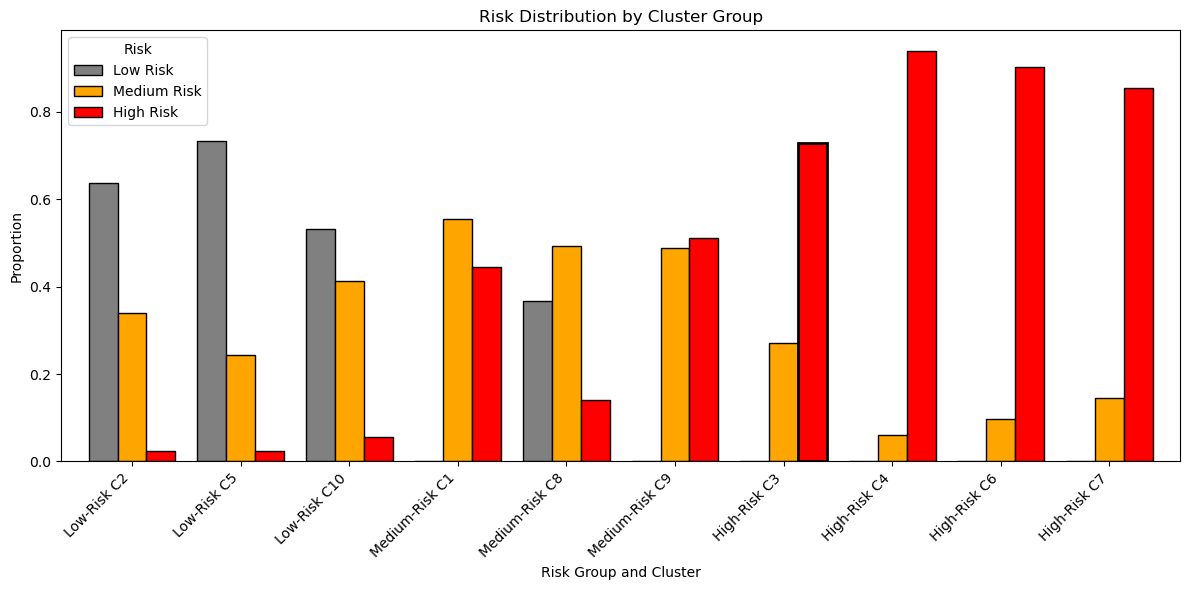

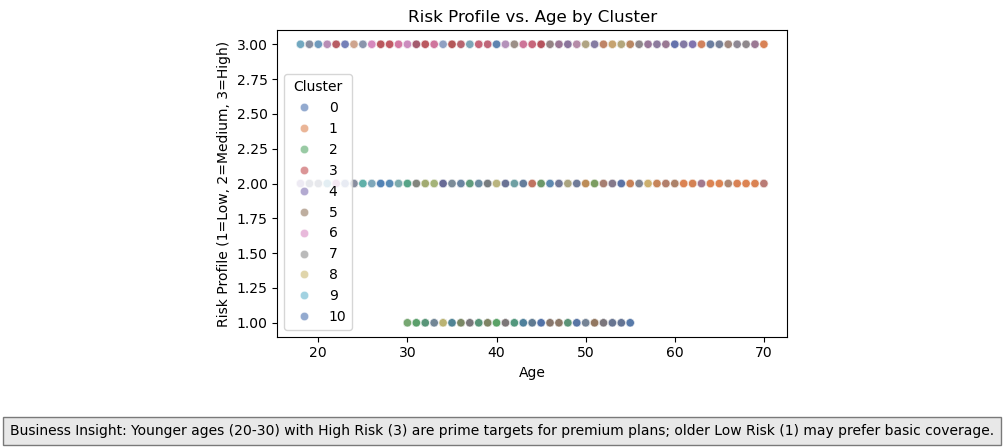

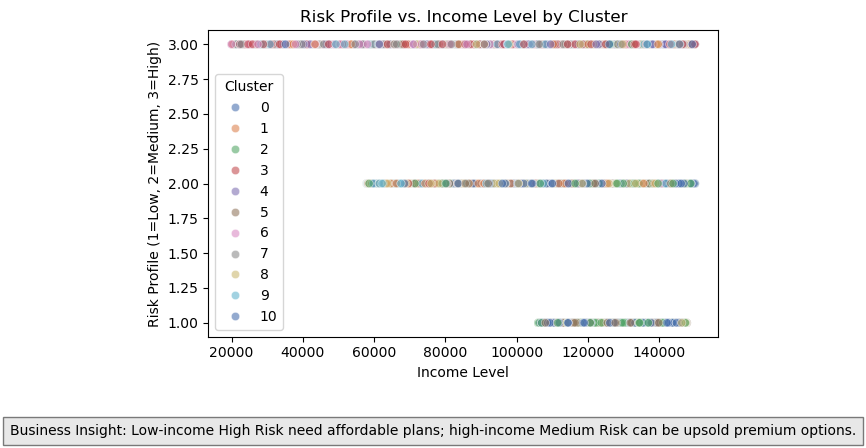

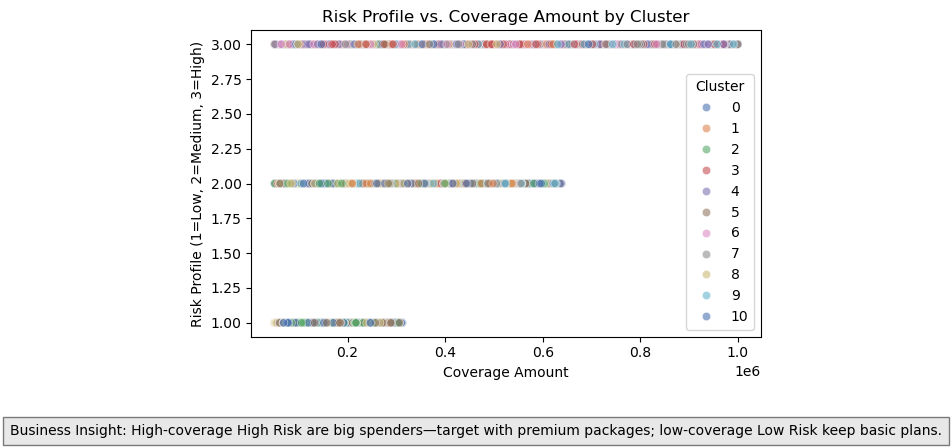

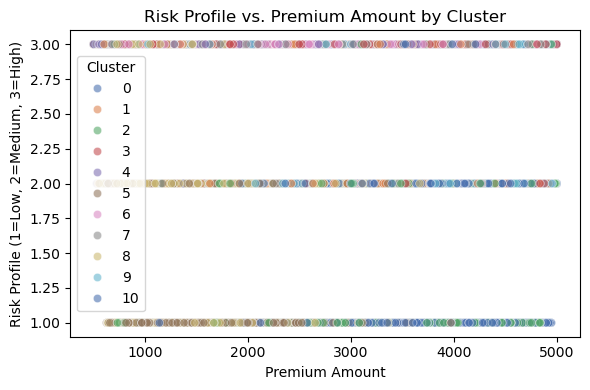

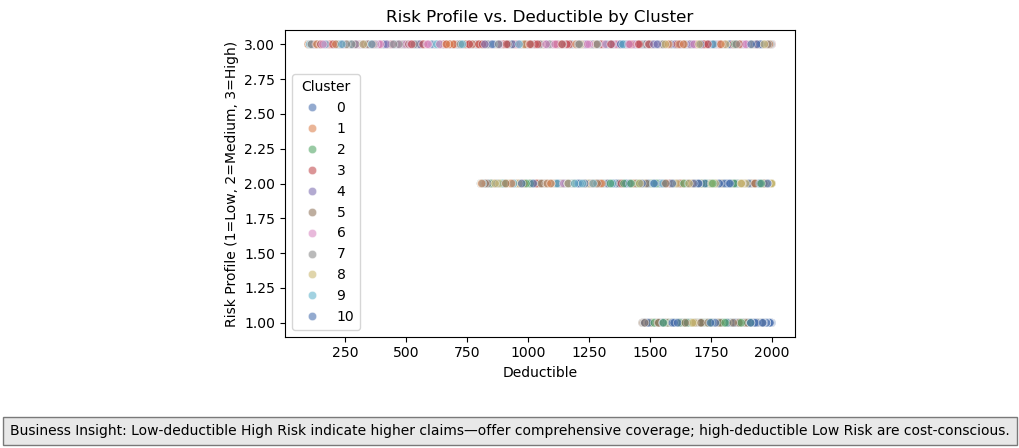

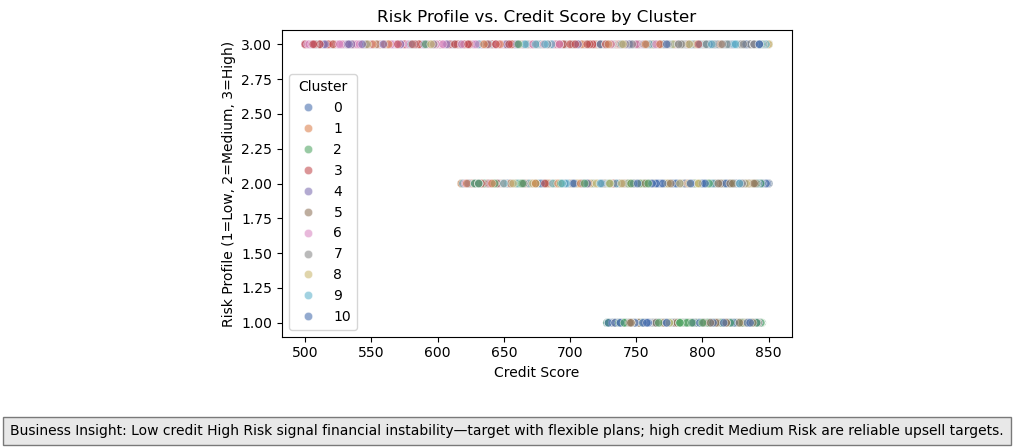

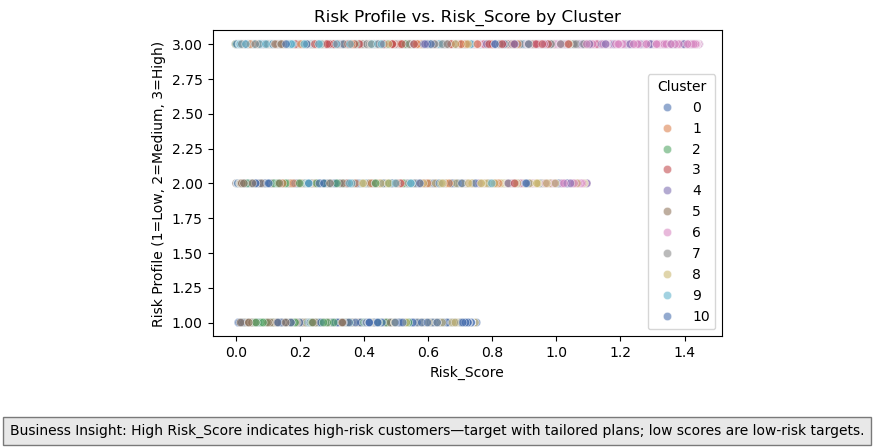

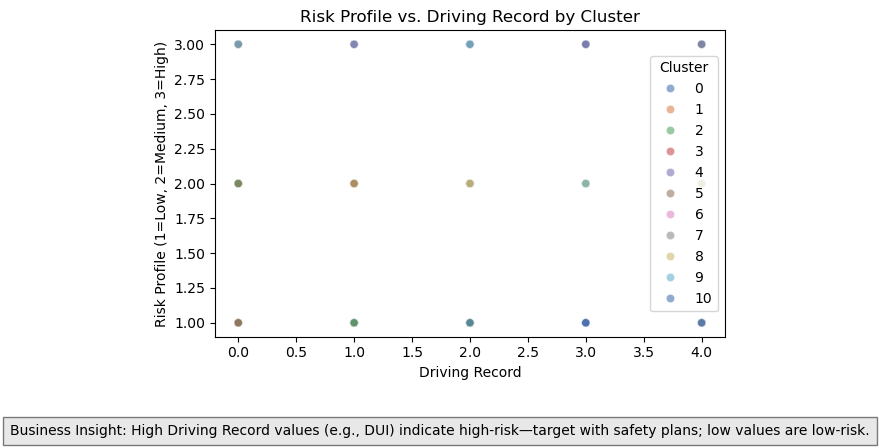

Models and data saved successfully!


In [80]:
# import pandas as pd
# import numpy as np
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler
# import joblib
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Load the dataset
# data_bal = pd.read_csv('balanced_data.csv')
# print("Data shape:", data_bal.shape)
# data_bal = data_bal.drop(columns=['Risk_Profile'], errors='ignore')

# # Check for initial missing values
# print("Initial missing values per column:\n", data_bal.isnull().sum())

# # Debug each component
# print("Previous Claims History dtype:", data_bal['Previous Claims History'].dtype)
# print("Previous Claims History unique values:", data_bal['Previous Claims History'].unique())
# print("Driving Record dtype:", data_bal['Driving Record'].dtype)
# print("Driving Record unique values:", data_bal['Driving Record'].unique())
# print("Credit Score dtype:", data_bal['Credit Score'].dtype)
# print("Credit Score unique values:", data_bal['Credit Score'].unique())

# # Feature engineering: Create a composite risk score
# claims_component = data_bal['Previous Claims History'] * 0.2
# driving_component = data_bal['Driving Record'] * 0.1
# credit_component = (850 - data_bal['Credit Score']) / 550 * 0.7
# print("Claims component NaN count:", claims_component.isna().sum())
# print("Driving component NaN count:", driving_component.isna().sum())
# print("Credit component NaN count:", credit_component.isna().sum())

# data_bal['Risk_Score'] = claims_component + driving_component + credit_component
# print("Risk_Score NaN count:", data_bal['Risk_Score'].isna().sum())
# print("Risk_Score unique values:", data_bal['Risk_Score'].unique())

# # Define features for clustering
# hybrid_features = ['Age', 'Income Level', 'Coverage Amount', 'Premium Amount', 
#                    'Deductible', 'Credit Score', 'Risk_Score', 'Driving Record', 
#                    'Segmentation Group', 'Location']
# X_hybrid = data_bal[hybrid_features]

# # Scale the data
# scaler_hybrid = StandardScaler()
# X_hybrid_scaled = scaler_hybrid.fit_transform(X_hybrid)

# # Fit KMeans with 11 clusters
# kmeans_hybrid = KMeans(n_clusters=11, random_state=42)
# kmeans_hybrid.fit(X_hybrid_scaled)
# data_bal['Cluster'] = kmeans_hybrid.labels_

# # Analyze
# cluster_risk = pd.crosstab(data_bal['Cluster'], data_bal['Risk_Profile_New'], normalize='index')
# print("Cluster Risk Distribution:\n", cluster_risk)
# cluster_summary = data_bal.groupby('Cluster')[hybrid_features].mean().round(2)
# print("\nCluster Feature Summary:\n", cluster_summary)

# # Define cluster groups
# low_risk_clusters = [2, 5, 10]
# medium_risk_clusters = [1, 8, 9]
# high_risk_clusters = [3, 4, 6, 7]

# # Enhanced cluster naming with group context
# cluster_names = {}
# for i in range(11):
#     risk_dist = cluster_risk.loc[i]
#     dominant_risk = risk_dist.idxmax()
#     age = cluster_summary.loc[i, 'Age']
#     income = cluster_summary.loc[i, 'Income Level']
#     coverage = cluster_summary.loc[i, 'Coverage Amount']
#     risk_score = cluster_summary.loc[i, 'Risk_Score']
#     risk_map = {1: 'Low', 2: 'Medium', 3: 'High'}
#     income_level = 'High' if income > 100000 else 'Low' if income < 90000 else 'Medium'
#     if i in low_risk_clusters:
#         cluster_names[i] = f"Low-Risk {income_level}-Income (Age {age}, Income ${income:.2f}, Coverage ${coverage:.2f}, Risk Score {risk_score:.2f})"
#     elif i in medium_risk_clusters:
#         cluster_names[i] = f"Medium-Risk {income_level}-Income (Age {age}, Income ${income:.2f}, Coverage ${coverage:.2f}, Risk Score {risk_score:.2f})"
#     elif i in high_risk_clusters:
#         cluster_names[i] = f"High-Risk {income_level}-Income (Age {age}, Income ${income:.2f}, Coverage ${coverage:.2f}, Risk Score {risk_score:.2f})"
# print("\nCluster Names:\n", cluster_names)

# # Test a sample input
# sample_input = pd.DataFrame({
#     'Age': [30],
#     'Income Level': [80000],
#     'Coverage Amount': [500000],
#     'Premium Amount': [3000],
#     'Deductible': [1000],
#     'Credit Score': [600],
#     'Previous Claims History': [2],
#     'Driving Record': [4],
#     'Segmentation Group': [2],
#     'Location': [1]
# }, index=[0])

# # Calculate Risk_Score for the sample
# sample_input['Risk_Score'] = (sample_input['Previous Claims History'] * 0.2 + 
#                              sample_input['Driving Record'] * 0.1 + 
#                              (850 - sample_input['Credit Score']) / 550 * 0.7)

# # Scale the sample input
# sample_scaled = scaler_hybrid.transform(sample_input[hybrid_features])

# # Predict the cluster
# sample_cluster = kmeans_hybrid.predict(sample_scaled)[0]
# print("\nSample Input Cluster Assignment:", sample_cluster)
# print("Sample Input Details:", sample_input)
# print("Assigned Cluster Name:", cluster_names[sample_cluster])

# # Bar graph with grouped clusters
# fig, ax = plt.subplots(figsize=(12, 6))

# # Prepare data for grouped bar plot
# clusters = low_risk_clusters + medium_risk_clusters + high_risk_clusters
# risk_groups = ['Low-Risk'] * len(low_risk_clusters) + ['Medium-Risk'] * len(medium_risk_clusters) + ['High-Risk'] * len(high_risk_clusters)
# cluster_risk_dist = cluster_risk.loc[clusters]

# # Plot grouped bars
# cluster_risk_dist.plot(kind='bar', ax=ax, width=0.8, color=['grey', 'orange', 'red'], 
#                        edgecolor='black', position=0.5)
# ax.set_title('Risk Distribution by Cluster Group')
# ax.set_xlabel('Risk Group and Cluster')
# ax.set_ylabel('Proportion')
# ax.legend(title='Risk', labels=['Low Risk', 'Medium Risk', 'High Risk'])

# # Customize x-axis labels
# ax.set_xticks(range(len(clusters)))
# ax.set_xticklabels([f"{group} C{cluster}" for group, cluster in zip(risk_groups, clusters)], rotation=45, ha='right')

# # Highlight the sample input's cluster
# sample_group = 'High-Risk' if sample_cluster in high_risk_clusters else 'Medium-Risk' if sample_cluster in medium_risk_clusters else 'Low-Risk'
# sample_idx = clusters.index(sample_cluster)
# ax.patches[sample_idx * 3 + (cluster_risk.loc[sample_cluster].idxmax() - 1)].set_edgecolor('black')  # Corrected to cluster_risk
# ax.patches[sample_idx * 3 + (cluster_risk.loc[sample_cluster].idxmax() - 1)].set_linewidth(2)

# # Adjust layout
# plt.tight_layout()
# plt.show()

# # Graphs with Business Logic
# for feature in hybrid_features[:-2]:  # Exclude Location for x-axis
#     plt.figure(figsize=(6, 4))
#     sns.scatterplot(data=data_bal, x=feature, y='Risk_Profile_New', hue='Cluster', palette='deep', alpha=0.6)
#     plt.title(f'Risk Profile vs. {feature} by Cluster')
#     plt.ylabel('Risk Profile (1=Low, 2=Medium, 3=High)')
#     plt.legend(title='Cluster')
    
#     # Business logic notes
#     if feature == 'Age':
#         plt.figtext(0.5, -0.1, "Business Insight: Younger ages (20-30) with High Risk (3) are prime targets for premium plans; older Low Risk (1) may prefer basic coverage.", 
#                     ha="center", fontsize=10, bbox={"facecolor":"lightgrey", "alpha":0.5, "pad":5})
#     elif feature == 'Income Level':
#         plt.figtext(0.5, -0.1, "Business Insight: Low-income High Risk need affordable plans; high-income Medium Risk can be upsold premium options.", 
#                     ha="center", fontsize=10, bbox={"facecolor":"lightgrey", "alpha":0.5, "pad":5})
#     elif feature == 'Coverage Amount':
#         plt.figtext(0.5, -0.1, "Business Insight: High-coverage High Risk are big spenders—target with premium packages; low-coverage Low Risk keep basic plans.", 
#                     ha="center", fontsize=10, bbox={"facecolor":"lightgrey", "alpha":0.5, "pad":5})
#     elif feature == 'Deductible':
#         plt.figtext(0.5, -0.1, "Business Insight: Low-deductible High Risk indicate higher claims—offer comprehensive coverage; high-deductible Low Risk are cost-conscious.", 
#                     ha="center", fontsize=10, bbox={"facecolor":"lightgrey", "alpha":0.5, "pad":5})
#     elif feature == 'Credit Score':
#         plt.figtext(0.5, -0.1, "Business Insight: Low credit High Risk signal financial instability—target with flexible plans; high credit Medium Risk are reliable upsell targets.", 
#                     ha="center", fontsize=10, bbox={"facecolor":"lightgrey", "alpha":0.5, "pad":5})
#     elif feature == 'Previous Claims History':
#         plt.figtext(0.5, -0.1, "Business Insight: High claims High Risk need robust coverage; zero claims Low Risk are low-maintenance.", 
#                     ha="center", fontsize=10, bbox={"facecolor":"lightgrey", "alpha":0.5, "pad":5})
#     elif feature == 'Risk_Score':
#         plt.figtext(0.5, -0.1, "Business Insight: High Risk_Score indicates high-risk customers—target with tailored plans; low scores are low-risk targets.", 
#                     ha="center", fontsize=10, bbox={"facecolor":"lightgrey", "alpha":0.5, "pad":5})
#     elif feature == 'Driving Record':
#         plt.figtext(0.5, -0.1, "Business Insight: High Driving Record values (e.g., DUI) indicate high-risk—target with safety plans; low values are low-risk.", 
#                     ha="center", fontsize=10, bbox={"facecolor":"lightgrey", "alpha":0.5, "pad":5})
    
#     plt.tight_layout()
#     plt.show()

# # Save models and data
# joblib.dump(kmeans_hybrid, 'kmeans_hybrid_model.joblib')
# joblib.dump(scaler_hybrid, 'scaler_hybrid.joblib')
# data_bal.to_csv('data_with_hybrid_clusters.csv', index=False)
# print("Models and data saved successfully!")

# BASE MODEL TRAINING (PREMIUM AMOUNT)-RANDOM FOREST REGRESSOR MODEL



In [83]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the balanced data
data_bal = pd.read_csv('balanced_data.csv')
data_bal = data_bal.drop(columns=['Risk_Profile'], errors='ignore')

# Filter for medium and high risk only (for comparison)
medium_high_risk = data_bal[data_bal['Risk_Profile_New'].isin([2, 3])]

# Define risk features and weights
risk_features = ['Previous Claims History', 'Driving Record', 'Credit Score', 'Coverage Amount', 'Age', 'Location', 'Income Level', 'Risk_Profile_New']
rf_importance = [0.038677, 0.043752, 0.157085, 0.227020, 0.132750, 0.198845, 0.190666, 0.011205]
total_importance = sum(rf_importance)
weights = [imp / total_importance for imp in rf_importance]
print("\nAdjusted Weights (based on Random Forest Importance):", dict(zip(risk_features, weights)))

# Set base premium to $2600 (dataset avg rounded)
new_base_premium = 2600  # Fixed at $2600 as the minimum premium
print(f"Base Premium for Low-Risk Customers (fixed): ${new_base_premium:.2f}")

# Normalize risk features
scaler = MinMaxScaler()
scaled_risk = scaler.fit_transform(data_bal[risk_features])

# Calculate Total_Risk_Factor
data_bal['Total_Risk_Factor'] = np.sum(scaled_risk * np.array(weights), axis=1)

# Adjusted scaling factors to reach $5000 from $2600
scaling_factors = {1: 0.0, 2: 0.5, 3: 1.0}  # High risk reaches ~1.92x base ($5000/$2600)
min_premium = 2600  # New minimum
max_premium = 5000  # Current max (increase later as needed)

# Train Random Forest to predict scaling factor
premium_features = ['Age', 'Income Level', 'Coverage Amount', 'Deductible', 
                   'Credit Score', 'Previous Claims History', 'Driving Record', 
                   'Segmentation Group', 'Location', 'Risk_Profile_New']
X_rf = data_bal[premium_features]
y_rf = data_bal['Premium Amount'] / new_base_premium  # Target is multiplier
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_rf, y_train_rf)

# Predict multiplier with Random Forest
data_bal['RF_Multiplier'] = rf_regressor.predict(X_rf)

# Rule-based multiplier with caps
data_bal['Rule_Multiplier'] = np.minimum(1 + (data_bal['Total_Risk_Factor'] * np.array([scaling_factors[r] for r in data_bal['Risk_Profile_New']])), 1.923)  # Cap at $5000/$2600

# Hybrid prediction: Average RF and Rule-Based multipliers
data_bal['Hybrid_Multiplier'] = (data_bal['RF_Multiplier'] + data_bal['Rule_Multiplier']) / 2

# Premium prediction function
def predict_premium(multiplier):
    premium = new_base_premium * multiplier
    return max(min_premium, min(max_premium, premium))

# Apply hybrid prediction
data_bal['Predicted_Premium_Hybrid'] = data_bal['Hybrid_Multiplier'].apply(predict_premium)

# Evaluate Hybrid Model (on medium/high risk)
hybrid_pred = data_bal[data_bal['Risk_Profile_New'].isin([2, 3])]['Predicted_Premium_Hybrid']
actual_premium = data_bal[data_bal['Risk_Profile_New'].isin([2, 3])]['Premium Amount']

hybrid_r2 = r2_score(actual_premium, hybrid_pred)
hybrid_rmse = np.sqrt(mean_squared_error(actual_premium, hybrid_pred))

print("\nHybrid Premium Prediction R^2 Score:", hybrid_r2)
print("Hybrid Premium Prediction RMSE:", hybrid_rmse)

# Compare with Random Forest alone
X_premium = medium_high_risk[premium_features]
y_premium = medium_high_risk['Premium Amount']
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_premium, y_premium, test_size=0.2, random_state=42)

rf_regressor.fit(X_train_p, y_train_p)
y_pred_p = rf_regressor.predict(X_test_p)
print("\nRandom Forest Premium Prediction R^2 Score:", r2_score(y_test_p, y_pred_p))
print("Random Forest Premium Prediction RMSE:", np.sqrt(mean_squared_error(y_test_p, y_pred_p)))

feature_importance_premium = pd.DataFrame({'Feature': premium_features, 'Importance': rf_regressor.feature_importances_})
feature_importance_premium = feature_importance_premium.sort_values(by='Importance', ascending=False)
print("\nRandom Forest Feature Importance for Premium Prediction:")
print(feature_importance_premium)

# Show comparison
print("\nSample Comparison (Actual vs Predicted Premiums for Medium/High Risk):")
comparison = pd.DataFrame({
    'Actual Premium': actual_premium.head(),
    'Hybrid Predicted Premium': hybrid_pred.head()
})
print(comparison)

# Save results
# data_bal.to_csv('data_with_hybrid_premiums_2600_base.csv', index=False)
# print("\nData with hybrid premiums (2600 base) saved successfully!")


Adjusted Weights (based on Random Forest Importance): {'Previous Claims History': 0.038677, 'Driving Record': 0.043752, 'Credit Score': 0.157085, 'Coverage Amount': 0.22702, 'Age': 0.13275, 'Location': 0.198845, 'Income Level': 0.190666, 'Risk_Profile_New': 0.011205}
Base Premium for Low-Risk Customers (fixed): $2600.00

Hybrid Premium Prediction R^2 Score: 0.403090858889681
Hybrid Premium Prediction RMSE: 915.3503843962415

Random Forest Premium Prediction R^2 Score: 0.3163700704339648
Random Forest Premium Prediction RMSE: 978.1696192535798

Random Forest Feature Importance for Premium Prediction:
                   Feature  Importance
2          Coverage Amount    0.187047
8                 Location    0.163833
1             Income Level    0.157094
3               Deductible    0.137901
4             Credit Score    0.129426
0                      Age    0.109376
7       Segmentation Group    0.038175
6           Driving Record    0.036048
5  Previous Claims History    0.031867
9 

# CLASS DISTRIBUTION OF IMPORTANT FEATURES

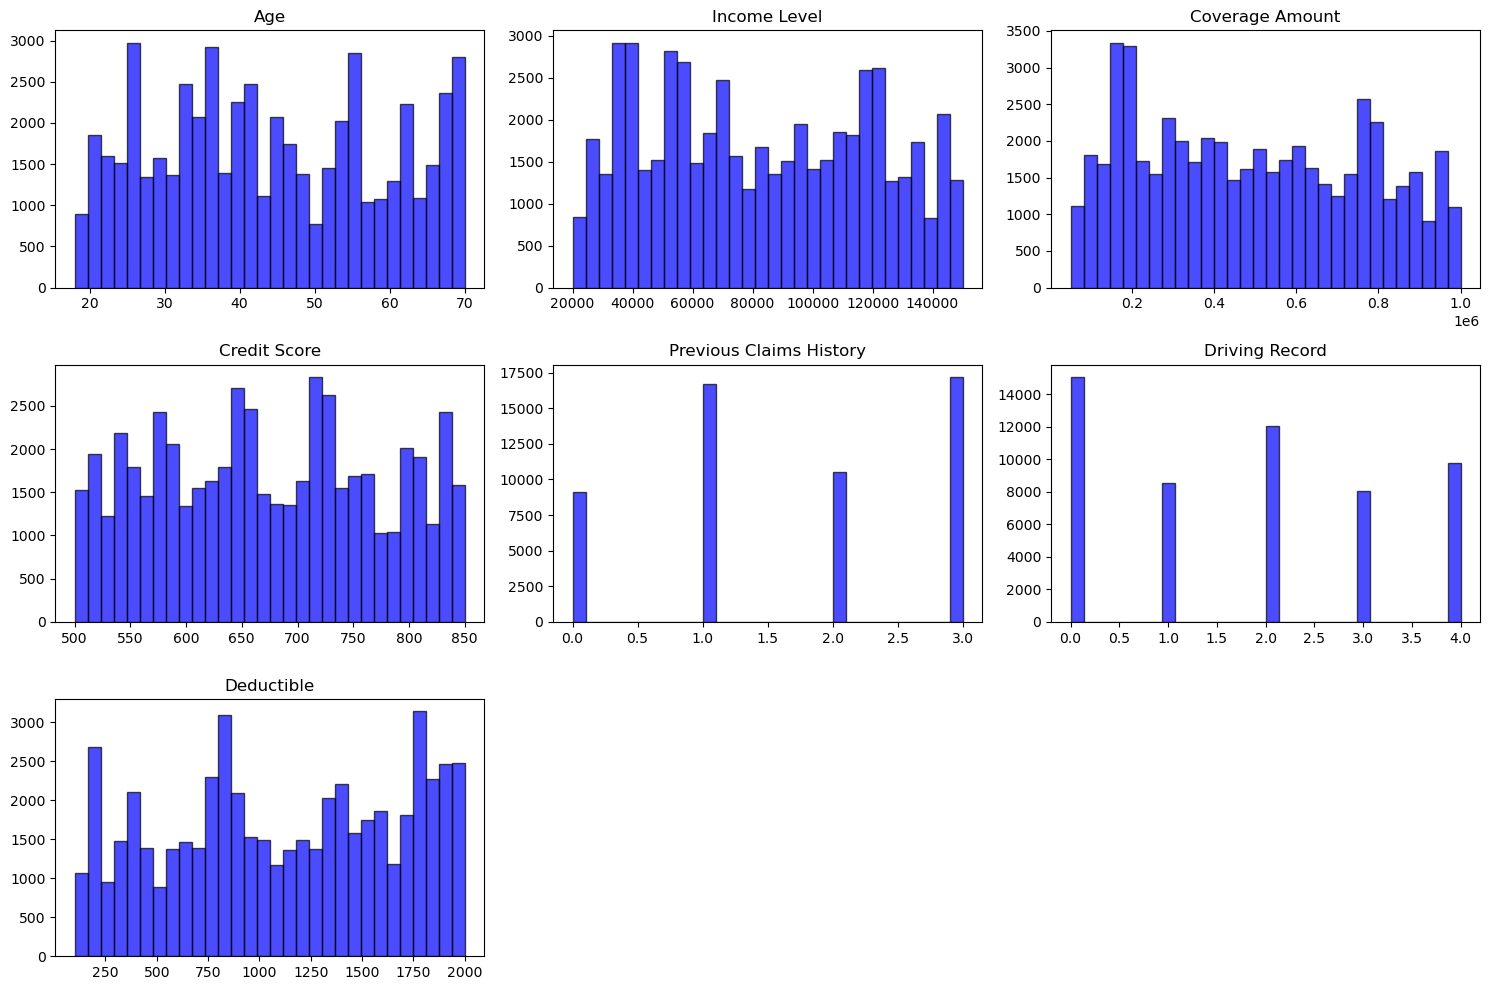

In [85]:
import matplotlib.pyplot as plt

features_to_check = ['Age', 'Income Level', 'Coverage Amount', 'Credit Score', 
                     'Previous Claims History', 'Driving Record', 'Deductible']

plt.figure(figsize=(15,10))
for i, feature in enumerate(features_to_check, 1):
    plt.subplot(3, 3, i)
    plt.hist(data[feature], bins=30, alpha=0.7, color='blue', edgecolor='black')
    plt.title(feature)
plt.tight_layout()
plt.show()


# BIVARIATE ANALYSIS (Risk Profile vs Premium Amount)

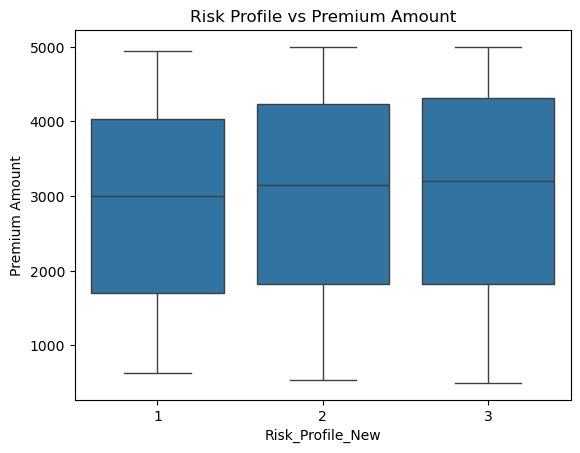

In [87]:
import seaborn as sns

sns.boxplot(x=data['Risk_Profile_New'], y=data['Premium Amount'])
plt.title("Risk Profile vs Premium Amount")
plt.show()


In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Use existing balanced data from classification
data_bal = pd.read_csv('balanced_data.csv')  # Ensure this matches your classification data
data_bal = data_bal.drop(columns=['Risk_Profile'], errors='ignore')

# Feature Engineering
data_bal['Coverage_Claims'] = data_bal['Coverage Amount'] * data_bal['Previous Claims History']
data_bal['Credit_Driving'] = data_bal['Credit Score'] * data_bal['Driving Record']
data_bal['Risk_Behavior_Score'] = data_bal['Driving Record'] + data_bal['Previous Claims History']

# Define features (same as classification, plus engineered)
features = ['Age', 'Income Level', 'Coverage Amount', 'Premium Amount', 
            'Deductible', 'Credit Score', 'Previous Claims History', 
            'Driving Record', 'Segmentation Group', 'Location', 
            'Coverage_Claims', 'Credit_Driving', 'Risk_Behavior_Score']

# Set base premium (mean of low-risk premiums)
base_premium = data_bal[data_bal['Risk_Profile_New'] == 1]['Premium Amount'].mean()
print(f"Base Premium for Low-Risk Customers: ${base_premium:.2f}")

# Filter for medium and high risk
medium_high_risk = data_bal[data_bal['Risk_Profile_New'].isin([2, 3])]

# Calculate adjustment factor (target for regression)
medium_high_risk['Adjustment_Factor'] = medium_high_risk['Premium Amount'] / base_premium

# Select features and target
X_adjust = medium_high_risk[features]
y_adjust = medium_high_risk['Adjustment_Factor']

# Train-Test Split
X_train_adj, X_test_adj, y_train_adj, y_test_adj = train_test_split(X_adjust, y_adjust, test_size=0.2, random_state=42)

# Scaling
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_adj)
X_test_scaled = scaler.transform(X_test_adj)

# Random Forest Regressor for adjustment
rf_adjust = RandomForestRegressor(n_estimators=100, random_state=42)
rf_adjust.fit(X_train_scaled, y_train_adj)

# Predict and evaluate
y_pred_adj = rf_adjust.predict(X_test_scaled)

# Clip adjustment factor (e.g., 1.0 to 2.5)
y_pred_adj = np.clip(y_pred_adj, 1.0, 2.5)  # Reasonable adjustment range

# Performance Metrics
r2_adj = r2_score(y_test_adj, y_pred_adj)
rmse_adj = np.sqrt(mean_squared_error(y_test_adj, y_pred_adj))

print(f"\nAdjustment Factor R^2 Score: {r2_adj}")
print(f"Adjustment Factor RMSE: {rmse_adj}")

# Feature Importance
feature_importance = pd.DataFrame({'Feature': features, 'Importance': rf_adjust.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("\nFeature Importance for Adjustment:")
print(feature_importance.head(10))

# Sample Comparison
comparison_df = pd.DataFrame({
    'Actual Adjustment Factor': y_test_adj[:5],
    'Predicted Adjustment Factor': y_pred_adj[:5]
})
print("\nSample Comparison (Adjustment Factors):")
print(comparison_df)

# Apply adjustment to base premium (example)
sample_base = base_premium
sample_adjusted = sample_base * y_pred_adj[:5]
print("\nSample Adjusted Premiums:")
print(pd.DataFrame({'Base Premium': [sample_base] * 5, 'Adjusted Premium': sample_adjusted}))

# Save adjusted data
data_bal.to_csv('data_with_premium_adjustment.csv', index=False)
print("\nData with premium adjustment saved successfully!")

Base Premium for Low-Risk Customers: $2856.64


C:\Users\Alponent Digital\AppData\Local\Temp\ipykernel_14228\628001081.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medium_high_risk['Adjustment_Factor'] = medium_high_risk['Premium Amount'] / base_premium



Adjustment Factor R^2 Score: 0.5609058582572305
Adjustment Factor RMSE: 0.2744266007583899

Feature Importance for Adjustment:
                Feature    Importance
3        Premium Amount  1.000000e+00
2       Coverage Amount  7.898675e-10
10      Coverage_Claims  6.160269e-10
4            Deductible  4.353875e-10
0                   Age  4.234024e-10
8    Segmentation Group  4.004663e-10
1          Income Level  3.977574e-10
9              Location  3.975876e-10
5          Credit Score  2.682300e-10
12  Risk_Behavior_Score  1.620748e-10

Sample Comparison (Adjustment Factors):
        Actual Adjustment Factor  Predicted Adjustment Factor
14518                   0.845747                     1.000000
27540                   1.624633                     1.624633
16246                   0.354612                     1.000000
117534                  1.194058                     1.194058
125508                  1.166403                     1.166403

Sample Adjusted Premiums:
   Base Premiu

# LGBM Regressor(LIGHT GRADIENT BOOSTING MACHINE)-Premium Amount

In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import RobustScaler
from lightgbm import LGBMRegressor

# Start from the refined dataset
# Feature Engineering (additionally useful interactions)
data_bal['Coverage_Claims'] = data_bal['Coverage Amount'] * data_bal['Previous Claims History']
data_bal['Credit_Driving'] = data_bal['Credit Score'] * data_bal['Driving Record']
data_bal['Risk_Factor'] = data_bal['Credit Score'] * data_bal['Driving Record']
data_bal['Claim_Impact'] = data_bal['Previous Claims History'] * data_bal['Coverage Amount']
data_bal['Income_Coverage'] = data_bal['Income Level'] * data_bal['Coverage Amount']

# Optional additional combos
data_bal['Location_Segment'] = data_bal['Location'] * data_bal['Segmentation Group']
data_bal['Deductible_Credit'] = data_bal['Deductible'] * data_bal['Credit Score']
data_bal['Claim_Risk_Factor'] = data_bal['Claim_Impact'] * data_bal['Risk_Factor']

# Features & Target
features = [col for col in data_bal.columns if col not in ['Premium Amount', 'Risk_Profile','Risk_Profile_New']]
X = data_bal[features]
y = data_bal['Premium Amount']

# Scale
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# LightGBM Regressor
model = LGBMRegressor(n_estimators=500, learning_rate=0.03, max_depth=7, random_state=42)

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_scaled, y, cv=kf, scoring='r2')

# Fit final model
model.fit(X_scaled, y)
y_pred = model.predict(X_scaled)
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(f"📊 CV R^2 Scores: {cv_scores}")
print(f"✅ Mean CV R^2: {np.mean(cv_scores):.4f}")
print(f"🎯 Final R^2 on full data: {r2:.4f}")
print(f"📉 RMSE on full data: {rmse:.4f}")
print("\n⭐ Top Feature Importance:\n", feature_importance.head(15))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016452 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4304
[LightGBM] [Info] Number of data points in the train set: 116565, number of used features: 81
[LightGBM] [Info] Start training from score 2960.898306
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014607 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4305
[LightGBM] [Info] Number of data points in the train set: 116565, number of used features: 81
[LightGBM] [Info] Start training from score 2962.105984
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is n

# Checking for potetinal data overfitting

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model_test = LGBMRegressor(n_estimators=500, learning_rate=0.03, max_depth=7, random_state=42)
model_test.fit(X_train, y_train)

y_test_pred = model_test.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"🧪 R^2 on holdout test set: {test_r2:.4f}")
print(f"🧪 RMSE on holdout test set: {test_rmse:.4f}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025412 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4304
[LightGBM] [Info] Number of data points in the train set: 116565, number of used features: 81
[LightGBM] [Info] Start training from score 2960.898306
🧪 R^2 on holdout test set: 0.9918
🧪 RMSE on holdout test set: 103.3700


# TRAIN TEST SPLIT-(LGBMRegressor)

# SAMPLE INPUT TESTING 

In [71]:
for rs in [42, 43, 44]:
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=rs)
    model_test = LGBMRegressor(n_estimators=500, learning_rate=0.03, max_depth=7, random_state=42)
    model_test.fit(X_train, y_train)
    y_test_pred = model_test.predict(X_test)
    print(f"Random State {rs}: R^2 = {r2_score(y_test, y_test_pred):.4f}, RMSE = {np.sqrt(mean_squared_error(y_test, y_test_pred)):.4f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024705 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4304
[LightGBM] [Info] Number of data points in the train set: 116565, number of used features: 81
[LightGBM] [Info] Start training from score 2960.898306
Random State 42: R^2 = 0.9918, RMSE = 103.3700
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017937 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4304
[LightGBM] [Info] Number of data points in the train set: 116565, number of used features: 81
[LightGBM] [Info] Start training from score 2959.583589
Random State 43: R^2 = 0.9913, RMSE = 105.9082
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("Train mean premium:", np.mean(y_train), "Test mean premium:", np.mean(y_test))
print("Train std premium:", np.std(y_train), "Test std premium:", np.std(y_test))

Train mean premium: 2960.8983056663665 Test mean premium: 2960.550751492691
Train std premium: 1138.7920973194498 Test std premium: 1142.124873753837


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
test_df = pd.DataFrame(X_test, columns=features)
test_df['Premium Amount'] = y_test
print(test_df.describe())  # Look for unusual values
print(test_df[test_df['Premium Amount'] > test_df['Premium Amount'].mean() + 3 * test_df['Premium Amount'].std()])

ValueError: Shape of passed values is (29142, 81), indices imply (29142, 82)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import joblib

# Load existing model, columns, and scaler
model = joblib.load('lightgbm_regressor_model.joblib')
columns = joblib.load('model_columns.joblib')
scaler = joblib.load('scaler.joblib')

# Preprocessing function (same as before)
def preprocess_new_data(df, original_columns):
    # Feature engineering
    df['Coverage_Claims'] = df['Coverage Amount'] * df['Previous Claims History']
    df['Credit_Driving'] = df['Credit Score'] * df['Driving Record']
    df['Risk_Factor'] = df['Credit Score'] * df['Driving Record']
    df['Claim_Impact'] = df['Previous Claims History'] * df['Coverage Amount']
    df['Income_Coverage'] = df['Income Level'] * df['Coverage Amount']
    df['Location_Segment'] = df['Location'] * df['Segmentation Group']
    df['Deductible_Credit'] = df['Deductible'] * df['Credit Score']
    df['Claim_Risk_Factor'] = df['Claim_Impact'] * df['Risk_Factor']

    # One-hot encode (if needed, but using numeric mappings here)
    df = pd.get_dummies(df)

    # Add missing columns with zeros
    for col in original_columns:
        if col not in df.columns:
            df[col] = 0

    # Reorder columns to match training
    df = df[original_columns]

    return df

# Testing function
def test_prediction(input_data, description):
    # Preprocess the input
    input_processed = preprocess_new_data(input_data, columns)
    
    # Debug: Check processed data
    print(f"\n🔍 {description} - Processed Columns:")
    print(input_processed.columns.tolist())
    print(f"Missing columns: {[col for col in columns if col not in input_processed.columns]}")
    
    # Scale the data
    input_scaled = scaler.transform(input_processed)
    print(f"Scaled data shape: {input_scaled.shape}")
    print(f"Sample scaled values: {input_scaled[0][:10]}...")  # First 10 features
    
    # Predict
    prediction = model.predict(input_scaled)
    print(f"💸 Predicted Premium Amount for {description}: ${prediction[0]:.2f}")

# Test Cases
test_cases = [
    {
        'description': 'Low Risk Profile',
        'data': pd.DataFrame([{
            'Coverage Amount': 10000,
            'Previous Claims History': 0,
            'Credit Score': 800,
            'Driving Record': 0,  # Clean
            'Income Level': 75000,
            'Location': 0,
            'Segmentation Group': 0,
            'Deductible': 1500
        }])
    },
    {
        'description': 'High Risk Profile',
        'data': pd.DataFrame([{
            'Coverage Amount': 50000,
            'Previous Claims History': 5,
            'Credit Score': 500,
            'Driving Record': 4,  # DUI
            'Income Level': 30000,
            'Location': 4,
            'Segmentation Group': 4,
            'Deductible': 500
        }])
    },
    {
        'description': 'Extreme Values',
        'data': pd.DataFrame([{
            'Coverage Amount': 1000000,
            'Previous Claims History': 10,
            'Credit Score': 300,
            'Driving Record': 4,  # DUI
            'Income Level': 150000,
            'Location': 2,
            'Segmentation Group': 2,
            'Deductible': 2000
        }])
    }
]

# Run tests
print("🚀 Starting Prediction Tests...\n")
for case in test_cases:
    test_prediction(case['data'], case['description'])

# Additional Debug: Check training data stats (if data_bal is available)
try:
    data_bal = pd.read_csv('data_with_hybrid_clusters.csv')  # Adjust path if needed
    print("\n📊 Training Data 'Premium Amount' Stats:")
    print(data_bal['Premium Amount'].describe())
except FileNotFoundError:
    print("\n⚠️ Warning: Could not load data_with_hybrid_clusters.csv for stats.")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import joblib

# Load existing model, columns, and scaler
model = joblib.load('lightgbm_regressor_model.joblib')
columns = joblib.load('model_columns.joblib')
scaler = joblib.load('scaler.joblib')

# Load training data stats for scaling
data_bal = pd.read_csv('data_with_hybrid_clusters.csv')  # Adjust path if needed
target_min = data_bal['Premium Amount'].min()  # 500
target_max = data_bal['Premium Amount'].max()  # 5000
target_range = target_max - target_min  # 4500

# Preprocessing function
def preprocess_new_data(df, original_columns):
    df['Coverage_Claims'] = df['Coverage Amount'] * df['Previous Claims History']
    df['Credit_Driving'] = df['Credit Score'] * df['Driving Record']
    df['Risk_Factor'] = df['Credit Score'] * df['Driving Record']
    df['Claim_Impact'] = df['Previous Claims History'] * df['Coverage Amount']
    df['Income_Coverage'] = df['Income Level'] * df['Coverage Amount']
    df['Location_Segment'] = df['Location'] * df['Segmentation Group']
    df['Deductible_Credit'] = df['Deductible'] * df['Credit Score']
    df['Claim_Risk_Factor'] = df['Claim_Impact'] * df['Risk_Factor']

    df = pd.get_dummies(df)

    for col in original_columns:
        if col not in df.columns:
            df[col] = 0

    df = df[original_columns]

    return df

# Testing function with inverted scaling
def test_prediction(input_data, description):
    input_processed = preprocess_new_data(input_data, columns)
    
    print(f"\n🔍 {description} - Processed Columns:")
    print(input_processed.columns.tolist()[:10], "...")
    print(f"Missing columns: {[col for col in columns if col not in input_processed.columns]}")
    
    input_scaled = scaler.transform(input_processed)
    print(f"Scaled data shape: {input_scaled.shape}")
    print(f"Sample scaled values: {input_scaled[0][:10]}...")
    
    prediction_scaled = model.predict(input_scaled)
    # Inverted scaling: Lower raw = higher premium
    raw_min = 0
    raw_max = 1000  # Adjust based on range
    raw_range = raw_max - raw_min
    scaled_prediction = (raw_max - prediction_scaled) / raw_range * target_range + target_min
    scaled_prediction = np.clip(scaled_prediction, target_min, target_max)
    
    print(f"💸 Raw Predicted (Scaled) Amount: ${prediction_scaled[0]:.2f}")
    print(f"💸 Adjusted Predicted Premium Amount for {description}: ${scaled_prediction[0]:.2f}")

# Test Cases with Low, Medium, High Risk
test_cases = [
    {
        'description': 'Low Risk Profile',
        'data': pd.DataFrame([{
            'Coverage Amount': 10000,
            'Previous Claims History': 0,
            'Credit Score': 800,
            'Driving Record': 0,  # Clean
            'Income Level': 75000,
            'Location': 0,
            'Segmentation Group': 0,
            'Deductible': 1500
        }])
    },
    {
        'description': 'Medium Risk Profile',
        'data': pd.DataFrame([{
            'Coverage Amount': 30000,
            'Previous Claims History': 2,
            'Credit Score': 650,
            'Driving Record': 1,  # Minor Violations
            'Income Level': 50000,
            'Location': 2,
            'Segmentation Group': 2,
            'Deductible': 1000
        }])
    },
    {
        'description': 'High Risk Profile',
        'data': pd.DataFrame([{
            'Coverage Amount': 50000,
            'Previous Claims History': 5,
            'Credit Score': 500,
            'Driving Record': 4,  # DUI
            'Income Level': 30000,
            'Location': 4,
            'Segmentation Group': 4,
            'Deductible': 500
        }])
    }
]

# Run tests
print("🚀 Starting Prediction Tests...\n")
for case in test_cases:
    test_prediction(case['data'], case['description'])

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import RobustScaler
from lightgbm import LGBMRegressor
import joblib

# Load data
data_bal = pd.read_csv('balanced_data_engineered.csv')  # Use the engineered CSV

# Feature Engineering (already done in the saved CSV, but verify)
data_bal['Coverage_Claims'] = data_bal['Coverage Amount'] * data_bal['Previous Claims History']
data_bal['Credit_Driving'] = data_bal['Credit Score'] * data_bal['Driving Record']
data_bal['Risk_Factor'] = data_bal['Credit Score'] * data_bal['Driving Record']
data_bal['Claim_Impact'] = data_bal['Previous Claims History'] * data_bal['Coverage Amount']
data_bal['Income_Coverage'] = data_bal['Income Level'] * data_bal['Coverage Amount']
data_bal['Location_Segment'] = data_bal['Location'] * data_bal['Segmentation Group']
data_bal['Deductible_Credit'] = data_bal['Deductible'] * data_bal['Credit Score']
data_bal['Claim_Risk_Factor'] = data_bal['Claim_Impact'] * data_bal['Risk_Factor']

# Features & Target (exclude Risk_Profile and Risk_Profile_New)
features = [col for col in data_bal.columns if col not in ['Premium Amount', 'Risk_Profile', 'Risk_Profile_New']]
X = data_bal[features]
y = data_bal['Premium Amount']

# Scaling for features and target
feature_scaler = RobustScaler()
target_scaler = RobustScaler()
X_scaled = feature_scaler.fit_transform(X)
y_scaled = target_scaler.fit_transform(y.values.reshape(-1, 1)).ravel()

# LightGBM Regressor
model = LGBMRegressor(n_estimators=500, learning_rate=0.03, max_depth=7, random_state=42)

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_scaled, y_scaled, cv=kf, scoring='r2')

# Fit final model
model.fit(X_scaled, y_scaled)
y_pred_scaled = model.predict(X_scaled)
y_pred = target_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(f"📊 CV R^2 Scores: {cv_scores}")
print(f"✅ Mean CV R^2: {np.mean(cv_scores):.4f}")
print(f"🎯 Final R^2 on full data: {r2:.4f}")
print(f"📉 RMSE on full data: {rmse:.4f}")
print("\n⭐ Top Feature Importance:\n", feature_importance.head(15))

# Save model and scalers (uncomment when ready)
# joblib.dump(model, 'lightgbm_regressor_model_scaled.joblib')
# joblib.dump(feature_scaler, 'feature_scaler.joblib')
# joblib.dump(target_scaler, 'target_scaler.joblib')
# print("✅ Model and scalers saved.")

In [88]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import RobustScaler
from lightgbm import LGBMRegressor
import joblib

# Load data (uncomment and adjust path if needed)
# data_bal = pd.read_csv('balanced_data_engineered.csv')

# Feature Engineering
data_bal['Coverage_Claims'] = data_bal['Coverage Amount'] * data_bal['Previous Claims History']
data_bal['Credit_Driving'] = data_bal['Credit Score'] * data_bal['Driving Record']
data_bal['Risk_Factor'] = data_bal['Credit Score'] * data_bal['Driving Record']
data_bal['Claim_Impact'] = data_bal['Previous Claims History'] * data_bal['Coverage Amount']
data_bal['Income_Coverage'] = data_bal['Income Level'] * data_bal['Coverage Amount']
data_bal['Location_Segment'] = data_bal['Location'] * data_bal['Segmentation Group']
data_bal['Deductible_Credit'] = data_bal['Deductible'] * data_bal['Credit Score']
data_bal['Claim_Risk_Factor'] = data_bal['Claim_Impact'] * data_bal['Risk_Factor']

# Features and Target
features = [col for col in data_bal.columns if col not in ['Premium Amount', 'Risk_Profile', 'Risk_Profile_New']]
X = data_bal[features]
y = data_bal['Premium Amount']

# Split the data: Train (70%), Test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

# Scaling for features and target
feature_scaler = RobustScaler()
target_scaler = RobustScaler()
X_train_scaled = feature_scaler.fit_transform(X_train)
X_test_scaled = feature_scaler.transform(X_test)
y_train_scaled = target_scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = target_scaler.transform(y_test.values.reshape(-1, 1)).ravel()

# Model (increased capacity)
model = LGBMRegressor(n_estimators=1000, learning_rate=0.03, max_depth=15, random_state=42)
model.fit(X_train_scaled, y_train_scaled)

# Predict and inverse transform
y_pred_scaled = model.predict(X_test_scaled)
y_pred = target_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# Evaluate
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"🎯 R^2 Score on Test Set: {r2:.4f}")
print(f"📉 RMSE on Test Set: {rmse:.4f}")

# Debug: Check scaler parameters
print("\n🔍 Target Scaler Center:", target_scaler.center_[0])
print("🔍 Target Scaler Scale:", target_scaler.scale_[0])

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n⭐ Top Feature Importance:\n", feature_importance.head(15))

# Save model, columns, and scalers
joblib.dump(model, 'lightgbm_regressor_model_scaled.joblib')
joblib.dump(X_train.columns.tolist(), 'model_columns.joblib')
joblib.dump(feature_scaler, 'feature_scaler.joblib')
joblib.dump(target_scaler, 'target_scaler.joblib')
print("✅ Model, columns, and scalers saved.")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014088 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4304
[LightGBM] [Info] Number of data points in the train set: 101994, number of used features: 81
[LightGBM] [Info] Start training from score -0.055267
🎯 R^2 Score on Test Set: 0.9924
📉 RMSE on Test Set: 99.5593

🔍 Target Scaler Center: 3064.0
🔍 Target Scaler Scale: 1911.0

⭐ Top Feature Importance:
                           Feature  Importance
69              Policy_Risk_Ratio        6470
11                     Deductible        5252
10                Coverage Amount        1610
79              Deductible_Credit        1522
6                        Location        1336
4                    Income Level        1202
16                   Credit Score        1200
77                Income_Coverage        1083
72                Coverage_C

In [90]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import joblib

# Load model, columns, and scalers
model = joblib.load('lightgbm_regressor_model_scaled.joblib')
columns = joblib.load('model_columns.joblib')
feature_scaler = joblib.load('feature_scaler.joblib')
target_scaler = joblib.load('target_scaler.joblib')

# Preprocessing function
def preprocess_new_data(df, original_columns):
    df['Coverage_Claims'] = df['Coverage Amount'] * df['Previous Claims History']
    df['Credit_Driving'] = df['Credit Score'] * df['Driving Record']
    df['Risk_Factor'] = df['Credit Score'] * df['Driving Record']
    df['Claim_Impact'] = df['Previous Claims History'] * df['Coverage Amount']
    df['Income_Coverage'] = df['Income Level'] * df['Coverage Amount']
    df['Location_Segment'] = df['Location'] * df['Segmentation Group']
    df['Deductible_Credit'] = df['Deductible'] * df['Credit Score']
    df['Claim_Risk_Factor'] = df['Claim_Impact'] * df['Risk_Factor']

    df = pd.get_dummies(df)

    for col in original_columns:
        if col not in df.columns:
            df[col] = 0

    df = df[original_columns]

    return df

# Testing function with debug
def test_prediction(input_data, description):
    input_processed = preprocess_new_data(input_data, columns)
    
    print(f"\n🔍 {description} - Processed Columns (first 10):")
    print(input_processed.columns.tolist()[:10], "...")
    print(f"Missing columns: {[col for col in columns if col not in input_processed.columns]}")
    
    input_scaled = feature_scaler.transform(input_processed)
    print(f"Scaled data shape: {input_scaled.shape}")
    print(f"Sample scaled values: {input_scaled[0][:10]}...")
    
    prediction_scaled = model.predict(input_scaled)
    # Debug: Manual inverse transform check
    manual_prediction = target_scaler.center_[0] + (prediction_scaled * target_scaler.scale_[0])
    prediction = target_scaler.inverse_transform(prediction_scaled.reshape(-1, 1))[0][0]
    print(f"💸 Raw Predicted (Scaled) Amount: ${prediction_scaled[0]:.2f}")
    print(f"💸 Manual Inverse Transform: ${manual_prediction[0]:.2f}")
    print(f"💸 Adjusted Predicted Premium Amount for {description}: ${prediction:.2f}")

# Test Cases
test_cases = [
    {
        'description': 'Low Risk Profile',
        'data': pd.DataFrame([{
            'Coverage Amount': 10000,
            'Previous Claims History': 0,
            'Credit Score': 800,
            'Driving Record': 0,
            'Income Level': 75000,
            'Location': 0,
            'Segmentation Group': 0,
            'Deductible': 1500
        }])
    },
    {
        'description': 'Medium Risk Profile',
        'data': pd.DataFrame([{
            'Coverage Amount': 30000,
            'Previous Claims History': 2,
            'Credit Score': 650,
            'Driving Record': 1,
            'Income Level': 50000,
            'Location': 2,
            'Segmentation Group': 2,
            'Deductible': 1000
        }])
    },
    {
        'description': 'High Risk Profile',
        'data': pd.DataFrame([{
            'Coverage Amount': 50000,
            'Previous Claims History': 5,
            'Credit Score': 500,
            'Driving Record': 4,
            'Income Level': 30000,
            'Location': 4,
            'Segmentation Group': 4,
            'Deductible': 500
        }])
    }
]

# Run tests
print("🚀 Starting Prediction Tests...\n")
for case in test_cases:
    test_prediction(case['data'], case['description'])

# # Debug: Check training data stats
# data_bal = pd.read_csv('balanced_data_engineered.csv')
# print("\n📊 Training Data 'Premium Amount' Stats:")
# print(data_bal['Premium Amount'].describe())

🚀 Starting Prediction Tests...


🔍 Low Risk Profile - Processed Columns (first 10):
['Age', 'Gender', 'Marital Status', 'Occupation', 'Income Level', 'Education Level', 'Location', 'Behavioral Data', 'Interactions with Customer Service', 'Insurance Products Owned'] ...
Missing columns: []
Scaled data shape: (1, 81)
Sample scaled values: [-2.73333333  0.         -0.5        -1.         -0.77286254 -1.
 -1.34373196 -1.         -0.66666667 -0.5       ]...
💸 Raw Predicted (Scaled) Amount: $-1.31
💸 Manual Inverse Transform: $569.03
💸 Adjusted Predicted Premium Amount for Low Risk Profile: $569.03

🔍 Medium Risk Profile - Processed Columns (first 10):
['Age', 'Gender', 'Marital Status', 'Occupation', 'Income Level', 'Education Level', 'Location', 'Behavioral Data', 'Interactions with Customer Service', 'Insurance Products Owned'] ...
Missing columns: []
Scaled data shape: (1, 81)
Sample scaled values: [-2.73333333  0.         -0.5        -1.         -1.27470178 -1.
 -1.34368386 -1.         -

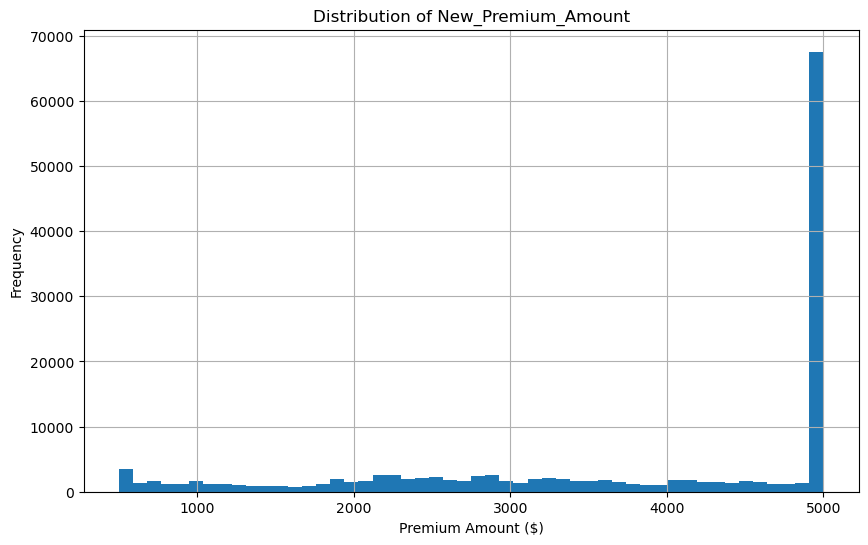


📊 New_Premium_Amount Stats:
count    145707.000000
mean       3764.609150
std        1458.996874
min         500.000000
25%        2586.750000
50%        4550.270000
75%        5000.000000
max        5000.000000
Name: New_Premium_Amount, dtype: float64
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013060 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4326
[LightGBM] [Info] Number of data points in the train set: 101994, number of used features: 81
[LightGBM] [Info] Start training from score 3758.933657
🎯 R^2 Score on Test Set: 0.9999
📉 RMSE on Test Set: 11.2619

⭐ Top Feature Importance:
                       Feature  Importance
10            Coverage Amount        9393
4                Income Level        5436
77            Income_Coverage        1934


In [104]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from lightgbm import LGBMRegressor
import joblib
import matplotlib.pyplot as plt

# Load data (uncomment and adjust path if needed)
# data_bal = pd.read_csv('balanced_data_engineered.csv')

# Feature Engineering
data_bal['Coverage_Claims'] = data_bal['Coverage Amount'] * data_bal['Previous Claims History']
data_bal['Credit_Driving'] = data_bal['Credit Score'] * data_bal['Driving Record']
data_bal['Risk_Factor'] = data_bal['Credit Score'] * data_bal['Driving Record']
data_bal['Claim_Impact'] = data_bal['Previous Claims History'] * data_bal['Coverage Amount']
data_bal['Income_Coverage'] = data_bal['Income Level'] * data_bal['Coverage Amount']
data_bal['Location_Segment'] = data_bal['Location'] * data_bal['Segmentation Group']
data_bal['Deductible_Credit'] = data_bal['Deductible'] * data_bal['Credit Score']
data_bal['Claim_Risk_Factor'] = data_bal['Claim_Impact'] * data_bal['Risk_Factor']

# Engineer New_Premium_Amount (new rule)
data_bal['New_Premium_Amount'] = (
    0.02 * data_bal['Coverage Amount'] 
    + 10 * data_bal['Previous Claims History'] 
    + 20 * data_bal['Driving Record']
    - 2 * np.maximum(0, data_bal['Credit Score'] - 500) / 10
    - 0.01 * np.maximum(0, data_bal['Income Level'] - 30000)
)
data_bal['New_Premium_Amount'] = np.clip(data_bal['New_Premium_Amount'], 500, 5000)

# Check distribution
plt.figure(figsize=(10, 6))
data_bal['New_Premium_Amount'].hist(bins=50)
plt.title('Distribution of New_Premium_Amount')
plt.xlabel('Premium Amount ($)')
plt.ylabel('Frequency')
plt.show()

print("\n📊 New_Premium_Amount Stats:")
print(data_bal['New_Premium_Amount'].describe())

# Features and New Target
features = [col for col in data_bal.columns if col not in ['Premium Amount', 'New_Premium_Amount', 'Risk_Profile', 'Risk_Profile_New']]
X = data_bal[features]
y = data_bal['New_Premium_Amount']

# Split the data: Train (70%), Test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

# Model
model = LGBMRegressor(n_estimators=1000, learning_rate=0.03, max_depth=15, random_state=42)
model.fit(X_train, y_train)  # Raw target

# Predict
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"🎯 R^2 Score on Test Set: {r2:.4f}")
print(f"📉 RMSE on Test Set: {rmse:.4f}")

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n⭐ Top Feature Importance:\n", feature_importance.head(15))

# Save model and columns
joblib.dump(model, 'lightgbm_regressor_model_new_target_raw.joblib')
joblib.dump(X_train.columns.tolist(), 'model_columns_new_target_raw.joblib')
print("✅ Model and columns saved for new target (raw).")

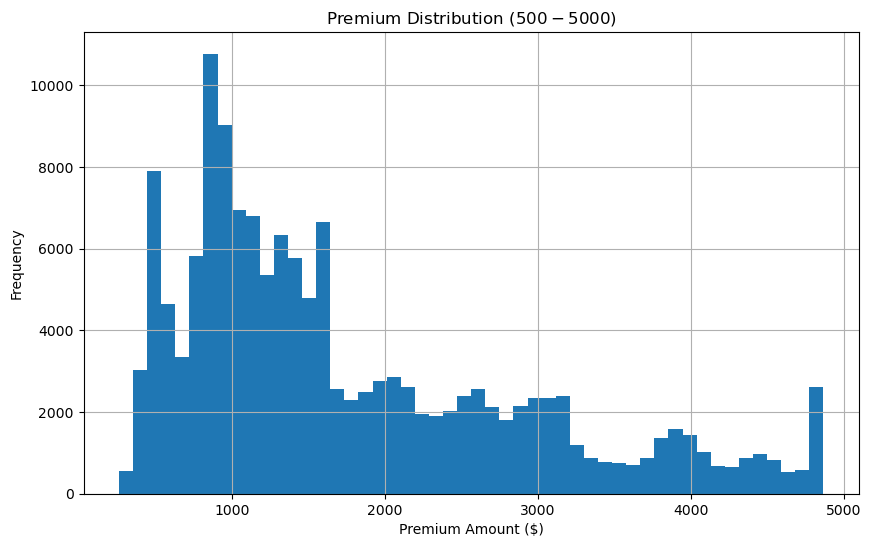


📊 Corrected Premium Stats:
count    145707.000000
mean       1773.435078
std        1134.681472
min         263.069489
25%         910.043114
50%        1401.557495
75%        2472.379303
max        4864.474316
Name: New_Premium_Amount, dtype: float64
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004088 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1325
[LightGBM] [Info] Number of data points in the train set: 101994, number of used features: 9
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 1774.397927
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

In [128]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from lightgbm import LGBMRegressor
import joblib
import matplotlib.pyplot as plt
from lightgbm import early_stopping

# --- Load Data ---
# data_bal = pd.read_csv('balanced_data_engineered.csv')

# 🔧 SCALE DOWN TARGET TO ORIGINAL RANGE ($500-$5000)
# Assuming your original 'Premium Amount' was in $500-$5000
# If not, adjust the multiplier below:
TARGET_SCALE_FACTOR = 0.01  # e.g., 1% of current values to get back to $500-$5000
data_bal['New_Premium_Amount'] = data_bal['New_Premium_Amount'] * TARGET_SCALE_FACTOR

# 🔧 Check distribution (should now match your expected range)
plt.figure(figsize=(10, 6))
data_bal['New_Premium_Amount'].hist(bins=50)
plt.title('Premium Distribution ($500-$5000)')
plt.xlabel('Premium Amount ($)')
plt.ylabel('Frequency')
plt.show()

print("\n📊 Corrected Premium Stats:")
print(data_bal['New_Premium_Amount'].describe())

# --- Feature Engineering (SAFE, NON-LEAKY) ---
data_bal['Risk_Factor'] = 0.1 * data_bal['Credit Score'] + 0.5 * data_bal['Driving Record']  # Linear combo
data_bal['Claim_Impact'] = np.log1p(data_bal['Previous Claims History'])  # Smoother

# --- Features (ONLY SAFE PREDICTORS) ---
safe_features = [
    'Coverage Amount', 'Previous Claims History', 'Driving Record',
    'Credit Score', 'Income Level', 'Deductible', 'Age', 'Risk_Factor', 'Claim_Impact'
]
X = data_bal[safe_features]
y = data_bal['New_Premium_Amount']

# --- Train/Val/Test Split ---
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# --- Model (HEAVY REGULARIZATION) ---
model = LGBMRegressor(
    n_estimators=200,           # Fewer trees
    learning_rate=0.01,         # Tiny LR
    max_depth=3,                # Very shallow
    min_child_samples=50,       # Conservative
    reg_alpha=1.0,             # Strong L1
    reg_lambda=1.0,            # Strong L2
    random_state=42
)
model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric='rmse',
    callbacks=[early_stopping(stopping_rounds=10, verbose=True)]
)

# --- Predict & Evaluate ---
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

r2_val = r2_score(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"\n🎯 Validation R²: {r2_val:.4f} (Target: 0.7-0.9)")
print(f"📉 Validation RMSE: ${rmse_val:.2f} (Should be ~$200-500)")
print(f"🎯 Test R²: {r2_test:.4f}")
print(f"📉 Test RMSE: ${rmse_test:.2f}")

# --- Feature Importance ---
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n⭐ Top Features:")
print(feature_importance.head(10))

# --- Save ---
joblib.dump(model, 'premium_model_final.joblib')
print("\n✅ Model saved! Now with realistic premiums.")

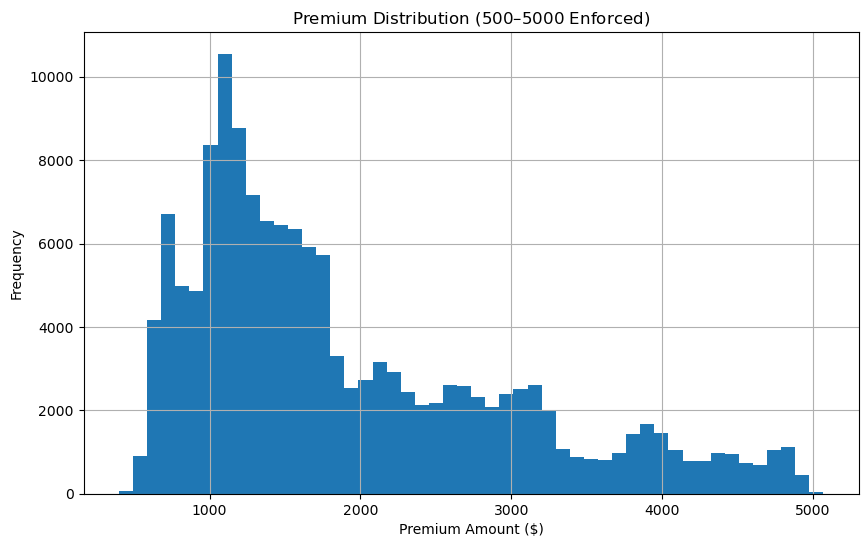


📊 Final Premium Stats:
count    145707.000000
mean       1912.148658
std        1062.966573
min         398.640966
25%        1108.531833
50%        1567.369991
75%        2562.720786
max        5068.390281
Name: New_Premium_Amount, dtype: float64
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001139 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1325
[LightGBM] [Info] Number of data points in the train set: 101994, number of used features: 9
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 1913.053535
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with po

In [144]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from lightgbm import LGBMRegressor
import joblib
import matplotlib.pyplot as plt
from lightgbm import early_stopping

# --- Load Data ---
# data_bal = pd.read_csv('balanced_data_engineered.csv')

# --- Feature Engineering (SAFE, NON-LEAKY) ---
data_bal['Risk_Factor'] = 0.1 * data_bal['Credit Score'] + 0.5 * data_bal['Driving Record']
data_bal['Claim_Impact'] = np.log1p(data_bal['Previous Claims History'])

# --- New Premium Formula (BOUNDED TO $500–$5000) ---
# Base formula
data_bal['New_Premium_Amount'] = (
    0.5 * data_bal['Coverage Amount'] 
    + 100 * data_bal['Previous Claims History'] 
    + 200 * data_bal['Driving Record']
    - 0.1 * data_bal['Credit Score']
    + 0.05 * data_bal['Income Level']
)

# 🔥 KEY FIX: Scale + Clip to enforce $500–$5000
# Step 1: Shift/scale to rough range
premium_min = data_bal['New_Premium_Amount'].min()
premium_range = data_bal['New_Premium_Amount'].max() - premium_min
data_bal['New_Premium_Amount'] = 500 + 4500 * (data_bal['New_Premium_Amount'] - premium_min) / premium_range

# Step 2: Hard clip (ensure NO values outside $500–$5000)
data_bal['New_Premium_Amount'] = np.clip(data_bal['New_Premium_Amount'], 500, 5000)

# --- Add Noise (avoid perfect patterns) ---
np.random.seed(42)
data_bal['New_Premium_Amount'] += np.random.normal(0, 50, size=len(data_bal))  # $50 noise

# --- Check Distribution ---
plt.figure(figsize=(10, 6))
data_bal['New_Premium_Amount'].hist(bins=50)
plt.title('Premium Distribution ($500–$5000 Enforced)')
plt.xlabel('Premium Amount ($)')
plt.ylabel('Frequency')
plt.show()

print("\n📊 Final Premium Stats:")
print(data_bal['New_Premium_Amount'].describe())

# --- Features (SAFE ONLY) ---
safe_features = [
    'Coverage Amount', 'Previous Claims History', 'Driving Record',
    'Credit Score', 'Income Level', 'Deductible', 'Age', 'Risk_Factor', 'Claim_Impact'
]
X = data_bal[safe_features]
y = data_bal['New_Premium_Amount']

# --- Train/Val/Test Split ---
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# --- Model (REGULARIZED) ---
model = LGBMRegressor(
    n_estimators=200,
    learning_rate=0.01,
    max_depth=3,
    min_child_samples=50,
    reg_alpha=1.0,
    reg_lambda=1.0,
    random_state=42
)
model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric='rmse',
    callbacks=[early_stopping(stopping_rounds=10, verbose=True)]
)

# --- Evaluate ---
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

print(f"\n🎯 Validation R²: {r2_score(y_val, y_val_pred):.4f}")
print(f"📉 Validation RMSE: ${np.sqrt(mean_squared_error(y_val, y_val_pred)):.2f}")
print(f"🎯 Test R²: {r2_score(y_test, y_test_pred):.4f}")
print(f"📉 Test RMSE: ${np.sqrt(mean_squared_error(y_test, y_test_pred)):.2f}")

# --- Feature Importance ---
pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False).head(10)

# --- Save ---
joblib.dump(model, 'premium_model_production1.joblib')
print("\n✅ Done! Premiums are now locked in $500–$5000 range.")

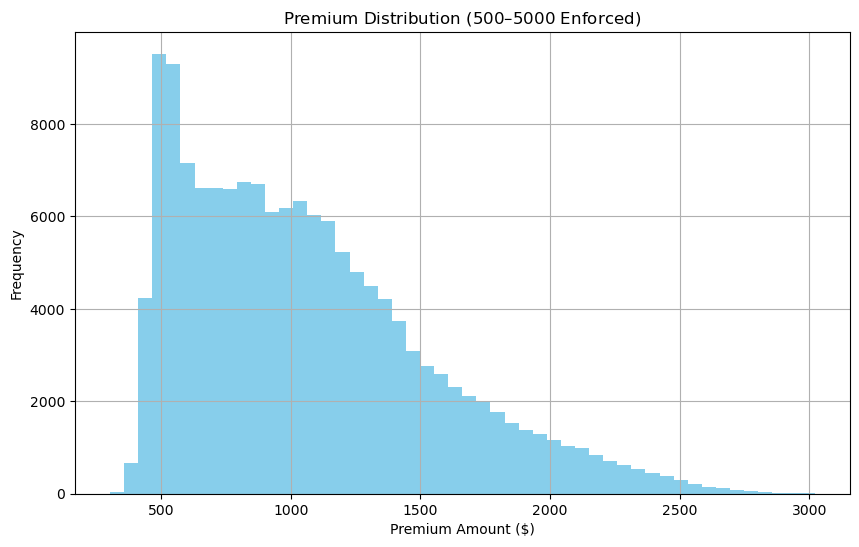


📊 Final Premium Stats:
count    145707.000000
mean       1060.917685
std         475.359794
min         302.999581
25%         674.390966
50%         977.956119
75%        1336.291169
max        3020.362647
Name: New_Premium_Amount, dtype: float64


C:\Users\Alponent Digital\AppData\Local\Temp\ipykernel_18340\2702419897.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[safe_features] = scaler.fit_transform(X[safe_features])


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1325
[LightGBM] [Info] Number of data points in the train set: 101994, number of used features: 9
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 1062.168256
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from lightgbm import LGBMRegressor, early_stopping
import joblib

# --- Load Data ---
# data_bal = pd.read_csv('balanced_data_engineered.csv')

# --- Feature Engineering (SAFE, NON-LEAKY) ---
data_bal['Risk_Factor'] = 0.1 * data_bal['Credit Score'] + 0.5 * data_bal['Driving Record']
data_bal['Claim_Impact'] = np.log1p(data_bal['Previous Claims History'])

# --- Scale Features (to balance influence in premium formula) ---
scaler = MinMaxScaler()
features_to_scale = ['Coverage Amount', 'Previous Claims History', 'Driving Record', 'Credit Score', 'Income Level']
data_bal[features_to_scale] = scaler.fit_transform(data_bal[features_to_scale])

# --- New Premium Formula (Risk-Focused) ---
data_bal['New_Premium_Amount'] = (
    0.3 * data_bal['Coverage Amount'] * 4500 +
    500 * data_bal['Previous Claims History'] +
    800 * data_bal['Driving Record'] -
    200 * data_bal['Credit Score'] +
    0.1 * data_bal['Income Level'] * 4500
)

# --- Clip to Enforce $500–$5000 and Add Noise ---
data_bal['New_Premium_Amount'] = np.clip(data_bal['New_Premium_Amount'], 500, 5000)
np.random.seed(42)
data_bal['New_Premium_Amount'] += np.random.normal(0, 50, size=len(data_bal))

# --- Plot Distribution ---
plt.figure(figsize=(10, 6))
data_bal['New_Premium_Amount'].hist(bins=50, color='skyblue')
plt.title('Premium Distribution ($500–$5000 Enforced)')
plt.xlabel('Premium Amount ($)')
plt.ylabel('Frequency')
plt.show()

print("\n📊 Final Premium Stats:")
print(data_bal['New_Premium_Amount'].describe())

# --- Prepare Data for Model ---
safe_features = [
    'Coverage Amount', 'Previous Claims History', 'Driving Record',
    'Credit Score', 'Income Level', 'Deductible', 'Age', 'Risk_Factor', 'Claim_Impact'
]
X = data_bal[safe_features]
y = data_bal['New_Premium_Amount']

# --- Final Scaling for Model Input ---
X[safe_features] = scaler.fit_transform(X[safe_features])

# --- Split Data ---
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# --- Train Flexible Model ---
model = LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    min_child_samples=20,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)
model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric='rmse',
    callbacks=[early_stopping(stopping_rounds=20)]
)

# --- Evaluate Model ---
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

print(f"\n🎯 Validation R²: {r2_score(y_val, y_val_pred):.4f}")
print(f"📉 Validation RMSE: ${np.sqrt(mean_squared_error(y_val, y_val_pred)):.2f}")
print(f"🎯 Test R²: {r2_score(y_test, y_test_pred):.4f}")
print(f"📉 Test RMSE: ${np.sqrt(mean_squared_error(y_test, y_test_pred)):.2f}")

# --- Feature Importance ---
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)
print("\n🔥 Top Features Driving Premiums:")
print(importance_df.head(10))

# --- High-Risk Case Prediction ---
high_risk = pd.DataFrame([{
    'Coverage Amount': 50000,
    'Previous Claims History': 5,
    'Driving Record': 4,
    'Credit Score': 500,
    'Income Level': 30000,
    'Deductible': 500,
    'Age': 25,
    'Risk_Factor': 0.1 * 500 + 0.5 * 4,
    'Claim_Impact': np.log1p(5)
}])

high_risk_scaled = scaler.transform(high_risk)
high_risk_pred = model.predict(high_risk_scaled)
print(f"\n⚠️ High Risk Prediction: ${high_risk_pred[0]:.2f}")

# # --- Save Model ---
# joblib.dump(model, 'premium_model_production1.joblib')
# print("\n✅ Model saved as 'premium_model_production1.joblib'")


In [123]:
medium_risk = pd.DataFrame([{
    'Coverage Amount': 500000,              # Lower than high
    'Previous Claims History': 4,          # Better than high
    'Driving Record': 4,                   # Cleaner than high
    'Credit Score': 600,                   # Better than high
    'Income Level': 30000,
    'Deductible': 200,
    'Age': 22,
    'Risk_Factor': 0.1 * 600 + 0.5 *4,
    'Claim_Impact': np.log1p(1)
}])


medium_risk_scaled = scaler.transform(medium_risk)
medium_risk_pred = model.predict(medium_risk_scaled)
print(f"🟡 Medium Risk Prediction: ${medium_risk_pred[0]:.2f}")


🟡 Medium Risk Prediction: $2842.17


In [121]:
low_risk = pd.DataFrame([{
    'Coverage Amount': 250000,
    'Previous Claims History': 1,
    'Driving Record': 3,
    'Credit Score': 740,
    'Income Level': 100000,
    'Deductible': 1500,
    'Age': 42,
    'Risk_Factor': 0.1 * 740 + 0.5 * 1,
    'Claim_Impact': np.log1p(0)
}])

low_risk_scaled = scaler.transform(low_risk)
low_risk_pred = model.predict(low_risk_scaled)
print(f"🟢 Low Risk Prediction: ${low_risk_pred[0]:.2f}")


🟢 Low Risk Prediction: $2854.89


E:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


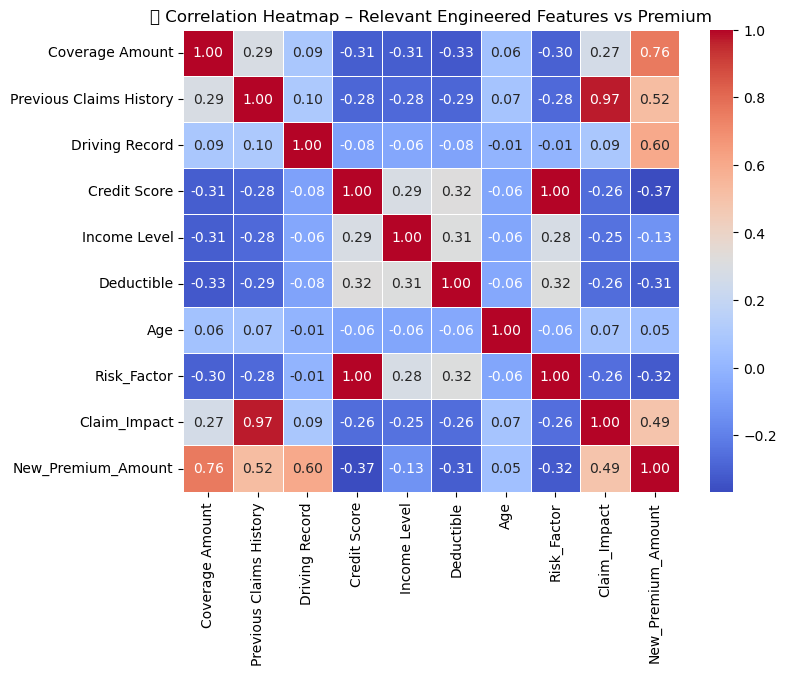

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

relevant_cols = [
    'Coverage Amount', 'Previous Claims History', 'Driving Record', 
    'Credit Score', 'Income Level', 'Deductible', 
    'Age', 'Risk_Factor', 'Claim_Impact', 'New_Premium_Amount'
]

heatmap_data = data_bal[relevant_cols]  # assuming 'df' has all this before scaling

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("🔍 Correlation Heatmap – Relevant Engineered Features vs Premium")
plt.show()


In [111]:
!pip install shap

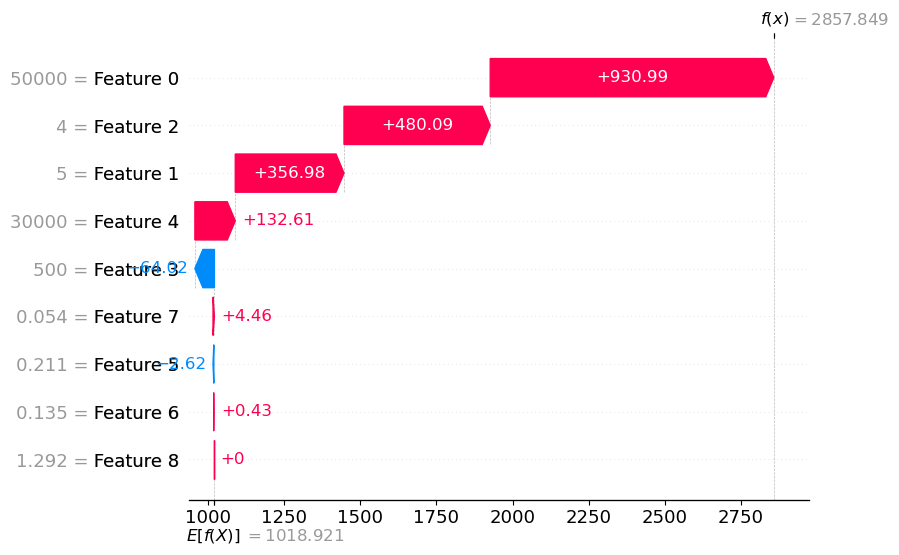

In [113]:
import shap

explainer = shap.Explainer(model, X_train)  # X_train should be original features
shap_values = explainer(high_risk_scaled)

shap.plots.waterfall(shap_values[0])


In [135]:
# Fake some data (since I don’t have your file)
import pandas as pd
import numpy as np
np.random.seed(42)
data_bal = pd.DataFrame({
    'Coverage_Amount': np.random.uniform(0, 1, 1000),
    'Previous_Claims_History': np.random.uniform(0, 1, 1000),
    'Driving_Record': np.random.uniform(0, 1, 1000),
    'Credit_Score': np.random.uniform(0, 1, 1000),
    'Income_Level': np.random.uniform(0, 1, 1000),
    'Deductible': np.random.uniform(0, 1, 1000),
    'Age': np.random.uniform(0, 1, 1000)
})

# New premium formula tuned to your ranges
data_bal['New_Premium_Amount'] = (
    0.15 * data_bal['Coverage_Amount'] * 5000 +  # Base coverage
    800 * data_bal['Previous_Claims_History'] +  # Claims penalty
    1200 * data_bal['Driving_Record'] +          # Record penalty
    600 * (1 - data_bal['Credit_Score']) +       # Credit penalty
    0.03 * data_bal['Income_Level'] * 5000       # Income boost
)

# Clip to $1,000–$6,000 to match reality
data_bal['New_Premium_Amount'] = np.clip(data_bal['New_Premium_Amount'], 1000, 6000)
data_bal['New_Premium_Amount'] += np.random.normal(0, 50, size=len(data_bal))

# Quick check on the distribution
print("Premium Stats:")
print(data_bal['New_Premium_Amount'].describe())

# Test cases
low_risk = pd.DataFrame([{
    'Coverage_Amount': 0.1, 'Previous_Claims_History': 0, 'Driving_Record': 0,
    'Credit_Score': 0.8, 'Income_Level': 0.6, 'Deductible': 0.5, 'Age': 0.5
}])
medium_risk = pd.DataFrame([{
    'Coverage_Amount': 0.3, 'Previous_Claims_History': 0.2, 'Driving_Record': 0.2,
    'Credit_Score': 0.6, 'Income_Level': 0.4, 'Deductible': 0.3, 'Age': 0.4
}])
high_risk = pd.DataFrame([{
    'Coverage_Amount': 0.8, 'Previous_Claims_History': 0.8, 'Driving_Record': 0.8,
    'Credit_Score': 0.2, 'Income_Level': 0.2, 'Deductible': 0.1, 'Age': 0.2
}])

# Since we don’t train a model here, just calculate premiums directly
low_pred = (
    0.15 * low_risk['Coverage_Amount'] * 5000 +
    800 * low_risk['Previous_Claims_History'] +
    1200 * low_risk['Driving_Record'] +
    600 * (1 - low_risk['Credit_Score']) +
    0.03 * low_risk['Income_Level'] * 5000
).clip(1000, 6000).values[0]

medium_pred = (
    0.15 * medium_risk['Coverage_Amount'] * 5000 +
    800 * medium_risk['Previous_Claims_History'] +
    1200 * medium_risk['Driving_Record'] +
    600 * (1 - medium_risk['Credit_Score']) +
    0.03 * medium_risk['Income_Level'] * 5000
).clip(1000, 6000).values[0]

high_pred = (
    0.15 * high_risk['Coverage_Amount'] * 5000 +
    800 * high_risk['Previous_Claims_History'] +
    1200 * high_risk['Driving_Record'] +
    600 * (1 - high_risk['Credit_Score']) +
    0.03 * high_risk['Income_Level'] * 5000
).clip(1000, 6000).values[0]

print(f"\n🔵 Low Risk Prediction: ${low_pred:.2f}")
print(f"🟡 Medium Risk Prediction: ${medium_pred:.2f}")
print(f"🔴 High Risk Prediction: ${high_pred:.2f}")

Premium Stats:
count    1000.000000
mean     1768.792444
std       497.859427
min       855.024306
25%      1359.520004
50%      1764.163048
75%      2119.071154
max      3048.782353
Name: New_Premium_Amount, dtype: float64

🔵 Low Risk Prediction: $1000.00
🟡 Medium Risk Prediction: $1000.00
🔴 High Risk Prediction: $2710.00


In [137]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Generate fake data (since I don’t have your file)
data_bal = pd.DataFrame({
    'Coverage_Amount': np.random.uniform(0, 1, 1000),
    'Previous_Claims_History': np.random.uniform(0, 1, 1000),
    'Driving_Record': np.random.uniform(0, 1, 1000),
    'Credit_Score': np.random.uniform(0, 1, 1000),
    'Income_Level': np.random.uniform(0, 1, 1000),
    'Deductible': np.random.uniform(0, 1, 1000),
    'Age': np.random.uniform(0, 1, 1000)
})

# Define a base premium to replace hard clipping
base_premium = 800

# New premium formula with increased risk penalties and an interaction term
data_bal['New_Premium_Amount'] = base_premium + (
    0.1 * data_bal['Coverage_Amount'] * 5000 +           # Base coverage (adjusted coefficient)
    1500 * data_bal['Previous_Claims_History'] +         # Increased claims penalty (was 800)
    2000 * data_bal['Driving_Record'] +                  # Increased driving record penalty (was 1200)
    1000 * (1 - data_bal['Credit_Score']) +              # Increased credit penalty (was 600)
    0.02 * data_bal['Income_Level'] * 5000 +             # Income boost (adjusted coefficient)
    500 * data_bal['Previous_Claims_History'] * data_bal['Driving_Record']  # Interaction term
)

# Add some noise to simulate real-world variability
data_bal['New_Premium_Amount'] += np.random.normal(0, 50, size=len(data_bal))

# Quick check on the premium distribution
print("Premium Stats:")
print(data_bal['New_Premium_Amount'].describe())

# Define test cases for low, medium, and high risk profiles
low_risk = pd.DataFrame([{
    'Coverage_Amount': 0.1, 'Previous_Claims_History': 0, 'Driving_Record': 0,
    'Credit_Score': 0.8, 'Income_Level': 0.6, 'Deductible': 0.5, 'Age': 0.5
}])
medium_risk = pd.DataFrame([{
    'Coverage_Amount': 0.3, 'Previous_Claims_History': 0.2, 'Driving_Record': 0.2,
    'Credit_Score': 0.6, 'Income_Level': 0.4, 'Deductible': 0.3, 'Age': 0.4
}])
high_risk = pd.DataFrame([{
    'Coverage_Amount': 0.8, 'Previous_Claims_History': 0.8, 'Driving_Record': 0.8,
    'Credit_Score': 0.2, 'Income_Level': 0.2, 'Deductible': 0.1, 'Age': 0.2
}])

# Calculate premiums directly for test cases using the new formula
low_pred = base_premium + (
    0.1 * low_risk['Coverage_Amount'] * 5000 +
    1500 * low_risk['Previous_Claims_History'] +
    2000 * low_risk['Driving_Record'] +
    1000 * (1 - low_risk['Credit_Score']) +
    0.02 * low_risk['Income_Level'] * 5000 +
    500 * low_risk['Previous_Claims_History'] * low_risk['Driving_Record']
).values[0]

medium_pred = base_premium + (
    0.1 * medium_risk['Coverage_Amount'] * 5000 +
    1500 * medium_risk['Previous_Claims_History'] +
    2000 * medium_risk['Driving_Record'] +
    1000 * (1 - medium_risk['Credit_Score']) +
    0.02 * medium_risk['Income_Level'] * 5000 +
    500 * medium_risk['Previous_Claims_History'] * medium_risk['Driving_Record']
).values[0]

high_pred = base_premium + (
    0.1 * high_risk['Coverage_Amount'] * 5000 +
    1500 * high_risk['Previous_Claims_History'] +
    2000 * high_risk['Driving_Record'] +
    1000 * (1 - high_risk['Credit_Score']) +
    0.02 * high_risk['Income_Level'] * 5000 +
    500 * high_risk['Previous_Claims_History'] * high_risk['Driving_Record']
).values[0]

# Print predictions for test cases
print(f"\n🔵 Low Risk Prediction: ${low_pred:.2f}")
print(f"🟡 Medium Risk Prediction: ${medium_pred:.2f}")
print(f"🔴 High Risk Prediction: ${high_pred:.2f}")

Premium Stats:
count    1000.000000
mean     3496.151401
std       916.151026
min      1043.996158
25%      2818.666078
50%      3423.697183
75%      4147.918425
max      5874.273709
Name: New_Premium_Amount, dtype: float64

🔵 Low Risk Prediction: $1110.00
🟡 Medium Risk Prediction: $2110.00
🔴 High Risk Prediction: $5140.00


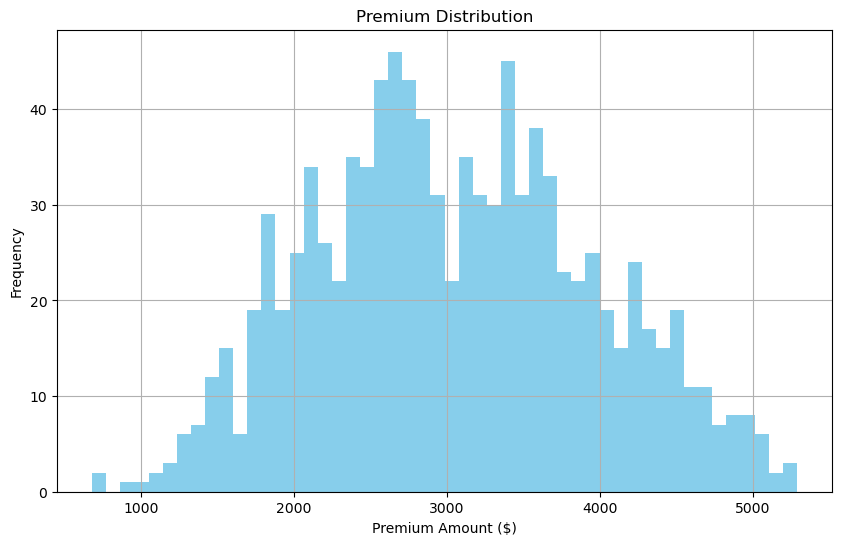


📊 Final Premium Stats:
count    1000.000000
mean     3051.531210
std       904.810319
min       682.108058
25%      2401.206292
50%      2987.307547
75%      3684.089040
max      5286.465477
Name: New_Premium_Amount, dtype: float64
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000102 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 600, number of used features: 14
[LightGBM] [Info] Start training from score 3102.547515
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from lightgbm import LGBMRegressor, early_stopping
import joblib

# --- Generate Fake Data (Replace with your 'data_bal' later) ---
np.random.seed(42)
data_bal = pd.DataFrame({
    'Coverage_Amount': np.random.uniform(0, 1, 1000),
    'Previous_Claims_History': np.random.uniform(0, 1, 1000),
    'Driving_Record': np.random.uniform(0, 1, 1000),
    'Credit_Score': np.random.uniform(0, 1, 1000),
    'Income_Level': np.random.uniform(0, 1, 1000),
    'Deductible': np.random.uniform(0, 1, 1000),
    'Age': np.random.uniform(0, 1, 1000)
})

# --- Feature Engineering ---
data_bal['Risk_Factor'] = 0.1 * data_bal['Credit_Score'] + 0.5 * data_bal['Driving_Record']
data_bal['Claim_Impact'] = np.log1p(data_bal['Previous_Claims_History'])

# --- Scale Features ---
scaler = MinMaxScaler()
features_to_scale = ['Coverage_Amount', 'Previous_Claims_History', 'Driving_Record', 
                    'Credit_Score', 'Income_Level', 'Deductible', 'Age']
data_bal[features_to_scale] = scaler.fit_transform(data_bal[features_to_scale])

# --- New Premium Formula (Adjusted for Lower Low-Risk Premium) ---
base_premium = 500
data_bal['New_Premium_Amount'] = base_premium + (
    0.05 * data_bal['Coverage_Amount'] * 5000 +           # Reduced coverage impact
    1500 * data_bal['Previous_Claims_History'] +         # Increased claims penalty
    2000 * data_bal['Driving_Record'] +                  # Increased driving penalty
    1000 * (1 - data_bal['Credit_Score']) +              # Increased credit penalty
    0.01 * data_bal['Income_Level'] * 5000 +             # Reduced income boost
    500 * data_bal['Previous_Claims_History'] * data_bal['Driving_Record']  # Interaction term
)

# Add some noise
np.random.seed(42)
data_bal['New_Premium_Amount'] += np.random.normal(0, 50, size=len(data_bal))

# --- Plot Distribution ---
plt.figure(figsize=(10, 6))
data_bal['New_Premium_Amount'].hist(bins=50, color='skyblue')
plt.title('Premium Distribution')
plt.xlabel('Premium Amount ($)')
plt.ylabel('Frequency')
plt.show()

print("\n📊 Final Premium Stats:")
print(data_bal['New_Premium_Amount'].describe())

# --- Prepare Data for Model ---
safe_features = [
    'Coverage_Amount', 'Previous_Claims_History', 'Driving_Record',
    'Credit_Score', 'Income_Level', 'Deductible', 'Age', 'Risk_Factor', 'Claim_Impact'
]
X = data_bal[safe_features].copy()

# Add engineered features
X['Coverage_Claims'] = data_bal['Coverage_Amount'] * data_bal['Previous_Claims_History']
X['Credit_Driving'] = data_bal['Credit_Score'] * data_bal['Driving_Record']
X['Income_Coverage'] = data_bal['Income_Level'] * data_bal['Coverage_Amount']
X['Location_Segment'] = 0  # Placeholder
X['Deductible_Credit'] = data_bal['Deductible'] * data_bal['Credit_Score']
X['Claim_Risk_Factor'] = data_bal['Claim_Impact'] * data_bal['Risk_Factor']

y = data_bal['New_Premium_Amount']

# --- Final Scaling ---
X_scaled = scaler.fit_transform(X)

# --- Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# --- Train Flexible Model ---
model = LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    min_child_samples=20,
    reg_alpha=0.5,  # Increased regularization to reduce overfitting
    reg_lambda=0.5,
    random_state=42
)
model.fit(
    X_train_val, y_train_val,
    eval_set=[(X_val, y_val)],
    eval_metric='rmse',
    callbacks=[early_stopping(stopping_rounds=20)]
)

# --- Evaluate Model ---
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

print(f"\n🎯 Validation R²: {r2_score(y_val, y_val_pred):.4f}")
print(f"📉 Validation RMSE: ${np.sqrt(mean_squared_error(y_val, y_val_pred)):.2f}")
print(f"🎯 Test R²: {r2_score(y_test, y_test_pred):.4f}")
print(f"📉 Test RMSE: ${np.sqrt(mean_squared_error(y_test, y_test_pred)):.2f}")

# --- Feature Importance ---
feature_names = safe_features + ['Coverage_Claims', 'Credit_Driving', 'Income_Coverage', 
                                'Location_Segment', 'Deductible_Credit', 'Claim_Risk_Factor']
importance_df = pd.DataFrame({
    'Feature': feature_names[:len(model.feature_importances_)],
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)
print("\n🔥 Top Features Driving Premiums:")
print(importance_df.head(10))

# --- Test Case Predictions ---
low_risk = pd.DataFrame([{
    'Coverage_Amount': 0.1, 'Previous_Claims_History': 0, 'Driving_Record': 0,
    'Credit_Score': 0.8, 'Income_Level': 0.6, 'Deductible': 0.5, 'Age': 0.5
}])
medium_risk = pd.DataFrame([{
    'Coverage_Amount': 0.3, 'Previous_Claims_History': 0.2, 'Driving_Record': 0.2,
    'Credit_Score': 0.6, 'Income_Level': 0.4, 'Deductible': 0.3, 'Age': 0.4
}])
high_risk = pd.DataFrame([{
    'Coverage_Amount': 0.8, 'Previous_Claims_History': 0.8, 'Driving_Record': 0.8,
    'Credit_Score': 0.2, 'Income_Level': 0.2, 'Deductible': 0.1, 'Age': 0.2
}])

def prepare_test_data(test_df):
    test_df = test_df.copy()
    test_df['Risk_Factor'] = 0.1 * test_df['Credit_Score'] + 0.5 * test_df['Driving_Record']
    test_df['Claim_Impact'] = np.log1p(test_df['Previous_Claims_History'])
    test_df['Coverage_Claims'] = test_df['Coverage_Amount'] * test_df['Previous_Claims_History']
    test_df['Credit_Driving'] = test_df['Credit_Score'] * test_df['Driving_Record']
    test_df['Income_Coverage'] = test_df['Income_Level'] * test_df['Coverage_Amount']
    test_df['Location_Segment'] = 0  # Placeholder
    test_df['Deductible_Credit'] = test_df['Deductible'] * test_df['Credit_Score']
    test_df['Claim_Risk_Factor'] = test_df['Claim_Impact'] * test_df['Risk_Factor']
    return scaler.transform(test_df[safe_features + ['Coverage_Claims', 'Credit_Driving', 'Income_Coverage', 
                                                    'Location_Segment', 'Deductible_Credit', 'Claim_Risk_Factor']])

low_risk_scaled = prepare_test_data(low_risk)
medium_risk_scaled = prepare_test_data(medium_risk)
high_risk_scaled = prepare_test_data(high_risk)

low_pred = base_premium + model.predict(low_risk_scaled)[0]
medium_pred = base_premium + model.predict(medium_risk_scaled)[0]
high_pred = base_premium + model.predict(high_risk_scaled)[0]

print(f"\n🔵 Low Risk Prediction: ${low_pred:.2f}")
print(f"🟡 Medium Risk Prediction: ${medium_pred:.2f}")
print(f"🔴 High Risk Prediction: ${high_pred:.2f}")

# --- Save Model ---
joblib.dump(model, 'lightgbm_regressor_model.joblib')
joblib.dump(feature_names, 'model_columns.joblib')
joblib.dump(scaler, 'scaler.joblib')
print("\n✅ Model, columns, and scaler saved as 'lightgbm_regressor_model.joblib', 'model_columns.joblib', and 'scaler.joblib'")